# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-15 00:48:18.523455: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-15T00:48:21.772845
2025-04-15 00:48:21.772845


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 7
MODEL_TO_USE = 2

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 26
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-15 00:48:15"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

IBOVESPA - Close  IBOVESPA - High  IBOVESPA - Low  IBOVESPA - Open  \
0          0.000000         0.000000        0.000000         0.000000   
1          0.000150         0.000150        0.000049         0.000034   
2          0.000299         0.000406        0.000200         0.000183   
3          0.000468         0.000484        0.000350         0.000333   
4          0.000703         0.000704        0.000519         0.000502   

   Dólar - Close  Dólar - High  Dólar - Low  Dólar - Open  Dow Jones - Close  \
0            0.0           0.0          0.0           0.0           0.003941   
1            0.0           0.0          0.0           0.0           0.004600   
2            0.0           0.0          0.0           0.0           0.004961   
3            0.0           0.0          0.0           0.0           0.005083   
4            0.0           0.0          0.0           0.0           0.005490   

   Dow Jones - High  ...  IBOVESPA - Spread %  Kospi - Spread %  \
0          0.003148  ...             0.000000               0.0   
1          0.003605  ...             0.036606               0.0   
2          0.003965  ...             0.020442               0.0   
3          0.004311  ...             0.008583               0.0   
4          0.004630  ...             0.015204               0.0   

   Minério de Ferro - Spread %  Nasdaq - Spread %  Nikkei - Spread %  \
0                          0.0           0.000000           0.000000   
1                          0.0           0.029525           0.000000   
2                          0.0           0.119266           0.201590   
3                          0.0           0.056198           0.049836   
4                          0.0           0.182793           0.129181   

   Petróleo Brent - Spread %  Petróleo WTI - Spread %  S&P 500 - Spread %  \
0                        0.0                      0.0            0.000000   
1                        0.0                      0.0            0.084905   
2                        0.0                      0.0            0.065165   
3                        0.0                      0.0            0.095393   
4                        0.0                      0.0            0.162195   

   STOXX 600 - Spread %  Shanghai SE - Spread %  
0                   0.0                     0.0  
1                   0.0                     0.0  
2                   0.0                     0.0  
3                   0.0                     0.0  
4                   0.0                     0.0  

[5 rows x 200 columns]

Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

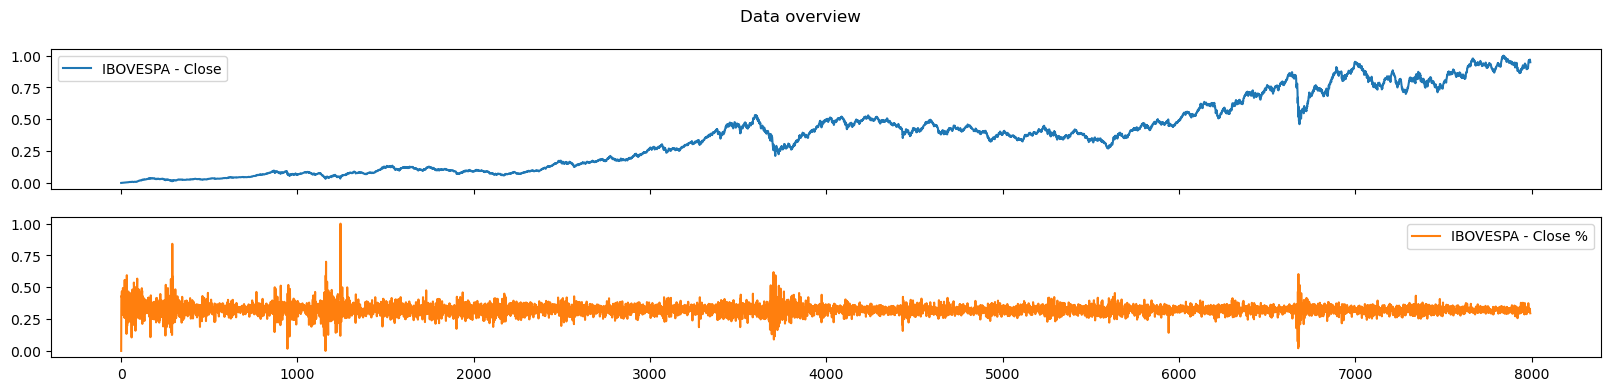

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

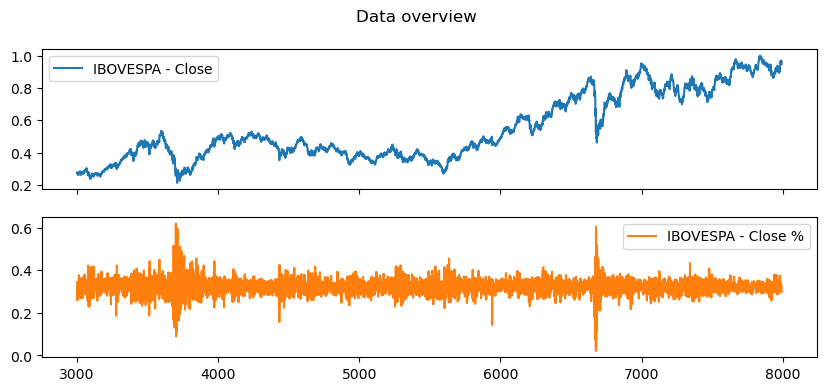

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

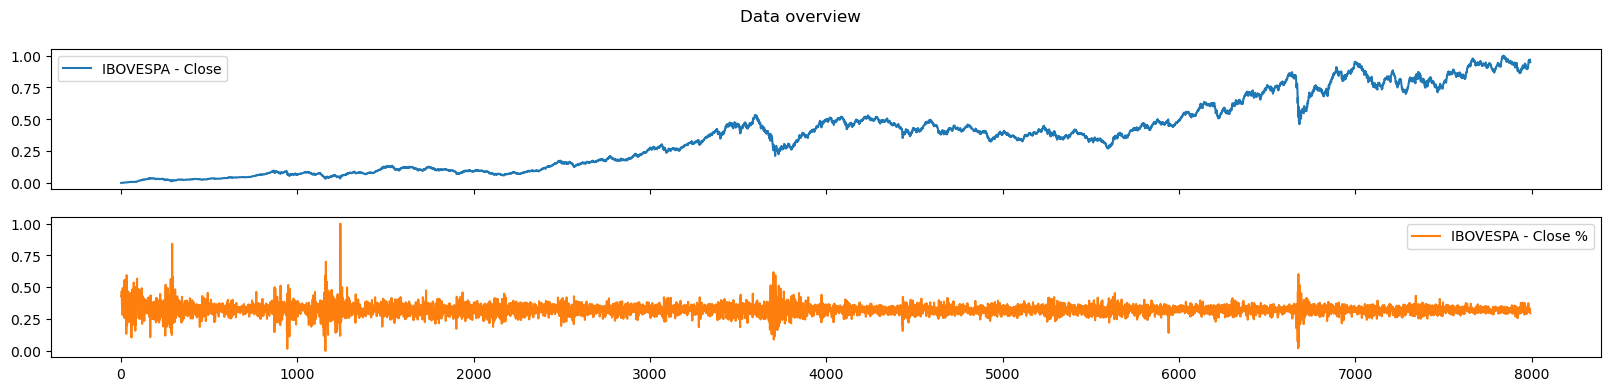

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

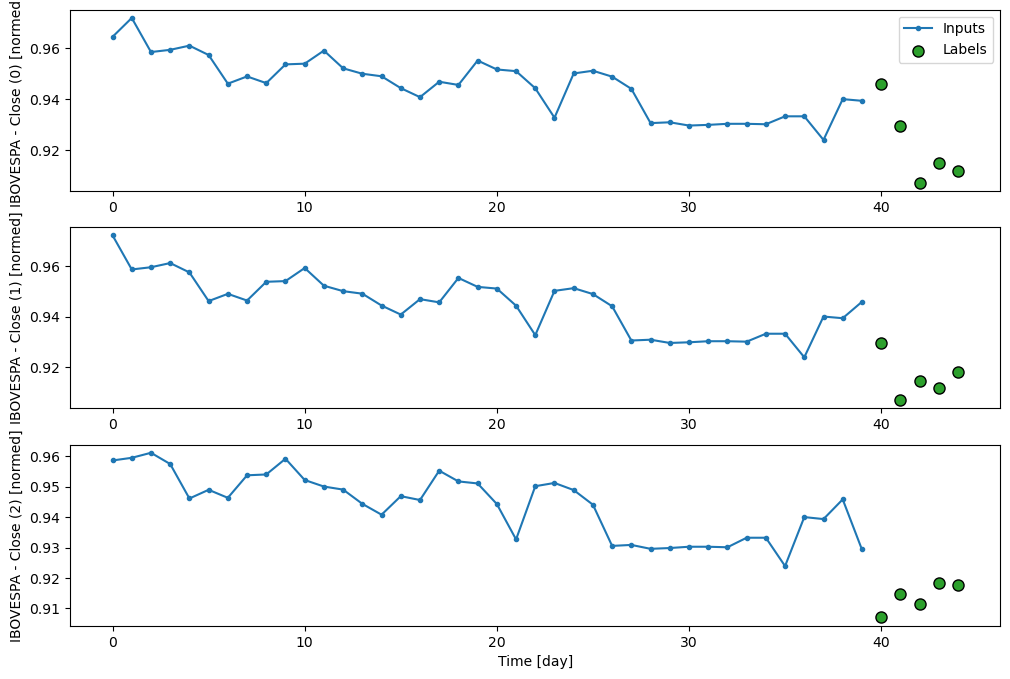

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

2

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15:04 4s/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.8622e-05 - root_mean_squared_error: 0.0077

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 91.8947 - mean_squared_error: 9.7144e-05 - root_mean_squared_error: 0.0096  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 83.8756 - mean_squared_error: 1.3622e-04 - root_mean_squared_error: 0.0113

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 84.0655 - mean_squared_error: 2.8934e-04 - root_mean_squared_error: 0.0155

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 82.8864 - mean_squared_error: 3.5145e-04 - root_mean_squared_error: 0.0173

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 80.2418 - mean_squared_error: 3.7277e-04 - root_mean_squared_error: 0.0181

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 77.0640 - mean_squared_error: 3.7654e-04 - root_mean_squared_error: 0.0184

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 74.0815 - mean_squared_error: 3.7298e-04 - root_mean_squared_error: 0.0184

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 71.1790 - mean_squared_error: 3.6551e-04 - root_mean_squared_error: 0.0183

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 68.3938 - mean_squared_error: 3.5619e-04 - root_mean_squared_error: 0.0182

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 65.7668 - mean_squared_error: 3.4613e-04 - root_mean_squared_error: 0.0179

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 63.3533 - mean_squared_error: 3.3625e-04 - root_mean_squared_error: 0.0177

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 61.2284 - mean_squared_error: 3.2804e-04 - root_mean_squared_error: 0.0175

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 59.3189 - mean_squared_error: 3.2156e-04 - root_mean_squared_error: 0.0174

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 57.6241 - mean_squared_error: 3.1725e-04 - root_mean_squared_error: 0.0173

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 56.1667 - mean_squared_error: 3.1576e-04 - root_mean_squared_error: 0.0173

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 54.8058 - mean_squared_error: 3.1384e-04 - root_mean_squared_error: 0.0172

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 53.5394 - mean_squared_error: 3.1171e-04 - root_mean_squared_error: 0.0172

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 52.4501 - mean_squared_error: 3.1060e-04 - root_mean_squared_error: 0.0172

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 51.4440 - mean_squared_error: 3.0936e-04 - root_mean_squared_error: 0.0172

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 50.5560 - mean_squared_error: 3.1021e-04 - root_mean_squared_error: 0.0172

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 49.7554 - mean_squared_error: 3.1208e-04 - root_mean_squared_error: 0.0173

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 49.0127 - mean_squared_error: 3.1433e-04 - root_mean_squared_error: 0.0174

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 48.3278 - mean_squared_error: 3.1825e-04 - root_mean_squared_error: 0.0175

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 47.6827 - mean_squared_error: 3.2244e-04 - root_mean_squared_error: 0.0176

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 47.0483 - mean_squared_error: 3.2581e-04 - root_mean_squared_error: 0.0177

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 46.4303 - mean_squared_error: 3.2853e-04 - root_mean_squared_error: 0.0178

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 45.8267 - mean_squared_error: 3.3064e-04 - root_mean_squared_error: 0.0179

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 45.2375 - mean_squared_error: 3.3221e-04 - root_mean_squared_error: 0.0179

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 44.6665 - mean_squared_error: 3.3337e-04 - root_mean_squared_error: 0.0180

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 44.1202 - mean_squared_error: 3.3433e-04 - root_mean_squared_error: 0.0180

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 43.6021 - mean_squared_error: 3.3532e-04 - root_mean_squared_error: 0.0180

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 43.1017 - mean_squared_error: 3.3606e-04 - root_mean_squared_error: 0.0181

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 42.6392 - mean_squared_error: 3.3700e-04 - root_mean_squared_error: 0.0181

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 42.2026 - mean_squared_error: 3.3792e-04 - root_mean_squared_error: 0.0181

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 41.7770 - mean_squared_error: 3.3858e-04 - root_mean_squared_error: 0.0182

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 41.3741 - mean_squared_error: 3.3941e-04 - root_mean_squared_error: 0.0182

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 41.0002 - mean_squared_error: 3.4134e-04 - root_mean_squared_error: 0.0182

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 40.6588 - mean_squared_error: 3.4620e-04 - root_mean_squared_error: 0.0184

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 40.3431 - mean_squared_error: 3.5328e-04 - root_mean_squared_error: 0.0185

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 40.0374 - mean_squared_error: 3.6026e-04 - root_mean_squared_error: 0.0187

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 39.7411 - mean_squared_error: 3.6717e-04 - root_mean_squared_error: 0.0189

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 39.4497 - mean_squared_error: 3.7366e-04 - root_mean_squared_error: 0.0190

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 39.1646 - mean_squared_error: 3.7998e-04 - root_mean_squared_error: 0.0192

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 38.8808 - mean_squared_error: 3.8574e-04 - root_mean_squared_error: 0.0193

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 38.5997 - mean_squared_error: 3.9106e-04 - root_mean_squared_error: 0.0194

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 38.3221 - mean_squared_error: 3.9605e-04 - root_mean_squared_error: 0.0195

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 38.0496 - mean_squared_error: 4.0098e-04 - root_mean_squared_error: 0.0197

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 37.7819 - mean_squared_error: 4.0585e-04 - root_mean_squared_error: 0.0198

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 37.5178 - mean_squared_error: 4.1053e-04 - root_mean_squared_error: 0.0199

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 37.2611 - mean_squared_error: 4.1592e-04 - root_mean_squared_error: 0.0200

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 37.0092 - mean_squared_error: 4.2142e-04 - root_mean_squared_error: 0.0201

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 36.7606 - mean_squared_error: 4.2688e-04 - root_mean_squared_error: 0.0203

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 36.5165 - mean_squared_error: 4.3264e-04 - root_mean_squared_error: 0.0204

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 36.2760 - mean_squared_error: 4.3847e-04 - root_mean_squared_error: 0.0205

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 36.0376 - mean_squared_error: 4.4398e-04 - root_mean_squared_error: 0.0206

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 35.8029 - mean_squared_error: 4.4970e-04 - root_mean_squared_error: 0.0208

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 35.5802 - mean_squared_error: 4.5974e-04 - root_mean_squared_error: 0.0210

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 35.3740 - mean_squared_error: 4.7552e-04 - root_mean_squared_error: 0.0212

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 35.1737 - mean_squared_error: 4.9148e-04 - root_mean_squared_error: 0.0215

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 34.9793 - mean_squared_error: 5.0855e-04 - root_mean_squared_error: 0.0218

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 34.7944 - mean_squared_error: 5.3084e-04 - root_mean_squared_error: 0.0221

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 34.6204 - mean_squared_error: 5.6318e-04 - root_mean_squared_error: 0.0226

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 34.4561 - mean_squared_error: 6.0420e-04 - root_mean_squared_error: 0.0231

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 34.2985 - mean_squared_error: 6.4848e-04 - root_mean_squared_error: 0.0237

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 34.1437 - mean_squared_error: 6.9228e-04 - root_mean_squared_error: 0.0242

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 33.9943 - mean_squared_error: 7.3950e-04 - root_mean_squared_error: 0.0248

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 33.8491 - mean_squared_error: 7.8779e-04 - root_mean_squared_error: 0.0254

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 33.7041 - mean_squared_error: 8.3399e-04 - root_mean_squared_error: 0.0259

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 33.5589 - mean_squared_error: 8.7811e-04 - root_mean_squared_error: 0.0264

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 33.4150 - mean_squared_error: 9.2055e-04 - root_mean_squared_error: 0.0269

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 33.2743 - mean_squared_error: 9.6271e-04 - root_mean_squared_error: 0.0274

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 33.1346 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0279    

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 32.9950 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 32.8557 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0288

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 32.7171 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 32.5804 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0297

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 32.5130 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0299

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 32.3783 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0303

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 32.2439 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 32.1103 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0311

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 31.9787 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0314

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 31.8495 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 31.7212 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 31.5935 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0324

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 31.4664 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0328

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 31.3414 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 31.2195 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 31.0999 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0337

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 30.9810 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0340

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 30.8642 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 30.7499 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 30.6382 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0348

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 30.5285 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0351

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 30.4209 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0354

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 30.3151 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 30.2113 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0359

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 30.1084 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0362

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 30.0064 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0365

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 29.9047 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 29.8037 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 29.7030 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0372

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 29.6027 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0375

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 29.5027 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0377

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 29.4042 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 29.3095 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0382

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 29.2161 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0385

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 29.1235 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0388

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 29.0323 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0390

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 28.9428 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0393

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 28.8548 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0396

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 28.7672 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0399

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 28.6800 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0402

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 28.5932 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0404

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 28.5072 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0407

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 28.4215 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0410

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 28.3361 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0412

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 28.2511 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0415

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 28.1669 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0417

237/237 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 28.0839 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0420 - val_loss: 0.1375 - val_mean_absolute_error: 0.1375 - val_mean_absolute_percentage_error: 14.6289 - val_mean_squared_error: 0.0197 - val_root_mean_squared_error: 0.1405 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.7700 - mean_absolute_error: 0.7700 - mean_absolute_percentage_error: 10226.7578 - mean_squared_error: 0.5930 - root_mean_squared_error: 0.7701

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7691 - mean_absolute_error: 0.7691 - mean_absolute_percentage_error: 8533.1445 - mean_squared_error: 0.5915 - root_mean_squared_error: 0.7691  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7638 - mean_absolute_error: 0.7638 - mean_absolute_percentage_error: 7243.9146 - mean_squared_error: 0.5836 - root_mean_squared_error: 0.7639

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7567 - mean_absolute_error: 0.7567 - mean_absolute_percentage_error: 6420.3081 - mean_squared_error: 0.5731 - root_mean_squared_error: 0.7569

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7479 - mean_absolute_error: 0.7479 - mean_absolute_percentage_error: 5891.0024 - mean_squared_error: 0.5605 - root_mean_squared_error: 0.7484

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7380 - mean_absolute_error: 0.7380 - mean_absolute_percentage_error: 5498.3872 - mean_squared_error: 0.5472 - root_mean_squared_error: 0.7393

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7264 - mean_absolute_error: 0.7264 - mean_absolute_percentage_error: 5178.6665 - mean_squared_error: 0.5328 - root_mean_squared_error: 0.7291

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7130 - mean_absolute_error: 0.7130 - mean_absolute_percentage_error: 4906.1787 - mean_squared_error: 0.5167 - root_mean_squared_error: 0.7175

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.6965 - mean_absolute_error: 0.6965 - mean_absolute_percentage_error: 4660.7158 - mean_squared_error: 0.4993 - root_mean_squared_error: 0.7045

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6807 - mean_absolute_error: 0.6807 - mean_absolute_percentage_error: 4444.4692 - mean_squared_error: 0.4827 - root_mean_squared_error: 0.6919

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6657 - mean_absolute_error: 0.6657 - mean_absolute_percentage_error: 4251.6670 - mean_squared_error: 0.4669 - root_mean_squared_error: 0.6796

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6509 - mean_absolute_error: 0.6509 - mean_absolute_percentage_error: 4077.1865 - mean_squared_error: 0.4518 - root_mean_squared_error: 0.6676

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6379 - mean_absolute_error: 0.6379 - mean_absolute_percentage_error: 3920.0386 - mean_squared_error: 0.4388 - root_mean_squared_error: 0.6572

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6250 - mean_absolute_error: 0.6250 - mean_absolute_percentage_error: 3775.3787 - mean_squared_error: 0.4262 - root_mean_squared_error: 0.6469

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6124 - mean_absolute_error: 0.6124 - mean_absolute_percentage_error: 3642.1365 - mean_squared_error: 0.4142 - root_mean_squared_error: 0.6369

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6001 - mean_absolute_error: 0.6001 - mean_absolute_percentage_error: 3519.1418 - mean_squared_error: 0.4028 - root_mean_squared_error: 0.6272

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5880 - mean_absolute_error: 0.5880 - mean_absolute_percentage_error: 3404.9075 - mean_squared_error: 0.3918 - root_mean_squared_error: 0.6178

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5761 - mean_absolute_error: 0.5761 - mean_absolute_percentage_error: 3298.4968 - mean_squared_error: 0.3814 - root_mean_squared_error: 0.6087

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5645 - mean_absolute_error: 0.5645 - mean_absolute_percentage_error: 3199.3608 - mean_squared_error: 0.3715 - root_mean_squared_error: 0.5998

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5532 - mean_absolute_error: 0.5532 - mean_absolute_percentage_error: 3106.6697 - mean_squared_error: 0.3621 - root_mean_squared_error: 0.5913

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5423 - mean_absolute_error: 0.5423 - mean_absolute_percentage_error: 3019.7134 - mean_squared_error: 0.3532 - root_mean_squared_error: 0.5831

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5317 - mean_absolute_error: 0.5317 - mean_absolute_percentage_error: 2938.0503 - mean_squared_error: 0.3447 - root_mean_squared_error: 0.5752

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5215 - mean_absolute_error: 0.5215 - mean_absolute_percentage_error: 2861.2021 - mean_squared_error: 0.3366 - root_mean_squared_error: 0.5676

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5116 - mean_absolute_error: 0.5116 - mean_absolute_percentage_error: 2788.7053 - mean_squared_error: 0.3289 - root_mean_squared_error: 0.5602

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5021 - mean_absolute_error: 0.5021 - mean_absolute_percentage_error: 2720.1934 - mean_squared_error: 0.3216 - root_mean_squared_error: 0.5531

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4929 - mean_absolute_error: 0.4929 - mean_absolute_percentage_error: 2655.3408 - mean_squared_error: 0.3146 - root_mean_squared_error: 0.5463

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4840 - mean_absolute_error: 0.4840 - mean_absolute_percentage_error: 2593.8730 - mean_squared_error: 0.3079 - root_mean_squared_error: 0.5397

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4755 - mean_absolute_error: 0.4755 - mean_absolute_percentage_error: 2535.5205 - mean_squared_error: 0.3016 - root_mean_squared_error: 0.5333

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4672 - mean_absolute_error: 0.4672 - mean_absolute_percentage_error: 2480.0452 - mean_squared_error: 0.2955 - root_mean_squared_error: 0.5272

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4592 - mean_absolute_error: 0.4592 - mean_absolute_percentage_error: 2427.2314 - mean_squared_error: 0.2897 - root_mean_squared_error: 0.5213

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4516 - mean_absolute_error: 0.4516 - mean_absolute_percentage_error: 2376.9004 - mean_squared_error: 0.2841 - root_mean_squared_error: 0.5155

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4442 - mean_absolute_error: 0.4442 - mean_absolute_percentage_error: 2328.8835 - mean_squared_error: 0.2788 - root_mean_squared_error: 0.5100

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4371 - mean_absolute_error: 0.4371 - mean_absolute_percentage_error: 2283.0110 - mean_squared_error: 0.2737 - root_mean_squared_error: 0.5046

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4302 - mean_absolute_error: 0.4302 - mean_absolute_percentage_error: 2239.1587 - mean_squared_error: 0.2688 - root_mean_squared_error: 0.4994

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4235 - mean_absolute_error: 0.4235 - mean_absolute_percentage_error: 2197.1826 - mean_squared_error: 0.2640 - root_mean_squared_error: 0.4943

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4171 - mean_absolute_error: 0.4171 - mean_absolute_percentage_error: 2156.9473 - mean_squared_error: 0.2595 - root_mean_squared_error: 0.4895

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4109 - mean_absolute_error: 0.4109 - mean_absolute_percentage_error: 2118.3589 - mean_squared_error: 0.2551 - root_mean_squared_error: 0.4847

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4050 - mean_absolute_error: 0.4050 - mean_absolute_percentage_error: 2081.3206 - mean_squared_error: 0.2509 - root_mean_squared_error: 0.4801

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3992 - mean_absolute_error: 0.3992 - mean_absolute_percentage_error: 2045.7383 - mean_squared_error: 0.2469 - root_mean_squared_error: 0.4756

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3937 - mean_absolute_error: 0.3937 - mean_absolute_percentage_error: 2011.5159 - mean_squared_error: 0.2430 - root_mean_squared_error: 0.4713

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3883 - mean_absolute_error: 0.3883 - mean_absolute_percentage_error: 1978.5624 - mean_squared_error: 0.2392 - root_mean_squared_error: 0.4671

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3831 - mean_absolute_error: 0.3831 - mean_absolute_percentage_error: 1946.8046 - mean_squared_error: 0.2356 - root_mean_squared_error: 0.4630

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3780 - mean_absolute_error: 0.3780 - mean_absolute_percentage_error: 1916.1752 - mean_squared_error: 0.2320 - root_mean_squared_error: 0.4590

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3731 - mean_absolute_error: 0.3731 - mean_absolute_percentage_error: 1886.6141 - mean_squared_error: 0.2286 - root_mean_squared_error: 0.4551

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3684 - mean_absolute_error: 0.3684 - mean_absolute_percentage_error: 1858.0636 - mean_squared_error: 0.2253 - root_mean_squared_error: 0.4513

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3637 - mean_absolute_error: 0.3637 - mean_absolute_percentage_error: 1830.4733 - mean_squared_error: 0.2222 - root_mean_squared_error: 0.4476

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3593 - mean_absolute_error: 0.3593 - mean_absolute_percentage_error: 1803.7982 - mean_squared_error: 0.2191 - root_mean_squared_error: 0.4441

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3549 - mean_absolute_error: 0.3549 - mean_absolute_percentage_error: 1777.9937 - mean_squared_error: 0.2161 - root_mean_squared_error: 0.4406

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3507 - mean_absolute_error: 0.3507 - mean_absolute_percentage_error: 1753.0115 - mean_squared_error: 0.2132 - root_mean_squared_error: 0.4371

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3466 - mean_absolute_error: 0.3466 - mean_absolute_percentage_error: 1728.8083 - mean_squared_error: 0.2104 - root_mean_squared_error: 0.4338

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3426 - mean_absolute_error: 0.3426 - mean_absolute_percentage_error: 1705.3477 - mean_squared_error: 0.2077 - root_mean_squared_error: 0.4305

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3388 - mean_absolute_error: 0.3388 - mean_absolute_percentage_error: 1682.5935 - mean_squared_error: 0.2050 - root_mean_squared_error: 0.4274

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3350 - mean_absolute_error: 0.3350 - mean_absolute_percentage_error: 1660.5142 - mean_squared_error: 0.2024 - root_mean_squared_error: 0.4243

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3313 - mean_absolute_error: 0.3313 - mean_absolute_percentage_error: 1639.0787 - mean_squared_error: 0.1999 - root_mean_squared_error: 0.4212

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3278 - mean_absolute_error: 0.3278 - mean_absolute_percentage_error: 1618.2581 - mean_squared_error: 0.1975 - root_mean_squared_error: 0.4182

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3243 - mean_absolute_error: 0.3243 - mean_absolute_percentage_error: 1598.0248 - mean_squared_error: 0.1951 - root_mean_squared_error: 0.4153

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3209 - mean_absolute_error: 0.3209 - mean_absolute_percentage_error: 1578.3541 - mean_squared_error: 0.1928 - root_mean_squared_error: 0.4125

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3176 - mean_absolute_error: 0.3176 - mean_absolute_percentage_error: 1559.2322 - mean_squared_error: 0.1906 - root_mean_squared_error: 0.4097

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3145 - mean_absolute_error: 0.3145 - mean_absolute_percentage_error: 1540.6467 - mean_squared_error: 0.1884 - root_mean_squared_error: 0.4070

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3115 - mean_absolute_error: 0.3115 - mean_absolute_percentage_error: 1522.5691 - mean_squared_error: 0.1863 - root_mean_squared_error: 0.4044

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3085 - mean_absolute_error: 0.3085 - mean_absolute_percentage_error: 1504.9679 - mean_squared_error: 0.1843 - root_mean_squared_error: 0.4019

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3057 - mean_absolute_error: 0.3057 - mean_absolute_percentage_error: 1487.8196 - mean_squared_error: 0.1823 - root_mean_squared_error: 0.3994

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3029 - mean_absolute_error: 0.3029 - mean_absolute_percentage_error: 1471.1086 - mean_squared_error: 0.1803 - root_mean_squared_error: 0.3969

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3002 - mean_absolute_error: 0.3002 - mean_absolute_percentage_error: 1454.8186 - mean_squared_error: 0.1784 - root_mean_squared_error: 0.3945

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2975 - mean_absolute_error: 0.2975 - mean_absolute_percentage_error: 1438.9324 - mean_squared_error: 0.1766 - root_mean_squared_error: 0.3922

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2950 - mean_absolute_error: 0.2950 - mean_absolute_percentage_error: 1423.4344 - mean_squared_error: 0.1748 - root_mean_squared_error: 0.3899

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2925 - mean_absolute_error: 0.2925 - mean_absolute_percentage_error: 1408.3102 - mean_squared_error: 0.1730 - root_mean_squared_error: 0.3876

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2900 - mean_absolute_error: 0.2900 - mean_absolute_percentage_error: 1393.5442 - mean_squared_error: 0.1713 - root_mean_squared_error: 0.3854

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2876 - mean_absolute_error: 0.2876 - mean_absolute_percentage_error: 1379.1223 - mean_squared_error: 0.1696 - root_mean_squared_error: 0.3832

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2853 - mean_absolute_error: 0.2853 - mean_absolute_percentage_error: 1365.0354 - mean_squared_error: 0.1679 - root_mean_squared_error: 0.3810

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2830 - mean_absolute_error: 0.2830 - mean_absolute_percentage_error: 1351.2712 - mean_squared_error: 0.1663 - root_mean_squared_error: 0.3789

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2808 - mean_absolute_error: 0.2808 - mean_absolute_percentage_error: 1337.8159 - mean_squared_error: 0.1647 - root_mean_squared_error: 0.3769

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2786 - mean_absolute_error: 0.2786 - mean_absolute_percentage_error: 1324.6598 - mean_squared_error: 0.1632 - root_mean_squared_error: 0.3749

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2764 - mean_absolute_error: 0.2764 - mean_absolute_percentage_error: 1311.7920 - mean_squared_error: 0.1617 - root_mean_squared_error: 0.3729

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2743 - mean_absolute_error: 0.2743 - mean_absolute_percentage_error: 1299.2019 - mean_squared_error: 0.1602 - root_mean_squared_error: 0.3709

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2723 - mean_absolute_error: 0.2723 - mean_absolute_percentage_error: 1286.8801 - mean_squared_error: 0.1588 - root_mean_squared_error: 0.3690

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2702 - mean_absolute_error: 0.2702 - mean_absolute_percentage_error: 1274.8180 - mean_squared_error: 0.1573 - root_mean_squared_error: 0.3671

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2683 - mean_absolute_error: 0.2683 - mean_absolute_percentage_error: 1263.0076 - mean_squared_error: 0.1559 - root_mean_squared_error: 0.3652

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2663 - mean_absolute_error: 0.2663 - mean_absolute_percentage_error: 1251.4401 - mean_squared_error: 0.1546 - root_mean_squared_error: 0.3634

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2644 - mean_absolute_error: 0.2644 - mean_absolute_percentage_error: 1240.1079 - mean_squared_error: 0.1532 - root_mean_squared_error: 0.3616

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2625 - mean_absolute_error: 0.2625 - mean_absolute_percentage_error: 1229.0040 - mean_squared_error: 0.1519 - root_mean_squared_error: 0.3598

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2606 - mean_absolute_error: 0.2606 - mean_absolute_percentage_error: 1218.1223 - mean_squared_error: 0.1506 - root_mean_squared_error: 0.3580

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2588 - mean_absolute_error: 0.2588 - mean_absolute_percentage_error: 1207.4553 - mean_squared_error: 0.1494 - root_mean_squared_error: 0.3563

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2570 - mean_absolute_error: 0.2570 - mean_absolute_percentage_error: 1196.9956 - mean_squared_error: 0.1481 - root_mean_squared_error: 0.3546

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2553 - mean_absolute_error: 0.2553 - mean_absolute_percentage_error: 1186.7373 - mean_squared_error: 0.1469 - root_mean_squared_error: 0.3529

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2535 - mean_absolute_error: 0.2535 - mean_absolute_percentage_error: 1176.6744 - mean_squared_error: 0.1457 - root_mean_squared_error: 0.3513

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2518 - mean_absolute_error: 0.2518 - mean_absolute_percentage_error: 1166.8026 - mean_squared_error: 0.1446 - root_mean_squared_error: 0.3497

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2502 - mean_absolute_error: 0.2502 - mean_absolute_percentage_error: 1157.1172 - mean_squared_error: 0.1434 - root_mean_squared_error: 0.3481

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2485 - mean_absolute_error: 0.2485 - mean_absolute_percentage_error: 1147.6106 - mean_squared_error: 0.1423 - root_mean_squared_error: 0.3465

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2469 - mean_absolute_error: 0.2469 - mean_absolute_percentage_error: 1138.2778 - mean_squared_error: 0.1412 - root_mean_squared_error: 0.3449

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2453 - mean_absolute_error: 0.2453 - mean_absolute_percentage_error: 1129.1152 - mean_squared_error: 0.1401 - root_mean_squared_error: 0.3434

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2438 - mean_absolute_error: 0.2438 - mean_absolute_percentage_error: 1120.1180 - mean_squared_error: 0.1390 - root_mean_squared_error: 0.3419

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2423 - mean_absolute_error: 0.2423 - mean_absolute_percentage_error: 1111.2820 - mean_squared_error: 0.1380 - root_mean_squared_error: 0.3404

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2408 - mean_absolute_error: 0.2408 - mean_absolute_percentage_error: 1102.6021 - mean_squared_error: 0.1369 - root_mean_squared_error: 0.3390

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2393 - mean_absolute_error: 0.2393 - mean_absolute_percentage_error: 1094.0746 - mean_squared_error: 0.1359 - root_mean_squared_error: 0.3375

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2379 - mean_absolute_error: 0.2379 - mean_absolute_percentage_error: 1085.6957 - mean_squared_error: 0.1349 - root_mean_squared_error: 0.3361

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2365 - mean_absolute_error: 0.2365 - mean_absolute_percentage_error: 1077.4611 - mean_squared_error: 0.1340 - root_mean_squared_error: 0.3347

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2352 - mean_absolute_error: 0.2352 - mean_absolute_percentage_error: 1069.3656 - mean_squared_error: 0.1330 - root_mean_squared_error: 0.3333

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2338 - mean_absolute_error: 0.2338 - mean_absolute_percentage_error: 1061.4056 - mean_squared_error: 0.1321 - root_mean_squared_error: 0.3320

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2325 - mean_absolute_error: 0.2325 - mean_absolute_percentage_error: 1053.5778 - mean_squared_error: 0.1311 - root_mean_squared_error: 0.3307

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2312 - mean_absolute_error: 0.2312 - mean_absolute_percentage_error: 1045.8783 - mean_squared_error: 0.1302 - root_mean_squared_error: 0.3293

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2299 - mean_absolute_error: 0.2299 - mean_absolute_percentage_error: 1038.3037 - mean_squared_error: 0.1293 - root_mean_squared_error: 0.3280

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2287 - mean_absolute_error: 0.2287 - mean_absolute_percentage_error: 1030.8506 - mean_squared_error: 0.1284 - root_mean_squared_error: 0.3268

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2274 - mean_absolute_error: 0.2274 - mean_absolute_percentage_error: 1023.5161 - mean_squared_error: 0.1276 - root_mean_squared_error: 0.3255

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2262 - mean_absolute_error: 0.2262 - mean_absolute_percentage_error: 1016.3002 - mean_squared_error: 0.1267 - root_mean_squared_error: 0.3242

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2250 - mean_absolute_error: 0.2250 - mean_absolute_percentage_error: 1009.1990 - mean_squared_error: 0.1259 - root_mean_squared_error: 0.3230

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2239 - mean_absolute_error: 0.2239 - mean_absolute_percentage_error: 1002.2090 - mean_squared_error: 0.1250 - root_mean_squared_error: 0.3218

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2227 - mean_absolute_error: 0.2227 - mean_absolute_percentage_error: 995.3266 - mean_squared_error: 0.1242 - root_mean_squared_error: 0.3206 

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2216 - mean_absolute_error: 0.2216 - mean_absolute_percentage_error: 988.5494 - mean_squared_error: 0.1234 - root_mean_squared_error: 0.3195

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2205 - mean_absolute_error: 0.2205 - mean_absolute_percentage_error: 981.8752 - mean_squared_error: 0.1226 - root_mean_squared_error: 0.3183

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2194 - mean_absolute_error: 0.2194 - mean_absolute_percentage_error: 975.3012 - mean_squared_error: 0.1219 - root_mean_squared_error: 0.3171

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2184 - mean_absolute_error: 0.2184 - mean_absolute_percentage_error: 968.8251 - mean_squared_error: 0.1211 - root_mean_squared_error: 0.3160

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2173 - mean_absolute_error: 0.2173 - mean_absolute_percentage_error: 962.4445 - mean_squared_error: 0.1203 - root_mean_squared_error: 0.3149

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2163 - mean_absolute_error: 0.2163 - mean_absolute_percentage_error: 956.1573 - mean_squared_error: 0.1196 - root_mean_squared_error: 0.3138

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2152 - mean_absolute_error: 0.2152 - mean_absolute_percentage_error: 949.9612 - mean_squared_error: 0.1189 - root_mean_squared_error: 0.3127

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2142 - mean_absolute_error: 0.2142 - mean_absolute_percentage_error: 943.8542 - mean_squared_error: 0.1181 - root_mean_squared_error: 0.3116

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2132 - mean_absolute_error: 0.2132 - mean_absolute_percentage_error: 937.8341 - mean_squared_error: 0.1174 - root_mean_squared_error: 0.3106

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2122 - mean_absolute_error: 0.2122 - mean_absolute_percentage_error: 931.8994 - mean_squared_error: 0.1167 - root_mean_squared_error: 0.3095

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.2108 - mean_absolute_error: 0.2108 - mean_absolute_percentage_error: 923.1642 - mean_squared_error: 0.1157 - root_mean_squared_error: 0.3079 - val_loss: 0.1324 - val_mean_absolute_error: 0.1324 - val_mean_absolute_percentage_error: 14.0904 - val_mean_squared_error: 0.0183 - val_root_mean_squared_error: 0.1353 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.7118 - mean_absolute_error: 0.7118 - mean_absolute_percentage_error: 9453.1660 - mean_squared_error: 0.5067 - root_mean_squared_error: 0.7118

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7104 - mean_absolute_error: 0.7104 - mean_absolute_percentage_error: 7882.4443 - mean_squared_error: 0.5047 - root_mean_squared_error: 0.7104 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7064 - mean_absolute_error: 0.7064 - mean_absolute_percentage_error: 6693.8135 - mean_squared_error: 0.4992 - root_mean_squared_error: 0.7065

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7021 - mean_absolute_error: 0.7021 - mean_absolute_percentage_error: 5940.1797 - mean_squared_error: 0.4931 - root_mean_squared_error: 0.7022

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6975 - mean_absolute_error: 0.6975 - mean_absolute_percentage_error: 5466.8589 - mean_squared_error: 0.4869 - root_mean_squared_error: 0.6977

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6922 - mean_absolute_error: 0.6922 - mean_absolute_percentage_error: 5120.6108 - mean_squared_error: 0.4798 - root_mean_squared_error: 0.6925

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6861 - mean_absolute_error: 0.6861 - mean_absolute_percentage_error: 4842.3130 - mean_squared_error: 0.4718 - root_mean_squared_error: 0.6866

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6793 - mean_absolute_error: 0.6793 - mean_absolute_percentage_error: 4610.4019 - mean_squared_error: 0.4632 - root_mean_squared_error: 0.6802

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6719 - mean_absolute_error: 0.6719 - mean_absolute_percentage_error: 4408.8887 - mean_squared_error: 0.4541 - root_mean_squared_error: 0.6732

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6639 - mean_absolute_error: 0.6639 - mean_absolute_percentage_error: 4229.2661 - mean_squared_error: 0.4446 - root_mean_squared_error: 0.6659

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6554 - mean_absolute_error: 0.6554 - mean_absolute_percentage_error: 4066.7046 - mean_squared_error: 0.4349 - root_mean_squared_error: 0.6582

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6464 - mean_absolute_error: 0.6464 - mean_absolute_percentage_error: 3918.0132 - mean_squared_error: 0.4250 - root_mean_squared_error: 0.6502

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6369 - mean_absolute_error: 0.6369 - mean_absolute_percentage_error: 3780.2656 - mean_squared_error: 0.4150 - root_mean_squared_error: 0.6420

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6268 - mean_absolute_error: 0.6268 - mean_absolute_percentage_error: 3651.7380 - mean_squared_error: 0.4050 - root_mean_squared_error: 0.6337

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6159 - mean_absolute_error: 0.6159 - mean_absolute_percentage_error: 3531.4221 - mean_squared_error: 0.3950 - root_mean_squared_error: 0.6251

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6049 - mean_absolute_error: 0.6049 - mean_absolute_percentage_error: 3419.1902 - mean_squared_error: 0.3853 - root_mean_squared_error: 0.6167

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5938 - mean_absolute_error: 0.5938 - mean_absolute_percentage_error: 3314.1882 - mean_squared_error: 0.3758 - root_mean_squared_error: 0.6083

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5826 - mean_absolute_error: 0.5826 - mean_absolute_percentage_error: 3215.7769 - mean_squared_error: 0.3667 - root_mean_squared_error: 0.6001

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5717 - mean_absolute_error: 0.5717 - mean_absolute_percentage_error: 3123.7056 - mean_squared_error: 0.3579 - root_mean_squared_error: 0.5921

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5611 - mean_absolute_error: 0.5611 - mean_absolute_percentage_error: 3037.3137 - mean_squared_error: 0.3495 - root_mean_squared_error: 0.5843

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5506 - mean_absolute_error: 0.5506 - mean_absolute_percentage_error: 2955.9304 - mean_squared_error: 0.3415 - root_mean_squared_error: 0.5768

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5404 - mean_absolute_error: 0.5404 - mean_absolute_percentage_error: 2879.1760 - mean_squared_error: 0.3338 - root_mean_squared_error: 0.5695

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5305 - mean_absolute_error: 0.5305 - mean_absolute_percentage_error: 2806.6802 - mean_squared_error: 0.3264 - root_mean_squared_error: 0.5624

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5209 - mean_absolute_error: 0.5209 - mean_absolute_percentage_error: 2738.1050 - mean_squared_error: 0.3193 - root_mean_squared_error: 0.5555

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5116 - mean_absolute_error: 0.5116 - mean_absolute_percentage_error: 2673.1519 - mean_squared_error: 0.3126 - root_mean_squared_error: 0.5488

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5026 - mean_absolute_error: 0.5026 - mean_absolute_percentage_error: 2611.5547 - mean_squared_error: 0.3061 - root_mean_squared_error: 0.5424

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4940 - mean_absolute_error: 0.4940 - mean_absolute_percentage_error: 2553.0825 - mean_squared_error: 0.3000 - root_mean_squared_error: 0.5362

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4856 - mean_absolute_error: 0.4856 - mean_absolute_percentage_error: 2497.4797 - mean_squared_error: 0.2941 - root_mean_squared_error: 0.5302

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4776 - mean_absolute_error: 0.4776 - mean_absolute_percentage_error: 2444.5259 - mean_squared_error: 0.2884 - root_mean_squared_error: 0.5243

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4698 - mean_absolute_error: 0.4698 - mean_absolute_percentage_error: 2394.0244 - mean_squared_error: 0.2829 - root_mean_squared_error: 0.5187

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4622 - mean_absolute_error: 0.4622 - mean_absolute_percentage_error: 2345.8250 - mean_squared_error: 0.2777 - root_mean_squared_error: 0.5132

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4550 - mean_absolute_error: 0.4550 - mean_absolute_percentage_error: 2299.7827 - mean_squared_error: 0.2727 - root_mean_squared_error: 0.5079

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4479 - mean_absolute_error: 0.4479 - mean_absolute_percentage_error: 2255.7395 - mean_squared_error: 0.2679 - root_mean_squared_error: 0.5027

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4411 - mean_absolute_error: 0.4411 - mean_absolute_percentage_error: 2213.5720 - mean_squared_error: 0.2633 - root_mean_squared_error: 0.4978

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4346 - mean_absolute_error: 0.4346 - mean_absolute_percentage_error: 2173.1565 - mean_squared_error: 0.2588 - root_mean_squared_error: 0.4929

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4282 - mean_absolute_error: 0.4282 - mean_absolute_percentage_error: 2134.3723 - mean_squared_error: 0.2545 - root_mean_squared_error: 0.4882

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4221 - mean_absolute_error: 0.4221 - mean_absolute_percentage_error: 2097.1262 - mean_squared_error: 0.2504 - root_mean_squared_error: 0.4836

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4161 - mean_absolute_error: 0.4161 - mean_absolute_percentage_error: 2061.3289 - mean_squared_error: 0.2464 - root_mean_squared_error: 0.4792

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.4103 - mean_absolute_error: 0.4103 - mean_absolute_percentage_error: 2026.8961 - mean_squared_error: 0.2425 - root_mean_squared_error: 0.4749

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.4048 - mean_absolute_error: 0.4048 - mean_absolute_percentage_error: 1993.7419 - mean_squared_error: 0.2388 - root_mean_squared_error: 0.4707

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3994 - mean_absolute_error: 0.3994 - mean_absolute_percentage_error: 1961.7942 - mean_squared_error: 0.2352 - root_mean_squared_error: 0.4666

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3941 - mean_absolute_error: 0.3941 - mean_absolute_percentage_error: 1930.9843 - mean_squared_error: 0.2317 - root_mean_squared_error: 0.4626

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3890 - mean_absolute_error: 0.3890 - mean_absolute_percentage_error: 1901.2477 - mean_squared_error: 0.2283 - root_mean_squared_error: 0.4587

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3841 - mean_absolute_error: 0.3841 - mean_absolute_percentage_error: 1872.5266 - mean_squared_error: 0.2251 - root_mean_squared_error: 0.4550

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3793 - mean_absolute_error: 0.3793 - mean_absolute_percentage_error: 1844.7667 - mean_squared_error: 0.2219 - root_mean_squared_error: 0.4513

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3746 - mean_absolute_error: 0.3746 - mean_absolute_percentage_error: 1817.9230 - mean_squared_error: 0.2189 - root_mean_squared_error: 0.4477

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3701 - mean_absolute_error: 0.3701 - mean_absolute_percentage_error: 1791.9535 - mean_squared_error: 0.2159 - root_mean_squared_error: 0.4442

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3657 - mean_absolute_error: 0.3657 - mean_absolute_percentage_error: 1766.8165 - mean_squared_error: 0.2130 - root_mean_squared_error: 0.4408

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3615 - mean_absolute_error: 0.3615 - mean_absolute_percentage_error: 1742.4669 - mean_squared_error: 0.2103 - root_mean_squared_error: 0.4374

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3574 - mean_absolute_error: 0.3574 - mean_absolute_percentage_error: 1718.8644 - mean_squared_error: 0.2076 - root_mean_squared_error: 0.4342

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3533 - mean_absolute_error: 0.3533 - mean_absolute_percentage_error: 1695.9747 - mean_squared_error: 0.2049 - root_mean_squared_error: 0.4310

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3494 - mean_absolute_error: 0.3494 - mean_absolute_percentage_error: 1673.7639 - mean_squared_error: 0.2024 - root_mean_squared_error: 0.4279

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3456 - mean_absolute_error: 0.3456 - mean_absolute_percentage_error: 1652.2025 - mean_squared_error: 0.1999 - root_mean_squared_error: 0.4249

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3420 - mean_absolute_error: 0.3420 - mean_absolute_percentage_error: 1631.2610 - mean_squared_error: 0.1975 - root_mean_squared_error: 0.4219

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3384 - mean_absolute_error: 0.3384 - mean_absolute_percentage_error: 1610.9119 - mean_squared_error: 0.1951 - root_mean_squared_error: 0.4190

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3349 - mean_absolute_error: 0.3349 - mean_absolute_percentage_error: 1591.1274 - mean_squared_error: 0.1928 - root_mean_squared_error: 0.4162

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3315 - mean_absolute_error: 0.3315 - mean_absolute_percentage_error: 1571.8843 - mean_squared_error: 0.1906 - root_mean_squared_error: 0.4134

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3282 - mean_absolute_error: 0.3282 - mean_absolute_percentage_error: 1553.1686 - mean_squared_error: 0.1885 - root_mean_squared_error: 0.4107

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3250 - mean_absolute_error: 0.3250 - mean_absolute_percentage_error: 1534.9703 - mean_squared_error: 0.1864 - root_mean_squared_error: 0.4080

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3220 - mean_absolute_error: 0.3220 - mean_absolute_percentage_error: 1517.2642 - mean_squared_error: 0.1843 - root_mean_squared_error: 0.4055

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3190 - mean_absolute_error: 0.3190 - mean_absolute_percentage_error: 1500.0210 - mean_squared_error: 0.1824 - root_mean_squared_error: 0.4030

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3162 - mean_absolute_error: 0.3162 - mean_absolute_percentage_error: 1483.2175 - mean_squared_error: 0.1804 - root_mean_squared_error: 0.4005

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3133 - mean_absolute_error: 0.3133 - mean_absolute_percentage_error: 1466.8326 - mean_squared_error: 0.1785 - root_mean_squared_error: 0.3981

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3106 - mean_absolute_error: 0.3106 - mean_absolute_percentage_error: 1450.8507 - mean_squared_error: 0.1767 - root_mean_squared_error: 0.3958

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3079 - mean_absolute_error: 0.3079 - mean_absolute_percentage_error: 1435.2562 - mean_squared_error: 0.1749 - root_mean_squared_error: 0.3934

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3053 - mean_absolute_error: 0.3053 - mean_absolute_percentage_error: 1420.0348 - mean_squared_error: 0.1731 - root_mean_squared_error: 0.3912

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3027 - mean_absolute_error: 0.3027 - mean_absolute_percentage_error: 1405.1732 - mean_squared_error: 0.1714 - root_mean_squared_error: 0.3889

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3001 - mean_absolute_error: 0.3001 - mean_absolute_percentage_error: 1390.6573 - mean_squared_error: 0.1697 - root_mean_squared_error: 0.3867

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2977 - mean_absolute_error: 0.2977 - mean_absolute_percentage_error: 1376.4757 - mean_squared_error: 0.1681 - root_mean_squared_error: 0.3846

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2952 - mean_absolute_error: 0.2952 - mean_absolute_percentage_error: 1362.6194 - mean_squared_error: 0.1665 - root_mean_squared_error: 0.3825

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2929 - mean_absolute_error: 0.2929 - mean_absolute_percentage_error: 1349.0760 - mean_squared_error: 0.1649 - root_mean_squared_error: 0.3804

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2906 - mean_absolute_error: 0.2906 - mean_absolute_percentage_error: 1335.8325 - mean_squared_error: 0.1634 - root_mean_squared_error: 0.3784

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2883 - mean_absolute_error: 0.2883 - mean_absolute_percentage_error: 1322.8794 - mean_squared_error: 0.1619 - root_mean_squared_error: 0.3764

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2861 - mean_absolute_error: 0.2861 - mean_absolute_percentage_error: 1310.2064 - mean_squared_error: 0.1604 - root_mean_squared_error: 0.3744

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2839 - mean_absolute_error: 0.2839 - mean_absolute_percentage_error: 1297.8035 - mean_squared_error: 0.1590 - root_mean_squared_error: 0.3724

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2817 - mean_absolute_error: 0.2817 - mean_absolute_percentage_error: 1285.6617 - mean_squared_error: 0.1575 - root_mean_squared_error: 0.3705

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2796 - mean_absolute_error: 0.2796 - mean_absolute_percentage_error: 1273.7727 - mean_squared_error: 0.1562 - root_mean_squared_error: 0.3687

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2776 - mean_absolute_error: 0.2776 - mean_absolute_percentage_error: 1262.1292 - mean_squared_error: 0.1548 - root_mean_squared_error: 0.3668

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2755 - mean_absolute_error: 0.2755 - mean_absolute_percentage_error: 1250.7222 - mean_squared_error: 0.1535 - root_mean_squared_error: 0.3650

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2735 - mean_absolute_error: 0.2735 - mean_absolute_percentage_error: 1239.5447 - mean_squared_error: 0.1522 - root_mean_squared_error: 0.3632

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2716 - mean_absolute_error: 0.2716 - mean_absolute_percentage_error: 1228.5898 - mean_squared_error: 0.1509 - root_mean_squared_error: 0.3614

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2696 - mean_absolute_error: 0.2696 - mean_absolute_percentage_error: 1217.8517 - mean_squared_error: 0.1496 - root_mean_squared_error: 0.3597

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2677 - mean_absolute_error: 0.2677 - mean_absolute_percentage_error: 1207.3230 - mean_squared_error: 0.1484 - root_mean_squared_error: 0.3580

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2659 - mean_absolute_error: 0.2659 - mean_absolute_percentage_error: 1196.9967 - mean_squared_error: 0.1472 - root_mean_squared_error: 0.3563

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2640 - mean_absolute_error: 0.2640 - mean_absolute_percentage_error: 1186.8673 - mean_squared_error: 0.1460 - root_mean_squared_error: 0.3546

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2623 - mean_absolute_error: 0.2623 - mean_absolute_percentage_error: 1176.9288 - mean_squared_error: 0.1448 - root_mean_squared_error: 0.3530

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2605 - mean_absolute_error: 0.2605 - mean_absolute_percentage_error: 1167.1764 - mean_squared_error: 0.1437 - root_mean_squared_error: 0.3514

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2588 - mean_absolute_error: 0.2588 - mean_absolute_percentage_error: 1157.6062 - mean_squared_error: 0.1425 - root_mean_squared_error: 0.3498

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2570 - mean_absolute_error: 0.2570 - mean_absolute_percentage_error: 1148.2107 - mean_squared_error: 0.1414 - root_mean_squared_error: 0.3482

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2554 - mean_absolute_error: 0.2554 - mean_absolute_percentage_error: 1138.9852 - mean_squared_error: 0.1403 - root_mean_squared_error: 0.3467

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2537 - mean_absolute_error: 0.2537 - mean_absolute_percentage_error: 1129.9261 - mean_squared_error: 0.1393 - root_mean_squared_error: 0.3452

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2521 - mean_absolute_error: 0.2521 - mean_absolute_percentage_error: 1121.0289 - mean_squared_error: 0.1382 - root_mean_squared_error: 0.3437

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2505 - mean_absolute_error: 0.2505 - mean_absolute_percentage_error: 1112.2893 - mean_squared_error: 0.1372 - root_mean_squared_error: 0.3422

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2490 - mean_absolute_error: 0.2490 - mean_absolute_percentage_error: 1103.7026 - mean_squared_error: 0.1362 - root_mean_squared_error: 0.3407

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2475 - mean_absolute_error: 0.2475 - mean_absolute_percentage_error: 1095.2654 - mean_squared_error: 0.1352 - root_mean_squared_error: 0.3393

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2460 - mean_absolute_error: 0.2460 - mean_absolute_percentage_error: 1086.9738 - mean_squared_error: 0.1342 - root_mean_squared_error: 0.3379

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2446 - mean_absolute_error: 0.2446 - mean_absolute_percentage_error: 1078.8237 - mean_squared_error: 0.1333 - root_mean_squared_error: 0.3365

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2431 - mean_absolute_error: 0.2431 - mean_absolute_percentage_error: 1070.8104 - mean_squared_error: 0.1323 - root_mean_squared_error: 0.3352

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2417 - mean_absolute_error: 0.2417 - mean_absolute_percentage_error: 1062.9302 - mean_squared_error: 0.1314 - root_mean_squared_error: 0.3338

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2404 - mean_absolute_error: 0.2404 - mean_absolute_percentage_error: 1055.1799 - mean_squared_error: 0.1305 - root_mean_squared_error: 0.3325

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2390 - mean_absolute_error: 0.2390 - mean_absolute_percentage_error: 1047.5559 - mean_squared_error: 0.1296 - root_mean_squared_error: 0.3312

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2377 - mean_absolute_error: 0.2377 - mean_absolute_percentage_error: 1040.0547 - mean_squared_error: 0.1287 - root_mean_squared_error: 0.3299

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2364 - mean_absolute_error: 0.2364 - mean_absolute_percentage_error: 1032.6726 - mean_squared_error: 0.1278 - root_mean_squared_error: 0.3286

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2351 - mean_absolute_error: 0.2351 - mean_absolute_percentage_error: 1025.4069 - mean_squared_error: 0.1270 - root_mean_squared_error: 0.3273

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2339 - mean_absolute_error: 0.2339 - mean_absolute_percentage_error: 1018.2576 - mean_squared_error: 0.1261 - root_mean_squared_error: 0.3261

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2326 - mean_absolute_error: 0.2326 - mean_absolute_percentage_error: 1011.2211 - mean_squared_error: 0.1253 - root_mean_squared_error: 0.3249

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2314 - mean_absolute_error: 0.2314 - mean_absolute_percentage_error: 1004.2935 - mean_squared_error: 0.1245 - root_mean_squared_error: 0.3237

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2302 - mean_absolute_error: 0.2302 - mean_absolute_percentage_error: 997.4718 - mean_squared_error: 0.1237 - root_mean_squared_error: 0.3225 

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2291 - mean_absolute_error: 0.2291 - mean_absolute_percentage_error: 990.7536 - mean_squared_error: 0.1229 - root_mean_squared_error: 0.3213

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2279 - mean_absolute_error: 0.2279 - mean_absolute_percentage_error: 984.1369 - mean_squared_error: 0.1221 - root_mean_squared_error: 0.3202

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2268 - mean_absolute_error: 0.2268 - mean_absolute_percentage_error: 977.6187 - mean_squared_error: 0.1214 - root_mean_squared_error: 0.3191

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2257 - mean_absolute_error: 0.2257 - mean_absolute_percentage_error: 971.1966 - mean_squared_error: 0.1206 - root_mean_squared_error: 0.3179

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2246 - mean_absolute_error: 0.2246 - mean_absolute_percentage_error: 964.8682 - mean_squared_error: 0.1199 - root_mean_squared_error: 0.3168

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2235 - mean_absolute_error: 0.2235 - mean_absolute_percentage_error: 958.6318 - mean_squared_error: 0.1192 - root_mean_squared_error: 0.3157

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2225 - mean_absolute_error: 0.2225 - mean_absolute_percentage_error: 952.4850 - mean_squared_error: 0.1184 - root_mean_squared_error: 0.3146

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2214 - mean_absolute_error: 0.2214 - mean_absolute_percentage_error: 946.4257 - mean_squared_error: 0.1177 - root_mean_squared_error: 0.3136

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2204 - mean_absolute_error: 0.2204 - mean_absolute_percentage_error: 940.4520 - mean_squared_error: 0.1170 - root_mean_squared_error: 0.3125

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2193 - mean_absolute_error: 0.2193 - mean_absolute_percentage_error: 934.5623 - mean_squared_error: 0.1163 - root_mean_squared_error: 0.3115

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2183 - mean_absolute_error: 0.2183 - mean_absolute_percentage_error: 928.7583 - mean_squared_error: 0.1156 - root_mean_squared_error: 0.3104

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.2178 - mean_absolute_error: 0.2178 - mean_absolute_percentage_error: 925.8925 - mean_squared_error: 0.1153 - root_mean_squared_error: 0.3099 - val_loss: 0.1435 - val_mean_absolute_error: 0.1435 - val_mean_absolute_percentage_error: 15.2793 - val_mean_squared_error: 0.0214 - val_root_mean_squared_error: 0.1464 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.6149 - mean_absolute_error: 0.6149 - mean_absolute_percentage_error: 8166.6812 - mean_squared_error: 0.3782 - root_mean_squared_error: 0.6149

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6125 - mean_absolute_error: 0.6125 - mean_absolute_percentage_error: 6801.7593 - mean_squared_error: 0.3752 - root_mean_squared_error: 0.6126 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6086 - mean_absolute_error: 0.6086 - mean_absolute_percentage_error: 5773.3691 - mean_squared_error: 0.3705 - root_mean_squared_error: 0.6086

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6049 - mean_absolute_error: 0.6049 - mean_absolute_percentage_error: 5122.9556 - mean_squared_error: 0.3661 - root_mean_squared_error: 0.6050

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6015 - mean_absolute_error: 0.6015 - mean_absolute_percentage_error: 4716.8696 - mean_squared_error: 0.3620 - root_mean_squared_error: 0.6016

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.5978 - mean_absolute_error: 0.5978 - mean_absolute_percentage_error: 4421.7422 - mean_squared_error: 0.3577 - root_mean_squared_error: 0.5980

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.5937 - mean_absolute_error: 0.5937 - mean_absolute_percentage_error: 4185.9043 - mean_squared_error: 0.3530 - root_mean_squared_error: 0.5939

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.5891 - mean_absolute_error: 0.5891 - mean_absolute_percentage_error: 3990.6067 - mean_squared_error: 0.3479 - root_mean_squared_error: 0.5896

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.5842 - mean_absolute_error: 0.5842 - mean_absolute_percentage_error: 3821.6396 - mean_squared_error: 0.3426 - root_mean_squared_error: 0.5849

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.5790 - mean_absolute_error: 0.5790 - mean_absolute_percentage_error: 3671.4253 - mean_squared_error: 0.3369 - root_mean_squared_error: 0.5799

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.5733 - mean_absolute_error: 0.5733 - mean_absolute_percentage_error: 3535.7312 - mean_squared_error: 0.3311 - root_mean_squared_error: 0.5747

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.5673 - mean_absolute_error: 0.5673 - mean_absolute_percentage_error: 3411.7910 - mean_squared_error: 0.3250 - root_mean_squared_error: 0.5692

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.5610 - mean_absolute_error: 0.5610 - mean_absolute_percentage_error: 3296.9446 - mean_squared_error: 0.3189 - root_mean_squared_error: 0.5635

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.5542 - mean_absolute_error: 0.5542 - mean_absolute_percentage_error: 3189.7451 - mean_squared_error: 0.3126 - root_mean_squared_error: 0.5576

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.5471 - mean_absolute_error: 0.5471 - mean_absolute_percentage_error: 3089.6191 - mean_squared_error: 0.3062 - root_mean_squared_error: 0.5515

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5397 - mean_absolute_error: 0.5397 - mean_absolute_percentage_error: 2996.0181 - mean_squared_error: 0.2998 - root_mean_squared_error: 0.5453

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5317 - mean_absolute_error: 0.5317 - mean_absolute_percentage_error: 2907.9304 - mean_squared_error: 0.2935 - root_mean_squared_error: 0.5390

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5235 - mean_absolute_error: 0.5235 - mean_absolute_percentage_error: 2825.0630 - mean_squared_error: 0.2872 - root_mean_squared_error: 0.5327

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5152 - mean_absolute_error: 0.5152 - mean_absolute_percentage_error: 2747.1140 - mean_squared_error: 0.2811 - root_mean_squared_error: 0.5265

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5067 - mean_absolute_error: 0.5067 - mean_absolute_percentage_error: 2673.5933 - mean_squared_error: 0.2751 - root_mean_squared_error: 0.5203

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4983 - mean_absolute_error: 0.4983 - mean_absolute_percentage_error: 2604.1194 - mean_squared_error: 0.2694 - root_mean_squared_error: 0.5142

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4900 - mean_absolute_error: 0.4900 - mean_absolute_percentage_error: 2538.3867 - mean_squared_error: 0.2638 - root_mean_squared_error: 0.5083

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4818 - mean_absolute_error: 0.4818 - mean_absolute_percentage_error: 2476.1470 - mean_squared_error: 0.2584 - root_mean_squared_error: 0.5025

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4738 - mean_absolute_error: 0.4738 - mean_absolute_percentage_error: 2417.1711 - mean_squared_error: 0.2532 - root_mean_squared_error: 0.4968

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4660 - mean_absolute_error: 0.4660 - mean_absolute_percentage_error: 2361.1995 - mean_squared_error: 0.2482 - root_mean_squared_error: 0.4913

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4583 - mean_absolute_error: 0.4583 - mean_absolute_percentage_error: 2308.0117 - mean_squared_error: 0.2434 - root_mean_squared_error: 0.4860

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4509 - mean_absolute_error: 0.4509 - mean_absolute_percentage_error: 2257.4204 - mean_squared_error: 0.2388 - root_mean_squared_error: 0.4807

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4437 - mean_absolute_error: 0.4437 - mean_absolute_percentage_error: 2209.2314 - mean_squared_error: 0.2344 - root_mean_squared_error: 0.4757

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4367 - mean_absolute_error: 0.4367 - mean_absolute_percentage_error: 2163.2742 - mean_squared_error: 0.2301 - root_mean_squared_error: 0.4708

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4299 - mean_absolute_error: 0.4299 - mean_absolute_percentage_error: 2119.4067 - mean_squared_error: 0.2260 - root_mean_squared_error: 0.4660

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4233 - mean_absolute_error: 0.4233 - mean_absolute_percentage_error: 2077.4910 - mean_squared_error: 0.2220 - root_mean_squared_error: 0.4613

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4169 - mean_absolute_error: 0.4169 - mean_absolute_percentage_error: 2037.3912 - mean_squared_error: 0.2182 - root_mean_squared_error: 0.4568

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4107 - mean_absolute_error: 0.4107 - mean_absolute_percentage_error: 1998.9926 - mean_squared_error: 0.2145 - root_mean_squared_error: 0.4524

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4047 - mean_absolute_error: 0.4047 - mean_absolute_percentage_error: 1962.1990 - mean_squared_error: 0.2110 - root_mean_squared_error: 0.4481

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3989 - mean_absolute_error: 0.3989 - mean_absolute_percentage_error: 1926.9044 - mean_squared_error: 0.2075 - root_mean_squared_error: 0.4440

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3932 - mean_absolute_error: 0.3932 - mean_absolute_percentage_error: 1893.0248 - mean_squared_error: 0.2042 - root_mean_squared_error: 0.4399

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3877 - mean_absolute_error: 0.3877 - mean_absolute_percentage_error: 1860.4720 - mean_squared_error: 0.2010 - root_mean_squared_error: 0.4360

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3824 - mean_absolute_error: 0.3824 - mean_absolute_percentage_error: 1829.1582 - mean_squared_error: 0.1979 - root_mean_squared_error: 0.4322

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3773 - mean_absolute_error: 0.3773 - mean_absolute_percentage_error: 1799.0088 - mean_squared_error: 0.1950 - root_mean_squared_error: 0.4284

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3722 - mean_absolute_error: 0.3722 - mean_absolute_percentage_error: 1769.9635 - mean_squared_error: 0.1921 - root_mean_squared_error: 0.4248

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3674 - mean_absolute_error: 0.3674 - mean_absolute_percentage_error: 1741.9707 - mean_squared_error: 0.1893 - root_mean_squared_error: 0.4212

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3627 - mean_absolute_error: 0.3627 - mean_absolute_percentage_error: 1714.9669 - mean_squared_error: 0.1866 - root_mean_squared_error: 0.4178

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3582 - mean_absolute_error: 0.3582 - mean_absolute_percentage_error: 1688.8918 - mean_squared_error: 0.1840 - root_mean_squared_error: 0.4144

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3537 - mean_absolute_error: 0.3537 - mean_absolute_percentage_error: 1663.6970 - mean_squared_error: 0.1814 - root_mean_squared_error: 0.4111

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3494 - mean_absolute_error: 0.3494 - mean_absolute_percentage_error: 1639.3370 - mean_squared_error: 0.1790 - root_mean_squared_error: 0.4079

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3452 - mean_absolute_error: 0.3452 - mean_absolute_percentage_error: 1615.7721 - mean_squared_error: 0.1766 - root_mean_squared_error: 0.4048

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3412 - mean_absolute_error: 0.3412 - mean_absolute_percentage_error: 1592.9634 - mean_squared_error: 0.1743 - root_mean_squared_error: 0.4017

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3372 - mean_absolute_error: 0.3372 - mean_absolute_percentage_error: 1570.8723 - mean_squared_error: 0.1720 - root_mean_squared_error: 0.3987

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3334 - mean_absolute_error: 0.3334 - mean_absolute_percentage_error: 1549.4630 - mean_squared_error: 0.1698 - root_mean_squared_error: 0.3958

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3296 - mean_absolute_error: 0.3296 - mean_absolute_percentage_error: 1528.7039 - mean_squared_error: 0.1677 - root_mean_squared_error: 0.3929

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3260 - mean_absolute_error: 0.3260 - mean_absolute_percentage_error: 1508.5625 - mean_squared_error: 0.1657 - root_mean_squared_error: 0.3902

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3224 - mean_absolute_error: 0.3224 - mean_absolute_percentage_error: 1489.0110 - mean_squared_error: 0.1636 - root_mean_squared_error: 0.3874

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3189 - mean_absolute_error: 0.3189 - mean_absolute_percentage_error: 1470.0243 - mean_squared_error: 0.1617 - root_mean_squared_error: 0.3847

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3156 - mean_absolute_error: 0.3156 - mean_absolute_percentage_error: 1451.5768 - mean_squared_error: 0.1598 - root_mean_squared_error: 0.3821

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3123 - mean_absolute_error: 0.3123 - mean_absolute_percentage_error: 1433.6443 - mean_squared_error: 0.1579 - root_mean_squared_error: 0.3796

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3091 - mean_absolute_error: 0.3091 - mean_absolute_percentage_error: 1416.2057 - mean_squared_error: 0.1561 - root_mean_squared_error: 0.3771

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3060 - mean_absolute_error: 0.3060 - mean_absolute_percentage_error: 1399.2399 - mean_squared_error: 0.1544 - root_mean_squared_error: 0.3746

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3029 - mean_absolute_error: 0.3029 - mean_absolute_percentage_error: 1382.7318 - mean_squared_error: 0.1527 - root_mean_squared_error: 0.3722

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3000 - mean_absolute_error: 0.3000 - mean_absolute_percentage_error: 1366.6658 - mean_squared_error: 0.1510 - root_mean_squared_error: 0.3698

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2971 - mean_absolute_error: 0.2971 - mean_absolute_percentage_error: 1351.0186 - mean_squared_error: 0.1494 - root_mean_squared_error: 0.3675

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2943 - mean_absolute_error: 0.2943 - mean_absolute_percentage_error: 1335.7714 - mean_squared_error: 0.1478 - root_mean_squared_error: 0.3653

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2916 - mean_absolute_error: 0.2916 - mean_absolute_percentage_error: 1320.9113 - mean_squared_error: 0.1462 - root_mean_squared_error: 0.3631

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2889 - mean_absolute_error: 0.2889 - mean_absolute_percentage_error: 1306.4244 - mean_squared_error: 0.1447 - root_mean_squared_error: 0.3609

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2864 - mean_absolute_error: 0.2864 - mean_absolute_percentage_error: 1292.2960 - mean_squared_error: 0.1432 - root_mean_squared_error: 0.3588

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2839 - mean_absolute_error: 0.2839 - mean_absolute_percentage_error: 1278.5105 - mean_squared_error: 0.1418 - root_mean_squared_error: 0.3567

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2815 - mean_absolute_error: 0.2815 - mean_absolute_percentage_error: 1265.0537 - mean_squared_error: 0.1404 - root_mean_squared_error: 0.3547

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2791 - mean_absolute_error: 0.2791 - mean_absolute_percentage_error: 1251.9124 - mean_squared_error: 0.1390 - root_mean_squared_error: 0.3527

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2767 - mean_absolute_error: 0.2767 - mean_absolute_percentage_error: 1239.0759 - mean_squared_error: 0.1377 - root_mean_squared_error: 0.3507

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2745 - mean_absolute_error: 0.2745 - mean_absolute_percentage_error: 1226.5354 - mean_squared_error: 0.1364 - root_mean_squared_error: 0.3488

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2723 - mean_absolute_error: 0.2723 - mean_absolute_percentage_error: 1214.2823 - mean_squared_error: 0.1351 - root_mean_squared_error: 0.3469

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2701 - mean_absolute_error: 0.2701 - mean_absolute_percentage_error: 1202.3054 - mean_squared_error: 0.1338 - root_mean_squared_error: 0.3450

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2680 - mean_absolute_error: 0.2680 - mean_absolute_percentage_error: 1190.5922 - mean_squared_error: 0.1326 - root_mean_squared_error: 0.3432

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2659 - mean_absolute_error: 0.2659 - mean_absolute_percentage_error: 1179.1337 - mean_squared_error: 0.1314 - root_mean_squared_error: 0.3414

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2639 - mean_absolute_error: 0.2639 - mean_absolute_percentage_error: 1167.9209 - mean_squared_error: 0.1302 - root_mean_squared_error: 0.3397

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2619 - mean_absolute_error: 0.2619 - mean_absolute_percentage_error: 1156.9463 - mean_squared_error: 0.1291 - root_mean_squared_error: 0.3379

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2599 - mean_absolute_error: 0.2599 - mean_absolute_percentage_error: 1146.2024 - mean_squared_error: 0.1279 - root_mean_squared_error: 0.3362

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2580 - mean_absolute_error: 0.2580 - mean_absolute_percentage_error: 1135.6812 - mean_squared_error: 0.1268 - root_mean_squared_error: 0.3345

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2561 - mean_absolute_error: 0.2561 - mean_absolute_percentage_error: 1125.3751 - mean_squared_error: 0.1258 - root_mean_squared_error: 0.3329

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2542 - mean_absolute_error: 0.2542 - mean_absolute_percentage_error: 1115.2772 - mean_squared_error: 0.1247 - root_mean_squared_error: 0.3313

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2524 - mean_absolute_error: 0.2524 - mean_absolute_percentage_error: 1105.3816 - mean_squared_error: 0.1236 - root_mean_squared_error: 0.3296

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2506 - mean_absolute_error: 0.2506 - mean_absolute_percentage_error: 1095.6814 - mean_squared_error: 0.1226 - root_mean_squared_error: 0.3281

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2489 - mean_absolute_error: 0.2489 - mean_absolute_percentage_error: 1086.1714 - mean_squared_error: 0.1216 - root_mean_squared_error: 0.3265

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2471 - mean_absolute_error: 0.2471 - mean_absolute_percentage_error: 1076.8455 - mean_squared_error: 0.1206 - root_mean_squared_error: 0.3250

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2454 - mean_absolute_error: 0.2454 - mean_absolute_percentage_error: 1067.6980 - mean_squared_error: 0.1196 - root_mean_squared_error: 0.3235

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2438 - mean_absolute_error: 0.2438 - mean_absolute_percentage_error: 1058.7234 - mean_squared_error: 0.1187 - root_mean_squared_error: 0.3220

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2421 - mean_absolute_error: 0.2421 - mean_absolute_percentage_error: 1049.9171 - mean_squared_error: 0.1178 - root_mean_squared_error: 0.3205

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2405 - mean_absolute_error: 0.2405 - mean_absolute_percentage_error: 1041.2747 - mean_squared_error: 0.1168 - root_mean_squared_error: 0.3191

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2389 - mean_absolute_error: 0.2389 - mean_absolute_percentage_error: 1032.7919 - mean_squared_error: 0.1159 - root_mean_squared_error: 0.3176

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2373 - mean_absolute_error: 0.2373 - mean_absolute_percentage_error: 1024.4631 - mean_squared_error: 0.1150 - root_mean_squared_error: 0.3162

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2358 - mean_absolute_error: 0.2358 - mean_absolute_percentage_error: 1016.2849 - mean_squared_error: 0.1142 - root_mean_squared_error: 0.3148

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2343 - mean_absolute_error: 0.2343 - mean_absolute_percentage_error: 1008.2535 - mean_squared_error: 0.1133 - root_mean_squared_error: 0.3135

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2328 - mean_absolute_error: 0.2328 - mean_absolute_percentage_error: 1000.3648 - mean_squared_error: 0.1125 - root_mean_squared_error: 0.3121

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2314 - mean_absolute_error: 0.2314 - mean_absolute_percentage_error: 992.6146 - mean_squared_error: 0.1116 - root_mean_squared_error: 0.3108 

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2299 - mean_absolute_error: 0.2299 - mean_absolute_percentage_error: 984.9987 - mean_squared_error: 0.1108 - root_mean_squared_error: 0.3095

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2285 - mean_absolute_error: 0.2285 - mean_absolute_percentage_error: 977.5136 - mean_squared_error: 0.1100 - root_mean_squared_error: 0.3082

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2272 - mean_absolute_error: 0.2272 - mean_absolute_percentage_error: 970.1559 - mean_squared_error: 0.1092 - root_mean_squared_error: 0.3069

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2258 - mean_absolute_error: 0.2258 - mean_absolute_percentage_error: 962.9221 - mean_squared_error: 0.1085 - root_mean_squared_error: 0.3057

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2245 - mean_absolute_error: 0.2245 - mean_absolute_percentage_error: 955.8088 - mean_squared_error: 0.1077 - root_mean_squared_error: 0.3044

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2232 - mean_absolute_error: 0.2232 - mean_absolute_percentage_error: 948.8127 - mean_squared_error: 0.1070 - root_mean_squared_error: 0.3032

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2219 - mean_absolute_error: 0.2219 - mean_absolute_percentage_error: 941.9307 - mean_squared_error: 0.1062 - root_mean_squared_error: 0.3020

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2206 - mean_absolute_error: 0.2206 - mean_absolute_percentage_error: 935.1598 - mean_squared_error: 0.1055 - root_mean_squared_error: 0.3008

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2194 - mean_absolute_error: 0.2194 - mean_absolute_percentage_error: 928.4973 - mean_squared_error: 0.1048 - root_mean_squared_error: 0.2996

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2181 - mean_absolute_error: 0.2181 - mean_absolute_percentage_error: 921.9402 - mean_squared_error: 0.1041 - root_mean_squared_error: 0.2985

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2169 - mean_absolute_error: 0.2169 - mean_absolute_percentage_error: 915.4861 - mean_squared_error: 0.1034 - root_mean_squared_error: 0.2973

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2157 - mean_absolute_error: 0.2157 - mean_absolute_percentage_error: 909.1353 - mean_squared_error: 0.1027 - root_mean_squared_error: 0.2962

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2146 - mean_absolute_error: 0.2146 - mean_absolute_percentage_error: 902.8848 - mean_squared_error: 0.1020 - root_mean_squared_error: 0.2951

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2134 - mean_absolute_error: 0.2134 - mean_absolute_percentage_error: 896.7311 - mean_squared_error: 0.1014 - root_mean_squared_error: 0.2940

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2123 - mean_absolute_error: 0.2123 - mean_absolute_percentage_error: 890.6710 - mean_squared_error: 0.1007 - root_mean_squared_error: 0.2930

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2112 - mean_absolute_error: 0.2112 - mean_absolute_percentage_error: 884.7021 - mean_squared_error: 0.1001 - root_mean_squared_error: 0.2919

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2101 - mean_absolute_error: 0.2101 - mean_absolute_percentage_error: 878.8229 - mean_squared_error: 0.0995 - root_mean_squared_error: 0.2909

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2091 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 873.0306 - mean_squared_error: 0.0989 - root_mean_squared_error: 0.2898

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2080 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 867.3238 - mean_squared_error: 0.0982 - root_mean_squared_error: 0.2888

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2070 - mean_absolute_error: 0.2070 - mean_absolute_percentage_error: 861.7000 - mean_squared_error: 0.0977 - root_mean_squared_error: 0.2878

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2060 - mean_absolute_error: 0.2060 - mean_absolute_percentage_error: 856.1576 - mean_squared_error: 0.0971 - root_mean_squared_error: 0.2868

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2050 - mean_absolute_error: 0.2050 - mean_absolute_percentage_error: 850.6946 - mean_squared_error: 0.0965 - root_mean_squared_error: 0.2858

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2040 - mean_absolute_error: 0.2040 - mean_absolute_percentage_error: 845.3092 - mean_squared_error: 0.0959 - root_mean_squared_error: 0.2849

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2030 - mean_absolute_error: 0.2030 - mean_absolute_percentage_error: 839.9995 - mean_squared_error: 0.0953 - root_mean_squared_error: 0.2839

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2021 - mean_absolute_error: 0.2021 - mean_absolute_percentage_error: 834.7642 - mean_squared_error: 0.0948 - root_mean_squared_error: 0.2829

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.2007 - mean_absolute_error: 0.2007 - mean_absolute_percentage_error: 827.0574 - mean_squared_error: 0.0940 - root_mean_squared_error: 0.2815 - val_loss: 0.0928 - val_mean_absolute_error: 0.0928 - val_mean_absolute_percentage_error: 9.8559 - val_mean_squared_error: 0.0092 - val_root_mean_squared_error: 0.0962 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.4284 - mean_absolute_error: 0.4284 - mean_absolute_percentage_error: 5686.8711 - mean_squared_error: 0.1836 - root_mean_squared_error: 0.4285

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.4266 - mean_absolute_error: 0.4266 - mean_absolute_percentage_error: 4735.9448 - mean_squared_error: 0.1821 - root_mean_squared_error: 0.4267 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.4232 - mean_absolute_error: 0.4232 - mean_absolute_percentage_error: 4017.8740 - mean_squared_error: 0.1793 - root_mean_squared_error: 0.4234

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.4194 - mean_absolute_error: 0.4194 - mean_absolute_percentage_error: 3560.7952 - mean_squared_error: 0.1761 - root_mean_squared_error: 0.4196

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.4152 - mean_absolute_error: 0.4152 - mean_absolute_percentage_error: 3270.3064 - mean_squared_error: 0.1728 - root_mean_squared_error: 0.4155

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.4104 - mean_absolute_error: 0.4104 - mean_absolute_percentage_error: 3055.6665 - mean_squared_error: 0.1691 - root_mean_squared_error: 0.4109

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.4051 - mean_absolute_error: 0.4051 - mean_absolute_percentage_error: 2881.9558 - mean_squared_error: 0.1650 - root_mean_squared_error: 0.4059

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.3992 - mean_absolute_error: 0.3992 - mean_absolute_percentage_error: 2736.1150 - mean_squared_error: 0.1608 - root_mean_squared_error: 0.4005

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3928 - mean_absolute_error: 0.3928 - mean_absolute_percentage_error: 2608.5488 - mean_squared_error: 0.1564 - root_mean_squared_error: 0.3947

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3857 - mean_absolute_error: 0.3857 - mean_absolute_percentage_error: 2493.9900 - mean_squared_error: 0.1519 - root_mean_squared_error: 0.3885

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3779 - mean_absolute_error: 0.3779 - mean_absolute_percentage_error: 2389.1851 - mean_squared_error: 0.1472 - root_mean_squared_error: 0.3821

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3693 - mean_absolute_error: 0.3693 - mean_absolute_percentage_error: 2292.3606 - mean_squared_error: 0.1426 - root_mean_squared_error: 0.3756

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3609 - mean_absolute_error: 0.3609 - mean_absolute_percentage_error: 2203.6143 - mean_squared_error: 0.1382 - root_mean_squared_error: 0.3692

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3529 - mean_absolute_error: 0.3529 - mean_absolute_percentage_error: 2122.1521 - mean_squared_error: 0.1340 - root_mean_squared_error: 0.3630

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3451 - mean_absolute_error: 0.3451 - mean_absolute_percentage_error: 2046.9575 - mean_squared_error: 0.1300 - root_mean_squared_error: 0.3570

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3374 - mean_absolute_error: 0.3374 - mean_absolute_percentage_error: 1977.2023 - mean_squared_error: 0.1262 - root_mean_squared_error: 0.3512

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3298 - mean_absolute_error: 0.3298 - mean_absolute_percentage_error: 1912.4684 - mean_squared_error: 0.1226 - root_mean_squared_error: 0.3456

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3226 - mean_absolute_error: 0.3226 - mean_absolute_percentage_error: 1852.3499 - mean_squared_error: 0.1192 - root_mean_squared_error: 0.3402

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3157 - mean_absolute_error: 0.3157 - mean_absolute_percentage_error: 1796.4060 - mean_squared_error: 0.1160 - root_mean_squared_error: 0.3350

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3090 - mean_absolute_error: 0.3090 - mean_absolute_percentage_error: 1744.0961 - mean_squared_error: 0.1130 - root_mean_squared_error: 0.3300

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3026 - mean_absolute_error: 0.3026 - mean_absolute_percentage_error: 1695.1626 - mean_squared_error: 0.1101 - root_mean_squared_error: 0.3253

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2965 - mean_absolute_error: 0.2965 - mean_absolute_percentage_error: 1649.2959 - mean_squared_error: 0.1074 - root_mean_squared_error: 0.3207

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2907 - mean_absolute_error: 0.2907 - mean_absolute_percentage_error: 1606.1705 - mean_squared_error: 0.1048 - root_mean_squared_error: 0.3163

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2851 - mean_absolute_error: 0.2851 - mean_absolute_percentage_error: 1565.4994 - mean_squared_error: 0.1023 - root_mean_squared_error: 0.3121

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2798 - mean_absolute_error: 0.2798 - mean_absolute_percentage_error: 1527.0939 - mean_squared_error: 0.1000 - root_mean_squared_error: 0.3081

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2747 - mean_absolute_error: 0.2747 - mean_absolute_percentage_error: 1490.7743 - mean_squared_error: 0.0978 - root_mean_squared_error: 0.3042

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2698 - mean_absolute_error: 0.2698 - mean_absolute_percentage_error: 1456.3719 - mean_squared_error: 0.0957 - root_mean_squared_error: 0.3004

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2650 - mean_absolute_error: 0.2650 - mean_absolute_percentage_error: 1423.7097 - mean_squared_error: 0.0937 - root_mean_squared_error: 0.2968

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2605 - mean_absolute_error: 0.2605 - mean_absolute_percentage_error: 1392.6562 - mean_squared_error: 0.0918 - root_mean_squared_error: 0.2933

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2561 - mean_absolute_error: 0.2561 - mean_absolute_percentage_error: 1363.0962 - mean_squared_error: 0.0899 - root_mean_squared_error: 0.2899

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2518 - mean_absolute_error: 0.2518 - mean_absolute_percentage_error: 1334.9225 - mean_squared_error: 0.0882 - root_mean_squared_error: 0.2867

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2477 - mean_absolute_error: 0.2477 - mean_absolute_percentage_error: 1308.0314 - mean_squared_error: 0.0865 - root_mean_squared_error: 0.2836

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2438 - mean_absolute_error: 0.2438 - mean_absolute_percentage_error: 1282.3439 - mean_squared_error: 0.0849 - root_mean_squared_error: 0.2805

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2400 - mean_absolute_error: 0.2400 - mean_absolute_percentage_error: 1257.7961 - mean_squared_error: 0.0833 - root_mean_squared_error: 0.2776

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2363 - mean_absolute_error: 0.2363 - mean_absolute_percentage_error: 1234.2974 - mean_squared_error: 0.0819 - root_mean_squared_error: 0.2747

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2328 - mean_absolute_error: 0.2328 - mean_absolute_percentage_error: 1211.7830 - mean_squared_error: 0.0804 - root_mean_squared_error: 0.2720

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2294 - mean_absolute_error: 0.2294 - mean_absolute_percentage_error: 1190.1954 - mean_squared_error: 0.0791 - root_mean_squared_error: 0.2693

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2261 - mean_absolute_error: 0.2261 - mean_absolute_percentage_error: 1169.4724 - mean_squared_error: 0.0777 - root_mean_squared_error: 0.2667

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2229 - mean_absolute_error: 0.2229 - mean_absolute_percentage_error: 1149.5586 - mean_squared_error: 0.0765 - root_mean_squared_error: 0.2642

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2199 - mean_absolute_error: 0.2199 - mean_absolute_percentage_error: 1130.3987 - mean_squared_error: 0.0753 - root_mean_squared_error: 0.2618

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2169 - mean_absolute_error: 0.2169 - mean_absolute_percentage_error: 1111.9573 - mean_squared_error: 0.0741 - root_mean_squared_error: 0.2594

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2141 - mean_absolute_error: 0.2141 - mean_absolute_percentage_error: 1094.1912 - mean_squared_error: 0.0729 - root_mean_squared_error: 0.2571

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2113 - mean_absolute_error: 0.2113 - mean_absolute_percentage_error: 1077.0577 - mean_squared_error: 0.0718 - root_mean_squared_error: 0.2548

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2086 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 1060.5197 - mean_squared_error: 0.0708 - root_mean_squared_error: 0.2527

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2060 - mean_absolute_error: 0.2060 - mean_absolute_percentage_error: 1044.5449 - mean_squared_error: 0.0697 - root_mean_squared_error: 0.2505

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2035 - mean_absolute_error: 0.2035 - mean_absolute_percentage_error: 1029.1073 - mean_squared_error: 0.0687 - root_mean_squared_error: 0.2485

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2010 - mean_absolute_error: 0.2010 - mean_absolute_percentage_error: 1014.1789 - mean_squared_error: 0.0678 - root_mean_squared_error: 0.2465

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1987 - mean_absolute_error: 0.1987 - mean_absolute_percentage_error: 999.7336 - mean_squared_error: 0.0669 - root_mean_squared_error: 0.2445 

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1963 - mean_absolute_error: 0.1963 - mean_absolute_percentage_error: 985.7469 - mean_squared_error: 0.0659 - root_mean_squared_error: 0.2426

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1941 - mean_absolute_error: 0.1941 - mean_absolute_percentage_error: 972.1953 - mean_squared_error: 0.0651 - root_mean_squared_error: 0.2407

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1919 - mean_absolute_error: 0.1919 - mean_absolute_percentage_error: 959.0577 - mean_squared_error: 0.0642 - root_mean_squared_error: 0.2389

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1898 - mean_absolute_error: 0.1898 - mean_absolute_percentage_error: 946.3148 - mean_squared_error: 0.0634 - root_mean_squared_error: 0.2371

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1877 - mean_absolute_error: 0.1877 - mean_absolute_percentage_error: 933.9482 - mean_squared_error: 0.0626 - root_mean_squared_error: 0.2354

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1857 - mean_absolute_error: 0.1857 - mean_absolute_percentage_error: 921.9431 - mean_squared_error: 0.0618 - root_mean_squared_error: 0.2337

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1837 - mean_absolute_error: 0.1837 - mean_absolute_percentage_error: 910.2814 - mean_squared_error: 0.0611 - root_mean_squared_error: 0.2320

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1818 - mean_absolute_error: 0.1818 - mean_absolute_percentage_error: 898.9480 - mean_squared_error: 0.0603 - root_mean_squared_error: 0.2304

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1800 - mean_absolute_error: 0.1800 - mean_absolute_percentage_error: 887.9298 - mean_squared_error: 0.0596 - root_mean_squared_error: 0.2288

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1782 - mean_absolute_error: 0.1782 - mean_absolute_percentage_error: 877.2149 - mean_squared_error: 0.0589 - root_mean_squared_error: 0.2273

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1764 - mean_absolute_error: 0.1764 - mean_absolute_percentage_error: 866.7885 - mean_squared_error: 0.0582 - root_mean_squared_error: 0.2258

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1747 - mean_absolute_error: 0.1747 - mean_absolute_percentage_error: 856.6387 - mean_squared_error: 0.0576 - root_mean_squared_error: 0.2243

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1731 - mean_absolute_error: 0.1731 - mean_absolute_percentage_error: 846.7541 - mean_squared_error: 0.0569 - root_mean_squared_error: 0.2228

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1714 - mean_absolute_error: 0.1714 - mean_absolute_percentage_error: 837.1238 - mean_squared_error: 0.0563 - root_mean_squared_error: 0.2214

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1699 - mean_absolute_error: 0.1699 - mean_absolute_percentage_error: 827.7386 - mean_squared_error: 0.0557 - root_mean_squared_error: 0.2200

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1683 - mean_absolute_error: 0.1683 - mean_absolute_percentage_error: 818.5875 - mean_squared_error: 0.0551 - root_mean_squared_error: 0.2186

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1668 - mean_absolute_error: 0.1668 - mean_absolute_percentage_error: 809.6619 - mean_squared_error: 0.0545 - root_mean_squared_error: 0.2173

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1653 - mean_absolute_error: 0.1653 - mean_absolute_percentage_error: 800.9531 - mean_squared_error: 0.0539 - root_mean_squared_error: 0.2160

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1639 - mean_absolute_error: 0.1639 - mean_absolute_percentage_error: 792.4526 - mean_squared_error: 0.0534 - root_mean_squared_error: 0.2147

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1625 - mean_absolute_error: 0.1625 - mean_absolute_percentage_error: 784.1531 - mean_squared_error: 0.0528 - root_mean_squared_error: 0.2134

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1611 - mean_absolute_error: 0.1611 - mean_absolute_percentage_error: 776.0466 - mean_squared_error: 0.0523 - root_mean_squared_error: 0.2122

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1598 - mean_absolute_error: 0.1598 - mean_absolute_percentage_error: 768.1265 - mean_squared_error: 0.0518 - root_mean_squared_error: 0.2110

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1584 - mean_absolute_error: 0.1584 - mean_absolute_percentage_error: 760.3865 - mean_squared_error: 0.0513 - root_mean_squared_error: 0.2098

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1571 - mean_absolute_error: 0.1571 - mean_absolute_percentage_error: 752.8212 - mean_squared_error: 0.0508 - root_mean_squared_error: 0.2086

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1559 - mean_absolute_error: 0.1559 - mean_absolute_percentage_error: 745.4233 - mean_squared_error: 0.0503 - root_mean_squared_error: 0.2075

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1546 - mean_absolute_error: 0.1546 - mean_absolute_percentage_error: 738.1870 - mean_squared_error: 0.0498 - root_mean_squared_error: 0.2063

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1534 - mean_absolute_error: 0.1534 - mean_absolute_percentage_error: 731.1068 - mean_squared_error: 0.0494 - root_mean_squared_error: 0.2052

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1522 - mean_absolute_error: 0.1522 - mean_absolute_percentage_error: 724.1774 - mean_squared_error: 0.0489 - root_mean_squared_error: 0.2041

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1511 - mean_absolute_error: 0.1511 - mean_absolute_percentage_error: 717.3945 - mean_squared_error: 0.0485 - root_mean_squared_error: 0.2030

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1499 - mean_absolute_error: 0.1499 - mean_absolute_percentage_error: 710.7533 - mean_squared_error: 0.0480 - root_mean_squared_error: 0.2020

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1488 - mean_absolute_error: 0.1488 - mean_absolute_percentage_error: 704.2488 - mean_squared_error: 0.0476 - root_mean_squared_error: 0.2009

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1477 - mean_absolute_error: 0.1477 - mean_absolute_percentage_error: 697.8765 - mean_squared_error: 0.0472 - root_mean_squared_error: 0.1999

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1466 - mean_absolute_error: 0.1466 - mean_absolute_percentage_error: 691.6329 - mean_squared_error: 0.0468 - root_mean_squared_error: 0.1989

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1455 - mean_absolute_error: 0.1455 - mean_absolute_percentage_error: 685.5145 - mean_squared_error: 0.0464 - root_mean_squared_error: 0.1979

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1445 - mean_absolute_error: 0.1445 - mean_absolute_percentage_error: 679.5170 - mean_squared_error: 0.0460 - root_mean_squared_error: 0.1969

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1435 - mean_absolute_error: 0.1435 - mean_absolute_percentage_error: 673.6360 - mean_squared_error: 0.0456 - root_mean_squared_error: 0.1960

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1425 - mean_absolute_error: 0.1425 - mean_absolute_percentage_error: 667.8682 - mean_squared_error: 0.0452 - root_mean_squared_error: 0.1950

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1415 - mean_absolute_error: 0.1415 - mean_absolute_percentage_error: 662.2106 - mean_squared_error: 0.0448 - root_mean_squared_error: 0.1941

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1405 - mean_absolute_error: 0.1405 - mean_absolute_percentage_error: 656.6605 - mean_squared_error: 0.0445 - root_mean_squared_error: 0.1932

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1396 - mean_absolute_error: 0.1396 - mean_absolute_percentage_error: 651.2155 - mean_squared_error: 0.0441 - root_mean_squared_error: 0.1923

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1386 - mean_absolute_error: 0.1386 - mean_absolute_percentage_error: 645.8709 - mean_squared_error: 0.0438 - root_mean_squared_error: 0.1914

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1377 - mean_absolute_error: 0.1377 - mean_absolute_percentage_error: 640.6245 - mean_squared_error: 0.0434 - root_mean_squared_error: 0.1905

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1368 - mean_absolute_error: 0.1368 - mean_absolute_percentage_error: 635.4739 - mean_squared_error: 0.0431 - root_mean_squared_error: 0.1897

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1359 - mean_absolute_error: 0.1359 - mean_absolute_percentage_error: 630.4164 - mean_squared_error: 0.0427 - root_mean_squared_error: 0.1888

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1351 - mean_absolute_error: 0.1351 - mean_absolute_percentage_error: 625.4488 - mean_squared_error: 0.0424 - root_mean_squared_error: 0.1880

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1342 - mean_absolute_error: 0.1342 - mean_absolute_percentage_error: 620.5682 - mean_squared_error: 0.0421 - root_mean_squared_error: 0.1872

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1334 - mean_absolute_error: 0.1334 - mean_absolute_percentage_error: 615.7721 - mean_squared_error: 0.0418 - root_mean_squared_error: 0.1864

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1326 - mean_absolute_error: 0.1326 - mean_absolute_percentage_error: 611.0584 - mean_squared_error: 0.0415 - root_mean_squared_error: 0.1856

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1318 - mean_absolute_error: 0.1318 - mean_absolute_percentage_error: 606.4248 - mean_squared_error: 0.0412 - root_mean_squared_error: 0.1848

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1310 - mean_absolute_error: 0.1310 - mean_absolute_percentage_error: 601.8694 - mean_squared_error: 0.0409 - root_mean_squared_error: 0.1840

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1302 - mean_absolute_error: 0.1302 - mean_absolute_percentage_error: 597.3901 - mean_squared_error: 0.0406 - root_mean_squared_error: 0.1832

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1294 - mean_absolute_error: 0.1294 - mean_absolute_percentage_error: 592.9854 - mean_squared_error: 0.0403 - root_mean_squared_error: 0.1825

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1287 - mean_absolute_error: 0.1287 - mean_absolute_percentage_error: 588.6533 - mean_squared_error: 0.0400 - root_mean_squared_error: 0.1817

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1280 - mean_absolute_error: 0.1280 - mean_absolute_percentage_error: 584.3917 - mean_squared_error: 0.0397 - root_mean_squared_error: 0.1810

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1272 - mean_absolute_error: 0.1272 - mean_absolute_percentage_error: 580.1985 - mean_squared_error: 0.0394 - root_mean_squared_error: 0.1803

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1265 - mean_absolute_error: 0.1265 - mean_absolute_percentage_error: 576.0720 - mean_squared_error: 0.0392 - root_mean_squared_error: 0.1795

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1258 - mean_absolute_error: 0.1258 - mean_absolute_percentage_error: 572.0128 - mean_squared_error: 0.0389 - root_mean_squared_error: 0.1788

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1252 - mean_absolute_error: 0.1252 - mean_absolute_percentage_error: 568.0185 - mean_squared_error: 0.0386 - root_mean_squared_error: 0.1782

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1245 - mean_absolute_error: 0.1245 - mean_absolute_percentage_error: 564.0869 - mean_squared_error: 0.0384 - root_mean_squared_error: 0.1775

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1238 - mean_absolute_error: 0.1238 - mean_absolute_percentage_error: 560.2160 - mean_squared_error: 0.0381 - root_mean_squared_error: 0.1768

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1232 - mean_absolute_error: 0.1232 - mean_absolute_percentage_error: 556.4046 - mean_squared_error: 0.0379 - root_mean_squared_error: 0.1762

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1226 - mean_absolute_error: 0.1226 - mean_absolute_percentage_error: 552.6517 - mean_squared_error: 0.0376 - root_mean_squared_error: 0.1755

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1223 - mean_absolute_error: 0.1223 - mean_absolute_percentage_error: 550.7964 - mean_squared_error: 0.0375 - root_mean_squared_error: 0.1752

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1217 - mean_absolute_error: 0.1217 - mean_absolute_percentage_error: 547.1276 - mean_squared_error: 0.0373 - root_mean_squared_error: 0.1746

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1211 - mean_absolute_error: 0.1211 - mean_absolute_percentage_error: 543.5133 - mean_squared_error: 0.0370 - root_mean_squared_error: 0.1740

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1205 - mean_absolute_error: 0.1205 - mean_absolute_percentage_error: 539.9521 - mean_squared_error: 0.0368 - root_mean_squared_error: 0.1734

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1199 - mean_absolute_error: 0.1199 - mean_absolute_percentage_error: 536.4429 - mean_squared_error: 0.0366 - root_mean_squared_error: 0.1728

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1194 - mean_absolute_error: 0.1194 - mean_absolute_percentage_error: 532.9845 - mean_squared_error: 0.0364 - root_mean_squared_error: 0.1722

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1188 - mean_absolute_error: 0.1188 - mean_absolute_percentage_error: 529.5755 - mean_squared_error: 0.0361 - root_mean_squared_error: 0.1716

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1183 - mean_absolute_error: 0.1183 - mean_absolute_percentage_error: 526.2150 - mean_squared_error: 0.0359 - root_mean_squared_error: 0.1710

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1177 - mean_absolute_error: 0.1177 - mean_absolute_percentage_error: 522.9020 - mean_squared_error: 0.0357 - root_mean_squared_error: 0.1704

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1172 - mean_absolute_error: 0.1172 - mean_absolute_percentage_error: 519.6415 - mean_squared_error: 0.0355 - root_mean_squared_error: 0.1699 - val_loss: 0.0597 - val_mean_absolute_error: 0.0597 - val_mean_absolute_percentage_error: 6.3237 - val_mean_squared_error: 0.0041 - val_root_mean_squared_error: 0.0639 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.3821 - mean_absolute_error: 0.3821 - mean_absolute_percentage_error: 5074.5674 - mean_squared_error: 0.1460 - root_mean_squared_error: 0.3821

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.3794 - mean_absolute_error: 0.3794 - mean_absolute_percentage_error: 4219.8789 - mean_squared_error: 0.1440 - root_mean_squared_error: 0.3794 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.3752 - mean_absolute_error: 0.3752 - mean_absolute_percentage_error: 3575.4292 - mean_squared_error: 0.1409 - root_mean_squared_error: 0.3753

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.3715 - mean_absolute_error: 0.3715 - mean_absolute_percentage_error: 3166.9827 - mean_squared_error: 0.1382 - root_mean_squared_error: 0.3716

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.3682 - mean_absolute_error: 0.3682 - mean_absolute_percentage_error: 2910.1272 - mean_squared_error: 0.1358 - root_mean_squared_error: 0.3684

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.3647 - mean_absolute_error: 0.3647 - mean_absolute_percentage_error: 2721.8586 - mean_squared_error: 0.1333 - root_mean_squared_error: 0.3650

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.3607 - mean_absolute_error: 0.3607 - mean_absolute_percentage_error: 2570.0730 - mean_squared_error: 0.1306 - root_mean_squared_error: 0.3612

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3563 - mean_absolute_error: 0.3563 - mean_absolute_percentage_error: 2442.8445 - mean_squared_error: 0.1277 - root_mean_squared_error: 0.3570

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3512 - mean_absolute_error: 0.3512 - mean_absolute_percentage_error: 2331.4451 - mean_squared_error: 0.1246 - root_mean_squared_error: 0.3524

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3455 - mean_absolute_error: 0.3455 - mean_absolute_percentage_error: 2231.2324 - mean_squared_error: 0.1213 - root_mean_squared_error: 0.3474

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3391 - mean_absolute_error: 0.3391 - mean_absolute_percentage_error: 2139.4744 - mean_squared_error: 0.1178 - root_mean_squared_error: 0.3421

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3320 - mean_absolute_error: 0.3320 - mean_absolute_percentage_error: 2054.4797 - mean_squared_error: 0.1144 - root_mean_squared_error: 0.3366

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3247 - mean_absolute_error: 0.3247 - mean_absolute_percentage_error: 1976.0944 - mean_squared_error: 0.1109 - root_mean_squared_error: 0.3311

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3177 - mean_absolute_error: 0.3177 - mean_absolute_percentage_error: 1903.9858 - mean_squared_error: 0.1077 - root_mean_squared_error: 0.3258

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3110 - mean_absolute_error: 0.3110 - mean_absolute_percentage_error: 1837.4545 - mean_squared_error: 0.1046 - root_mean_squared_error: 0.3206

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3043 - mean_absolute_error: 0.3043 - mean_absolute_percentage_error: 1775.7373 - mean_squared_error: 0.1016 - root_mean_squared_error: 0.3156

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2977 - mean_absolute_error: 0.2977 - mean_absolute_percentage_error: 1718.2896 - mean_squared_error: 0.0988 - root_mean_squared_error: 0.3107

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2914 - mean_absolute_error: 0.2914 - mean_absolute_percentage_error: 1664.8928 - mean_squared_error: 0.0962 - root_mean_squared_error: 0.3060

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2854 - mean_absolute_error: 0.2854 - mean_absolute_percentage_error: 1615.2987 - mean_squared_error: 0.0936 - root_mean_squared_error: 0.3015

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2796 - mean_absolute_error: 0.2796 - mean_absolute_percentage_error: 1569.0083 - mean_squared_error: 0.0912 - root_mean_squared_error: 0.2971

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2740 - mean_absolute_error: 0.2740 - mean_absolute_percentage_error: 1525.5514 - mean_squared_error: 0.0890 - root_mean_squared_error: 0.2929

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2686 - mean_absolute_error: 0.2686 - mean_absolute_percentage_error: 1484.7017 - mean_squared_error: 0.0868 - root_mean_squared_error: 0.2889

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2634 - mean_absolute_error: 0.2634 - mean_absolute_percentage_error: 1446.2438 - mean_squared_error: 0.0848 - root_mean_squared_error: 0.2850

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2584 - mean_absolute_error: 0.2584 - mean_absolute_percentage_error: 1409.9586 - mean_squared_error: 0.0828 - root_mean_squared_error: 0.2813

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2560 - mean_absolute_error: 0.2560 - mean_absolute_percentage_error: 1392.5701 - mean_squared_error: 0.0819 - root_mean_squared_error: 0.2795

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2512 - mean_absolute_error: 0.2512 - mean_absolute_percentage_error: 1359.2050 - mean_squared_error: 0.0801 - root_mean_squared_error: 0.2760

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.2467 - mean_absolute_error: 0.2467 - mean_absolute_percentage_error: 1327.6055 - mean_squared_error: 0.0783 - root_mean_squared_error: 0.2726

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2424 - mean_absolute_error: 0.2424 - mean_absolute_percentage_error: 1297.6239 - mean_squared_error: 0.0767 - root_mean_squared_error: 0.2693

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2382 - mean_absolute_error: 0.2382 - mean_absolute_percentage_error: 1269.1243 - mean_squared_error: 0.0751 - root_mean_squared_error: 0.2661

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2342 - mean_absolute_error: 0.2342 - mean_absolute_percentage_error: 1242.0029 - mean_squared_error: 0.0736 - root_mean_squared_error: 0.2631

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.2303 - mean_absolute_error: 0.2303 - mean_absolute_percentage_error: 1216.1599 - mean_squared_error: 0.0722 - root_mean_squared_error: 0.2601

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.2265 - mean_absolute_error: 0.2265 - mean_absolute_percentage_error: 1191.4998 - mean_squared_error: 0.0708 - root_mean_squared_error: 0.2573

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2229 - mean_absolute_error: 0.2229 - mean_absolute_percentage_error: 1167.9412 - mean_squared_error: 0.0695 - root_mean_squared_error: 0.2545

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2194 - mean_absolute_error: 0.2194 - mean_absolute_percentage_error: 1145.4186 - mean_squared_error: 0.0682 - root_mean_squared_error: 0.2519

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2160 - mean_absolute_error: 0.2160 - mean_absolute_percentage_error: 1123.8617 - mean_squared_error: 0.0670 - root_mean_squared_error: 0.2493

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2127 - mean_absolute_error: 0.2127 - mean_absolute_percentage_error: 1103.2180 - mean_squared_error: 0.0658 - root_mean_squared_error: 0.2468

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2096 - mean_absolute_error: 0.2096 - mean_absolute_percentage_error: 1083.4292 - mean_squared_error: 0.0647 - root_mean_squared_error: 0.2443

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2065 - mean_absolute_error: 0.2065 - mean_absolute_percentage_error: 1064.4326 - mean_squared_error: 0.0636 - root_mean_squared_error: 0.2420

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2036 - mean_absolute_error: 0.2036 - mean_absolute_percentage_error: 1046.1736 - mean_squared_error: 0.0626 - root_mean_squared_error: 0.2397

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2007 - mean_absolute_error: 0.2007 - mean_absolute_percentage_error: 1028.6106 - mean_squared_error: 0.0616 - root_mean_squared_error: 0.2375

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1980 - mean_absolute_error: 0.1980 - mean_absolute_percentage_error: 1011.7091 - mean_squared_error: 0.0606 - root_mean_squared_error: 0.2353

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1953 - mean_absolute_error: 0.1953 - mean_absolute_percentage_error: 995.4276 - mean_squared_error: 0.0597 - root_mean_squared_error: 0.2332 

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1928 - mean_absolute_error: 0.1928 - mean_absolute_percentage_error: 979.7280 - mean_squared_error: 0.0588 - root_mean_squared_error: 0.2312

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1903 - mean_absolute_error: 0.1903 - mean_absolute_percentage_error: 964.5815 - mean_squared_error: 0.0579 - root_mean_squared_error: 0.2292

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1878 - mean_absolute_error: 0.1878 - mean_absolute_percentage_error: 949.9562 - mean_squared_error: 0.0571 - root_mean_squared_error: 0.2273

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1855 - mean_absolute_error: 0.1855 - mean_absolute_percentage_error: 935.8224 - mean_squared_error: 0.0563 - root_mean_squared_error: 0.2254

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1832 - mean_absolute_error: 0.1832 - mean_absolute_percentage_error: 922.1556 - mean_squared_error: 0.0555 - root_mean_squared_error: 0.2236

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1810 - mean_absolute_error: 0.1810 - mean_absolute_percentage_error: 908.9317 - mean_squared_error: 0.0547 - root_mean_squared_error: 0.2218

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1788 - mean_absolute_error: 0.1788 - mean_absolute_percentage_error: 896.1292 - mean_squared_error: 0.0540 - root_mean_squared_error: 0.2200

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1767 - mean_absolute_error: 0.1767 - mean_absolute_percentage_error: 883.7277 - mean_squared_error: 0.0532 - root_mean_squared_error: 0.2183

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1747 - mean_absolute_error: 0.1747 - mean_absolute_percentage_error: 871.7075 - mean_squared_error: 0.0525 - root_mean_squared_error: 0.2167

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1727 - mean_absolute_error: 0.1727 - mean_absolute_percentage_error: 860.0510 - mean_squared_error: 0.0519 - root_mean_squared_error: 0.2151

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1708 - mean_absolute_error: 0.1708 - mean_absolute_percentage_error: 848.7407 - mean_squared_error: 0.0512 - root_mean_squared_error: 0.2135

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1689 - mean_absolute_error: 0.1689 - mean_absolute_percentage_error: 837.7613 - mean_squared_error: 0.0506 - root_mean_squared_error: 0.2119

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1671 - mean_absolute_error: 0.1671 - mean_absolute_percentage_error: 827.0982 - mean_squared_error: 0.0499 - root_mean_squared_error: 0.2104

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1653 - mean_absolute_error: 0.1653 - mean_absolute_percentage_error: 816.7375 - mean_squared_error: 0.0493 - root_mean_squared_error: 0.2090

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1636 - mean_absolute_error: 0.1636 - mean_absolute_percentage_error: 806.6658 - mean_squared_error: 0.0488 - root_mean_squared_error: 0.2075

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1619 - mean_absolute_error: 0.1619 - mean_absolute_percentage_error: 796.8715 - mean_squared_error: 0.0482 - root_mean_squared_error: 0.2061

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1602 - mean_absolute_error: 0.1602 - mean_absolute_percentage_error: 787.3438 - mean_squared_error: 0.0476 - root_mean_squared_error: 0.2047

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1587 - mean_absolute_error: 0.1587 - mean_absolute_percentage_error: 778.0708 - mean_squared_error: 0.0471 - root_mean_squared_error: 0.2034

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1571 - mean_absolute_error: 0.1571 - mean_absolute_percentage_error: 769.0413 - mean_squared_error: 0.0466 - root_mean_squared_error: 0.2020

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1556 - mean_absolute_error: 0.1556 - mean_absolute_percentage_error: 760.2469 - mean_squared_error: 0.0460 - root_mean_squared_error: 0.2007

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1541 - mean_absolute_error: 0.1541 - mean_absolute_percentage_error: 751.6777 - mean_squared_error: 0.0455 - root_mean_squared_error: 0.1995

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1527 - mean_absolute_error: 0.1527 - mean_absolute_percentage_error: 743.3239 - mean_squared_error: 0.0450 - root_mean_squared_error: 0.1982

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.1520 - mean_absolute_error: 0.1520 - mean_absolute_percentage_error: 739.2255 - mean_squared_error: 0.0448 - root_mean_squared_error: 0.1976

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.1506 - mean_absolute_error: 0.1506 - mean_absolute_percentage_error: 731.1812 - mean_squared_error: 0.0443 - root_mean_squared_error: 0.1964

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.1493 - mean_absolute_error: 0.1493 - mean_absolute_percentage_error: 723.3323 - mean_squared_error: 0.0439 - root_mean_squared_error: 0.1952

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.1480 - mean_absolute_error: 0.1480 - mean_absolute_percentage_error: 715.6715 - mean_squared_error: 0.0434 - root_mean_squared_error: 0.1941

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.1467 - mean_absolute_error: 0.1467 - mean_absolute_percentage_error: 708.1923 - mean_squared_error: 0.0430 - root_mean_squared_error: 0.1930

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.1455 - mean_absolute_error: 0.1455 - mean_absolute_percentage_error: 700.8871 - mean_squared_error: 0.0426 - root_mean_squared_error: 0.1918

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.1443 - mean_absolute_error: 0.1443 - mean_absolute_percentage_error: 693.7502 - mean_squared_error: 0.0421 - root_mean_squared_error: 0.1908

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.1431 - mean_absolute_error: 0.1431 - mean_absolute_percentage_error: 686.7758 - mean_squared_error: 0.0417 - root_mean_squared_error: 0.1897

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.1419 - mean_absolute_error: 0.1419 - mean_absolute_percentage_error: 679.9576 - mean_squared_error: 0.0413 - root_mean_squared_error: 0.1886

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.1408 - mean_absolute_error: 0.1408 - mean_absolute_percentage_error: 673.2905 - mean_squared_error: 0.0409 - root_mean_squared_error: 0.1876

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.1397 - mean_absolute_error: 0.1397 - mean_absolute_percentage_error: 666.7689 - mean_squared_error: 0.0406 - root_mean_squared_error: 0.1866

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.1386 - mean_absolute_error: 0.1386 - mean_absolute_percentage_error: 660.3879 - mean_squared_error: 0.0402 - root_mean_squared_error: 0.1856

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.1375 - mean_absolute_error: 0.1375 - mean_absolute_percentage_error: 654.1426 - mean_squared_error: 0.0398 - root_mean_squared_error: 0.1846

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.1364 - mean_absolute_error: 0.1364 - mean_absolute_percentage_error: 648.0286 - mean_squared_error: 0.0395 - root_mean_squared_error: 0.1836

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.1354 - mean_absolute_error: 0.1354 - mean_absolute_percentage_error: 642.0418 - mean_squared_error: 0.0391 - root_mean_squared_error: 0.1827

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.1344 - mean_absolute_error: 0.1344 - mean_absolute_percentage_error: 636.1779 - mean_squared_error: 0.0388 - root_mean_squared_error: 0.1817

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1334 - mean_absolute_error: 0.1334 - mean_absolute_percentage_error: 630.4329 - mean_squared_error: 0.0384 - root_mean_squared_error: 0.1808

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1324 - mean_absolute_error: 0.1324 - mean_absolute_percentage_error: 624.8033 - mean_squared_error: 0.0381 - root_mean_squared_error: 0.1799

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1315 - mean_absolute_error: 0.1315 - mean_absolute_percentage_error: 619.2859 - mean_squared_error: 0.0378 - root_mean_squared_error: 0.1790

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1305 - mean_absolute_error: 0.1305 - mean_absolute_percentage_error: 613.8770 - mean_squared_error: 0.0374 - root_mean_squared_error: 0.1781

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1296 - mean_absolute_error: 0.1296 - mean_absolute_percentage_error: 608.5735 - mean_squared_error: 0.0371 - root_mean_squared_error: 0.1773

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1287 - mean_absolute_error: 0.1287 - mean_absolute_percentage_error: 603.3719 - mean_squared_error: 0.0368 - root_mean_squared_error: 0.1764

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1278 - mean_absolute_error: 0.1278 - mean_absolute_percentage_error: 598.2689 - mean_squared_error: 0.0365 - root_mean_squared_error: 0.1756

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1269 - mean_absolute_error: 0.1269 - mean_absolute_percentage_error: 593.2619 - mean_squared_error: 0.0362 - root_mean_squared_error: 0.1748

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1260 - mean_absolute_error: 0.1260 - mean_absolute_percentage_error: 588.3483 - mean_squared_error: 0.0359 - root_mean_squared_error: 0.1740

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1252 - mean_absolute_error: 0.1252 - mean_absolute_percentage_error: 583.5257 - mean_squared_error: 0.0356 - root_mean_squared_error: 0.1732

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1244 - mean_absolute_error: 0.1244 - mean_absolute_percentage_error: 578.7916 - mean_squared_error: 0.0354 - root_mean_squared_error: 0.1724

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1235 - mean_absolute_error: 0.1235 - mean_absolute_percentage_error: 574.1433 - mean_squared_error: 0.0351 - root_mean_squared_error: 0.1716

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1227 - mean_absolute_error: 0.1227 - mean_absolute_percentage_error: 569.5779 - mean_squared_error: 0.0348 - root_mean_squared_error: 0.1708

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1219 - mean_absolute_error: 0.1219 - mean_absolute_percentage_error: 565.0935 - mean_squared_error: 0.0345 - root_mean_squared_error: 0.1701

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1212 - mean_absolute_error: 0.1212 - mean_absolute_percentage_error: 560.6877 - mean_squared_error: 0.0343 - root_mean_squared_error: 0.1693

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1204 - mean_absolute_error: 0.1204 - mean_absolute_percentage_error: 556.3582 - mean_squared_error: 0.0340 - root_mean_squared_error: 0.1686

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1197 - mean_absolute_error: 0.1197 - mean_absolute_percentage_error: 552.1031 - mean_squared_error: 0.0338 - root_mean_squared_error: 0.1679

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1189 - mean_absolute_error: 0.1189 - mean_absolute_percentage_error: 547.9203 - mean_squared_error: 0.0335 - root_mean_squared_error: 0.1672

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1182 - mean_absolute_error: 0.1182 - mean_absolute_percentage_error: 543.8083 - mean_squared_error: 0.0333 - root_mean_squared_error: 0.1664

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1175 - mean_absolute_error: 0.1175 - mean_absolute_percentage_error: 539.7648 - mean_squared_error: 0.0330 - root_mean_squared_error: 0.1658

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1168 - mean_absolute_error: 0.1168 - mean_absolute_percentage_error: 535.7883 - mean_squared_error: 0.0328 - root_mean_squared_error: 0.1651

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1161 - mean_absolute_error: 0.1161 - mean_absolute_percentage_error: 531.8770 - mean_squared_error: 0.0326 - root_mean_squared_error: 0.1644

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1154 - mean_absolute_error: 0.1154 - mean_absolute_percentage_error: 528.0291 - mean_squared_error: 0.0323 - root_mean_squared_error: 0.1637

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1147 - mean_absolute_error: 0.1147 - mean_absolute_percentage_error: 524.2430 - mean_squared_error: 0.0321 - root_mean_squared_error: 0.1631

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1141 - mean_absolute_error: 0.1141 - mean_absolute_percentage_error: 520.5172 - mean_squared_error: 0.0319 - root_mean_squared_error: 0.1624

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1134 - mean_absolute_error: 0.1134 - mean_absolute_percentage_error: 516.8510 - mean_squared_error: 0.0317 - root_mean_squared_error: 0.1618

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1128 - mean_absolute_error: 0.1128 - mean_absolute_percentage_error: 513.2426 - mean_squared_error: 0.0315 - root_mean_squared_error: 0.1611

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1122 - mean_absolute_error: 0.1122 - mean_absolute_percentage_error: 509.6900 - mean_squared_error: 0.0313 - root_mean_squared_error: 0.1605

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1116 - mean_absolute_error: 0.1116 - mean_absolute_percentage_error: 506.1925 - mean_squared_error: 0.0310 - root_mean_squared_error: 0.1599

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1110 - mean_absolute_error: 0.1110 - mean_absolute_percentage_error: 502.7488 - mean_squared_error: 0.0308 - root_mean_squared_error: 0.1593

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1104 - mean_absolute_error: 0.1104 - mean_absolute_percentage_error: 499.3572 - mean_squared_error: 0.0306 - root_mean_squared_error: 0.1587

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1098 - mean_absolute_error: 0.1098 - mean_absolute_percentage_error: 496.0171 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1581

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1092 - mean_absolute_error: 0.1092 - mean_absolute_percentage_error: 492.7275 - mean_squared_error: 0.0302 - root_mean_squared_error: 0.1576

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1087 - mean_absolute_error: 0.1087 - mean_absolute_percentage_error: 489.4866 - mean_squared_error: 0.0301 - root_mean_squared_error: 0.1570

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1082 - mean_absolute_error: 0.1082 - mean_absolute_percentage_error: 486.2931 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1564

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1076 - mean_absolute_error: 0.1076 - mean_absolute_percentage_error: 483.1462 - mean_squared_error: 0.0297 - root_mean_squared_error: 0.1559

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1071 - mean_absolute_error: 0.1071 - mean_absolute_percentage_error: 480.0449 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1553

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1066 - mean_absolute_error: 0.1066 - mean_absolute_percentage_error: 476.9878 - mean_squared_error: 0.0293 - root_mean_squared_error: 0.1548

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1061 - mean_absolute_error: 0.1061 - mean_absolute_percentage_error: 473.9739 - mean_squared_error: 0.0291 - root_mean_squared_error: 0.1543

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1056 - mean_absolute_error: 0.1056 - mean_absolute_percentage_error: 471.0040 - mean_squared_error: 0.0290 - root_mean_squared_error: 0.1537

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1053 - mean_absolute_error: 0.1053 - mean_absolute_percentage_error: 469.5375 - mean_squared_error: 0.0289 - root_mean_squared_error: 0.1535 - val_loss: 0.0319 - val_mean_absolute_error: 0.0319 - val_mean_absolute_percentage_error: 3.3649 - val_mean_squared_error: 0.0013 - val_root_mean_squared_error: 0.0365 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - loss: 0.2668 - mean_absolute_error: 0.2668 - mean_absolute_percentage_error: 3542.7170 - mean_squared_error: 0.0712 - root_mean_squared_error: 0.2668

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.2630 - mean_absolute_error: 0.2630 - mean_absolute_percentage_error: 2934.3904 - mean_squared_error: 0.0692 - root_mean_squared_error: 0.2631 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.2577 - mean_absolute_error: 0.2577 - mean_absolute_percentage_error: 2477.3074 - mean_squared_error: 0.0666 - root_mean_squared_error: 0.2579

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.2529 - mean_absolute_error: 0.2529 - mean_absolute_percentage_error: 2185.4429 - mean_squared_error: 0.0642 - root_mean_squared_error: 0.2532

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.2485 - mean_absolute_error: 0.2485 - mean_absolute_percentage_error: 1997.4993 - mean_squared_error: 0.0621 - root_mean_squared_error: 0.2490

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.2438 - mean_absolute_error: 0.2438 - mean_absolute_percentage_error: 1856.9707 - mean_squared_error: 0.0600 - root_mean_squared_error: 0.2445

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.2386 - mean_absolute_error: 0.2386 - mean_absolute_percentage_error: 1741.9725 - mean_squared_error: 0.0578 - root_mean_squared_error: 0.2398

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.2329 - mean_absolute_error: 0.2329 - mean_absolute_percentage_error: 1643.8850 - mean_squared_error: 0.0556 - root_mean_squared_error: 0.2348

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.2265 - mean_absolute_error: 0.2265 - mean_absolute_percentage_error: 1556.8903 - mean_squared_error: 0.0533 - root_mean_squared_error: 0.2296

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.2196 - mean_absolute_error: 0.2196 - mean_absolute_percentage_error: 1478.3784 - mean_squared_error: 0.0511 - root_mean_squared_error: 0.2245

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.2130 - mean_absolute_error: 0.2130 - mean_absolute_percentage_error: 1408.2233 - mean_squared_error: 0.0491 - root_mean_squared_error: 0.2195

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.2068 - mean_absolute_error: 0.2068 - mean_absolute_percentage_error: 1345.5372 - mean_squared_error: 0.0472 - root_mean_squared_error: 0.2147

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.2012 - mean_absolute_error: 0.2012 - mean_absolute_percentage_error: 1289.0706 - mean_squared_error: 0.0454 - root_mean_squared_error: 0.2103

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1959 - mean_absolute_error: 0.1959 - mean_absolute_percentage_error: 1237.7649 - mean_squared_error: 0.0438 - root_mean_squared_error: 0.2062

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1908 - mean_absolute_error: 0.1908 - mean_absolute_percentage_error: 1190.7909 - mean_squared_error: 0.0423 - root_mean_squared_error: 0.2022

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1860 - mean_absolute_error: 0.1860 - mean_absolute_percentage_error: 1147.6410 - mean_squared_error: 0.0409 - root_mean_squared_error: 0.1984

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1814 - mean_absolute_error: 0.1814 - mean_absolute_percentage_error: 1107.9014 - mean_squared_error: 0.0396 - root_mean_squared_error: 0.1949

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1771 - mean_absolute_error: 0.1771 - mean_absolute_percentage_error: 1071.2499 - mean_squared_error: 0.0384 - root_mean_squared_error: 0.1915

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1730 - mean_absolute_error: 0.1730 - mean_absolute_percentage_error: 1037.3914 - mean_squared_error: 0.0373 - root_mean_squared_error: 0.1883

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1691 - mean_absolute_error: 0.1691 - mean_absolute_percentage_error: 1005.8973 - mean_squared_error: 0.0362 - root_mean_squared_error: 0.1852

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1655 - mean_absolute_error: 0.1655 - mean_absolute_percentage_error: 976.5458 - mean_squared_error: 0.0352 - root_mean_squared_error: 0.1823 

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1620 - mean_absolute_error: 0.1620 - mean_absolute_percentage_error: 949.1404 - mean_squared_error: 0.0343 - root_mean_squared_error: 0.1796

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1588 - mean_absolute_error: 0.1588 - mean_absolute_percentage_error: 923.4773 - mean_squared_error: 0.0334 - root_mean_squared_error: 0.1770

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1557 - mean_absolute_error: 0.1557 - mean_absolute_percentage_error: 899.3732 - mean_squared_error: 0.0326 - root_mean_squared_error: 0.1744

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1527 - mean_absolute_error: 0.1527 - mean_absolute_percentage_error: 876.6494 - mean_squared_error: 0.0318 - root_mean_squared_error: 0.1720

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1499 - mean_absolute_error: 0.1499 - mean_absolute_percentage_error: 855.1909 - mean_squared_error: 0.0311 - root_mean_squared_error: 0.1697

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1472 - mean_absolute_error: 0.1472 - mean_absolute_percentage_error: 834.9128 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1675

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1459 - mean_absolute_error: 0.1459 - mean_absolute_percentage_error: 825.1813 - mean_squared_error: 0.0300 - root_mean_squared_error: 0.1665

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1434 - mean_absolute_error: 0.1434 - mean_absolute_percentage_error: 806.4772 - mean_squared_error: 0.0294 - root_mean_squared_error: 0.1644

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1409 - mean_absolute_error: 0.1409 - mean_absolute_percentage_error: 788.7078 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1624

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1386 - mean_absolute_error: 0.1386 - mean_absolute_percentage_error: 771.8063 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1605

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1363 - mean_absolute_error: 0.1363 - mean_absolute_percentage_error: 755.7238 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1586

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1342 - mean_absolute_error: 0.1342 - mean_absolute_percentage_error: 740.3982 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1568

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1321 - mean_absolute_error: 0.1321 - mean_absolute_percentage_error: 725.7681 - mean_squared_error: 0.0265 - root_mean_squared_error: 0.1551

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1301 - mean_absolute_error: 0.1301 - mean_absolute_percentage_error: 711.7931 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1534

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1282 - mean_absolute_error: 0.1282 - mean_absolute_percentage_error: 698.4166 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1518

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1263 - mean_absolute_error: 0.1263 - mean_absolute_percentage_error: 685.6050 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1503

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1245 - mean_absolute_error: 0.1245 - mean_absolute_percentage_error: 673.3251 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1488

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1228 - mean_absolute_error: 0.1228 - mean_absolute_percentage_error: 661.5447 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1473

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1211 - mean_absolute_error: 0.1211 - mean_absolute_percentage_error: 650.2286 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1459

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1195 - mean_absolute_error: 0.1195 - mean_absolute_percentage_error: 639.3461 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1445

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1187 - mean_absolute_error: 0.1187 - mean_absolute_percentage_error: 634.0603 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1439

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1172 - mean_absolute_error: 0.1172 - mean_absolute_percentage_error: 623.7833 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1425

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1157 - mean_absolute_error: 0.1157 - mean_absolute_percentage_error: 613.8777 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1413

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1143 - mean_absolute_error: 0.1143 - mean_absolute_percentage_error: 604.3217 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1400

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1129 - mean_absolute_error: 0.1129 - mean_absolute_percentage_error: 595.0959 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1388

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1116 - mean_absolute_error: 0.1116 - mean_absolute_percentage_error: 586.1848 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1377

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1102 - mean_absolute_error: 0.1102 - mean_absolute_percentage_error: 577.5720 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1365

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1090 - mean_absolute_error: 0.1090 - mean_absolute_percentage_error: 569.2408 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1354

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1077 - mean_absolute_error: 0.1077 - mean_absolute_percentage_error: 561.1789 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1343

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1066 - mean_absolute_error: 0.1066 - mean_absolute_percentage_error: 553.3729 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1333

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1054 - mean_absolute_error: 0.1054 - mean_absolute_percentage_error: 545.8084 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1322

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1043 - mean_absolute_error: 0.1043 - mean_absolute_percentage_error: 538.4742 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1312

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1032 - mean_absolute_error: 0.1032 - mean_absolute_percentage_error: 531.3597 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1303

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.1021 - mean_absolute_error: 0.1021 - mean_absolute_percentage_error: 524.4543 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1293

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.1011 - mean_absolute_error: 0.1011 - mean_absolute_percentage_error: 517.7491 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1284

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.1000 - mean_absolute_error: 0.1000 - mean_absolute_percentage_error: 511.2349 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1275

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0991 - mean_absolute_error: 0.0991 - mean_absolute_percentage_error: 504.9028 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1266

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0981 - mean_absolute_error: 0.0981 - mean_absolute_percentage_error: 498.7458 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1257

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0972 - mean_absolute_error: 0.0972 - mean_absolute_percentage_error: 492.7568 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1248

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0963 - mean_absolute_error: 0.0963 - mean_absolute_percentage_error: 486.9282 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1240

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0954 - mean_absolute_error: 0.0954 - mean_absolute_percentage_error: 481.2536 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1232

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0945 - mean_absolute_error: 0.0945 - mean_absolute_percentage_error: 475.7263 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1224

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0937 - mean_absolute_error: 0.0937 - mean_absolute_percentage_error: 470.3403 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1216

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0928 - mean_absolute_error: 0.0928 - mean_absolute_percentage_error: 465.0901 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1209

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0920 - mean_absolute_error: 0.0920 - mean_absolute_percentage_error: 459.9703 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1201

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0912 - mean_absolute_error: 0.0912 - mean_absolute_percentage_error: 454.9762 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1194

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0905 - mean_absolute_error: 0.0905 - mean_absolute_percentage_error: 450.1028 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1186

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0897 - mean_absolute_error: 0.0897 - mean_absolute_percentage_error: 445.3455 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1179

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0890 - mean_absolute_error: 0.0890 - mean_absolute_percentage_error: 440.7002 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1172

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0883 - mean_absolute_error: 0.0883 - mean_absolute_percentage_error: 436.1629 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1166

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0875 - mean_absolute_error: 0.0875 - mean_absolute_percentage_error: 431.7299 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1159

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0869 - mean_absolute_error: 0.0869 - mean_absolute_percentage_error: 427.3979 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1152

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 423.1627 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1146

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0855 - mean_absolute_error: 0.0855 - mean_absolute_percentage_error: 419.0209 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1140

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0849 - mean_absolute_error: 0.0849 - mean_absolute_percentage_error: 414.9694 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1133

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 411.0047 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1127

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 407.1243 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1121

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 403.3253 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1116

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0824 - mean_absolute_error: 0.0824 - mean_absolute_percentage_error: 399.6053 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1110

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0818 - mean_absolute_error: 0.0818 - mean_absolute_percentage_error: 395.9615 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1104

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0812 - mean_absolute_error: 0.0812 - mean_absolute_percentage_error: 392.3915 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1098

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 388.8931 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1093

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0801 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 385.4643 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1087

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 382.1030 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1082

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 378.8069 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1077

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 375.5739 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1072

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 372.4023 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1067

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 369.2904 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1062

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 366.2370 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1057

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 363.2403 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1052

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 360.2986 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1047

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 357.4097 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1042

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 354.5727 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1038

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 351.7859 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1033

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 349.0478 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1029

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 346.3572 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1024

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 343.7128 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1020

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 341.1137 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1015

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 338.5586 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1011

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 336.0461 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1007

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 333.5752 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1003

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 331.1448 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.0999

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 328.7537 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.0995

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 326.4009 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.0991

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 324.0869 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0987

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 321.8103 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0983

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 319.5695 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0980

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 317.3638 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0976

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 315.1928 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0973

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 313.0557 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0969

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 310.9511 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0966

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 308.8782 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0963

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 306.8363 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0960

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 304.8245 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0957

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 302.8423 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0954

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 300.8890 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0951

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 298.9638 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0948

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 297.0660 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0945

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 295.1961 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0942

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 294.2728 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0940 - val_loss: 0.0145 - val_mean_absolute_error: 0.0145 - val_mean_absolute_percentage_error: 1.5428 - val_mean_squared_error: 3.5304e-04 - val_root_mean_squared_error: 0.0188 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - loss: 0.2334 - mean_absolute_error: 0.2334 - mean_absolute_percentage_error: 3100.1797 - mean_squared_error: 0.0545 - root_mean_squared_error: 0.2335

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.2303 - mean_absolute_error: 0.2303 - mean_absolute_percentage_error: 2569.2383 - mean_squared_error: 0.0531 - root_mean_squared_error: 0.2304 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.2257 - mean_absolute_error: 0.2257 - mean_absolute_percentage_error: 2169.2451 - mean_squared_error: 0.0511 - root_mean_squared_error: 0.2259

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.2214 - mean_absolute_error: 0.2214 - mean_absolute_percentage_error: 1913.3767 - mean_squared_error: 0.0492 - root_mean_squared_error: 0.2217

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.2173 - mean_absolute_error: 0.2173 - mean_absolute_percentage_error: 1747.8307 - mean_squared_error: 0.0475 - root_mean_squared_error: 0.2177

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.2128 - mean_absolute_error: 0.2128 - mean_absolute_percentage_error: 1623.3870 - mean_squared_error: 0.0458 - root_mean_squared_error: 0.2136

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.2079 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 1521.0602 - mean_squared_error: 0.0440 - root_mean_squared_error: 0.2091

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.2023 - mean_absolute_error: 0.2023 - mean_absolute_percentage_error: 1433.3228 - mean_squared_error: 0.0422 - root_mean_squared_error: 0.2044

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1962 - mean_absolute_error: 0.1962 - mean_absolute_percentage_error: 1355.2061 - mean_squared_error: 0.0403 - root_mean_squared_error: 0.1996

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1899 - mean_absolute_error: 0.1899 - mean_absolute_percentage_error: 1285.4806 - mean_squared_error: 0.0386 - root_mean_squared_error: 0.1949

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1841 - mean_absolute_error: 0.1841 - mean_absolute_percentage_error: 1223.8953 - mean_squared_error: 0.0370 - root_mean_squared_error: 0.1904

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1789 - mean_absolute_error: 0.1789 - mean_absolute_percentage_error: 1169.3020 - mean_squared_error: 0.0356 - root_mean_squared_error: 0.1863

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1743 - mean_absolute_error: 0.1743 - mean_absolute_percentage_error: 1120.3674 - mean_squared_error: 0.0343 - root_mean_squared_error: 0.1826

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1701 - mean_absolute_error: 0.1701 - mean_absolute_percentage_error: 1076.0413 - mean_squared_error: 0.0331 - root_mean_squared_error: 0.1791

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1660 - mean_absolute_error: 0.1660 - mean_absolute_percentage_error: 1035.5188 - mean_squared_error: 0.0320 - root_mean_squared_error: 0.1758

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1621 - mean_absolute_error: 0.1621 - mean_absolute_percentage_error: 998.2181 - mean_squared_error: 0.0310 - root_mean_squared_error: 0.1726 

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1583 - mean_absolute_error: 0.1583 - mean_absolute_percentage_error: 963.8292 - mean_squared_error: 0.0300 - root_mean_squared_error: 0.1696

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1547 - mean_absolute_error: 0.1547 - mean_absolute_percentage_error: 932.1254 - mean_squared_error: 0.0291 - root_mean_squared_error: 0.1667

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1514 - mean_absolute_error: 0.1514 - mean_absolute_percentage_error: 902.8989 - mean_squared_error: 0.0283 - root_mean_squared_error: 0.1640

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1482 - mean_absolute_error: 0.1482 - mean_absolute_percentage_error: 875.7539 - mean_squared_error: 0.0275 - root_mean_squared_error: 0.1614

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1452 - mean_absolute_error: 0.1452 - mean_absolute_percentage_error: 850.4017 - mean_squared_error: 0.0268 - root_mean_squared_error: 0.1590

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1423 - mean_absolute_error: 0.1423 - mean_absolute_percentage_error: 826.6920 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1566

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1395 - mean_absolute_error: 0.1395 - mean_absolute_percentage_error: 804.4706 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1544

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1369 - mean_absolute_error: 0.1369 - mean_absolute_percentage_error: 783.5939 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1522

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1344 - mean_absolute_error: 0.1344 - mean_absolute_percentage_error: 763.9069 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1502

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1320 - mean_absolute_error: 0.1320 - mean_absolute_percentage_error: 745.3093 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1482

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1297 - mean_absolute_error: 0.1297 - mean_absolute_percentage_error: 727.7341 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1463

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1275 - mean_absolute_error: 0.1275 - mean_absolute_percentage_error: 711.0895 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1445

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1254 - mean_absolute_error: 0.1254 - mean_absolute_percentage_error: 695.2960 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1428

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1233 - mean_absolute_error: 0.1233 - mean_absolute_percentage_error: 680.2778 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1411

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1214 - mean_absolute_error: 0.1214 - mean_absolute_percentage_error: 665.9908 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1395

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1195 - mean_absolute_error: 0.1195 - mean_absolute_percentage_error: 652.3959 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1379

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1177 - mean_absolute_error: 0.1177 - mean_absolute_percentage_error: 639.4354 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1364

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1160 - mean_absolute_error: 0.1160 - mean_absolute_percentage_error: 627.0493 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1349

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1143 - mean_absolute_error: 0.1143 - mean_absolute_percentage_error: 615.1982 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1335

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.1135 - mean_absolute_error: 0.1135 - mean_absolute_percentage_error: 609.4613 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1328

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.1119 - mean_absolute_error: 0.1119 - mean_absolute_percentage_error: 598.3475 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1315

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.1111 - mean_absolute_error: 0.1111 - mean_absolute_percentage_error: 592.9632 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1308

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.1096 - mean_absolute_error: 0.1096 - mean_absolute_percentage_error: 582.5237 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1296

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.1082 - mean_absolute_error: 0.1082 - mean_absolute_percentage_error: 572.5004 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1283

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.1067 - mean_absolute_error: 0.1067 - mean_absolute_percentage_error: 562.8624 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1271

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.1054 - mean_absolute_error: 0.1054 - mean_absolute_percentage_error: 553.5911 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1260

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.1041 - mean_absolute_error: 0.1041 - mean_absolute_percentage_error: 544.6643 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1248

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.1028 - mean_absolute_error: 0.1028 - mean_absolute_percentage_error: 536.0588 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1237

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.1016 - mean_absolute_error: 0.1016 - mean_absolute_percentage_error: 527.7559 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1227

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.1003 - mean_absolute_error: 0.1003 - mean_absolute_percentage_error: 519.7390 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1216

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0992 - mean_absolute_error: 0.0992 - mean_absolute_percentage_error: 511.9943 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1206

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0980 - mean_absolute_error: 0.0980 - mean_absolute_percentage_error: 504.5064 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1196

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0969 - mean_absolute_error: 0.0969 - mean_absolute_percentage_error: 497.2630 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1187

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0959 - mean_absolute_error: 0.0959 - mean_absolute_percentage_error: 490.2530 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1177

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0948 - mean_absolute_error: 0.0948 - mean_absolute_percentage_error: 483.4631 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1168

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0938 - mean_absolute_error: 0.0938 - mean_absolute_percentage_error: 476.8825 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1159

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0928 - mean_absolute_error: 0.0928 - mean_absolute_percentage_error: 470.5013 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1151

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0919 - mean_absolute_error: 0.0919 - mean_absolute_percentage_error: 464.3105 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1142

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0909 - mean_absolute_error: 0.0909 - mean_absolute_percentage_error: 458.3012 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1134

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0900 - mean_absolute_error: 0.0900 - mean_absolute_percentage_error: 452.4655 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1126

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0891 - mean_absolute_error: 0.0891 - mean_absolute_percentage_error: 446.7958 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1118

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0883 - mean_absolute_error: 0.0883 - mean_absolute_percentage_error: 441.2844 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1110

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0874 - mean_absolute_error: 0.0874 - mean_absolute_percentage_error: 435.9250 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1102

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 430.7112 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1095

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 425.6365 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1088

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0851 - mean_absolute_error: 0.0851 - mean_absolute_percentage_error: 420.6950 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1081

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 415.8814 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1074

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 411.1904 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1067

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 406.6174 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1060

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 402.1581 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1054

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 397.8077 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1048

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 393.5625 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1041

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0801 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 389.4182 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1035

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0794 - mean_absolute_error: 0.0794 - mean_absolute_percentage_error: 385.3713 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1029

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 381.4184 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1023

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 377.5560 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1017

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 373.7811 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1012

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 370.0903 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1006

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 366.4815 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1001

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 362.9514 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0995

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 359.4971 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0990

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 356.1165 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0985

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 352.8067 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0980

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 349.5654 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0975

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 346.3903 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0970

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 343.2793 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0965

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 340.2305 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0960

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 337.2421 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0956

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 334.3121 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0951

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 331.4388 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0946

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 328.6205 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0942

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 325.8557 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0937

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 323.1428 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0933

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 320.4805 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0929

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 317.8672 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0925

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 315.3015 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0920

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 312.7819 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0916

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 310.3073 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0912

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 307.8763 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0908

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 305.4878 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0904

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 303.1404 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0900

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 300.8334 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0897

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 298.5655 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0893

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 296.3358 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0889

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 294.1435 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0886

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 291.9873 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0882

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 289.8662 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0878

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 287.7794 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0875

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 285.7261 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0872

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 283.7063 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0868

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 281.7186 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0865

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 279.7619 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0862

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 277.8360 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0858

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 275.9402 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0855

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 274.0737 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0852

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 272.2355 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0850

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 270.4255 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0847

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 268.6427 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0844

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 266.8861 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0841

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 265.1554 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0838

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 263.4501 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0836

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 261.7693 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0833

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 260.1124 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0831

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 258.4798 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0828

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 257.6736 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0827 - val_loss: 0.0142 - val_mean_absolute_error: 0.0142 - val_mean_absolute_percentage_error: 1.5057 - val_mean_squared_error: 3.4416e-04 - val_root_mean_squared_error: 0.0186 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.2150 - mean_absolute_error: 0.2150 - mean_absolute_percentage_error: 2854.2351 - mean_squared_error: 0.0463 - root_mean_squared_error: 0.2151

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.2116 - mean_absolute_error: 0.2116 - mean_absolute_percentage_error: 2362.1116 - mean_squared_error: 0.0449 - root_mean_squared_error: 0.2118 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.2067 - mean_absolute_error: 0.2067 - mean_absolute_percentage_error: 1991.9022 - mean_squared_error: 0.0429 - root_mean_squared_error: 0.2070

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.2023 - mean_absolute_error: 0.2023 - mean_absolute_percentage_error: 1755.2869 - mean_squared_error: 0.0412 - root_mean_squared_error: 0.2028

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1984 - mean_absolute_error: 0.1984 - mean_absolute_percentage_error: 1602.5333 - mean_squared_error: 0.0397 - root_mean_squared_error: 0.1990

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1943 - mean_absolute_error: 0.1943 - mean_absolute_percentage_error: 1488.0244 - mean_squared_error: 0.0382 - root_mean_squared_error: 0.1952

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1898 - mean_absolute_error: 0.1898 - mean_absolute_percentage_error: 1394.1428 - mean_squared_error: 0.0367 - root_mean_squared_error: 0.1911

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1849 - mean_absolute_error: 0.1849 - mean_absolute_percentage_error: 1313.9448 - mean_squared_error: 0.0352 - root_mean_squared_error: 0.1868

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1794 - mean_absolute_error: 0.1794 - mean_absolute_percentage_error: 1242.8058 - mean_squared_error: 0.0337 - root_mean_squared_error: 0.1825

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1737 - mean_absolute_error: 0.1737 - mean_absolute_percentage_error: 1179.0369 - mean_squared_error: 0.0323 - root_mean_squared_error: 0.1782

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1683 - mean_absolute_error: 0.1683 - mean_absolute_percentage_error: 1122.3779 - mean_squared_error: 0.0309 - root_mean_squared_error: 0.1741

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1634 - mean_absolute_error: 0.1634 - mean_absolute_percentage_error: 1071.9546 - mean_squared_error: 0.0297 - root_mean_squared_error: 0.1703

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1590 - mean_absolute_error: 0.1590 - mean_absolute_percentage_error: 1026.7014 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1667

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1549 - mean_absolute_error: 0.1549 - mean_absolute_percentage_error: 985.7227 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1635 

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1511 - mean_absolute_error: 0.1511 - mean_absolute_percentage_error: 948.2966 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1604

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1474 - mean_absolute_error: 0.1474 - mean_absolute_percentage_error: 913.8783 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1574

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1438 - mean_absolute_error: 0.1438 - mean_absolute_percentage_error: 882.1598 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1546

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1405 - mean_absolute_error: 0.1405 - mean_absolute_percentage_error: 852.9256 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1519

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1373 - mean_absolute_error: 0.1373 - mean_absolute_percentage_error: 825.9787 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1494

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1343 - mean_absolute_error: 0.1343 - mean_absolute_percentage_error: 800.9572 - mean_squared_error: 0.0228 - root_mean_squared_error: 0.1470

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1315 - mean_absolute_error: 0.1315 - mean_absolute_percentage_error: 777.6064 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1447

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1288 - mean_absolute_error: 0.1288 - mean_absolute_percentage_error: 755.7828 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1425

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1262 - mean_absolute_error: 0.1262 - mean_absolute_percentage_error: 735.3401 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1405

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1238 - mean_absolute_error: 0.1238 - mean_absolute_percentage_error: 716.1443 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1385

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1215 - mean_absolute_error: 0.1215 - mean_absolute_percentage_error: 698.0505 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1366

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1204 - mean_absolute_error: 0.1204 - mean_absolute_percentage_error: 689.3858 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1357

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1182 - mean_absolute_error: 0.1182 - mean_absolute_percentage_error: 672.7820 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1339

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1162 - mean_absolute_error: 0.1162 - mean_absolute_percentage_error: 657.0827 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1322

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1142 - mean_absolute_error: 0.1142 - mean_absolute_percentage_error: 642.2080 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1306

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1123 - mean_absolute_error: 0.1123 - mean_absolute_percentage_error: 628.0832 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1290

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1105 - mean_absolute_error: 0.1105 - mean_absolute_percentage_error: 614.6518 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1275

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1087 - mean_absolute_error: 0.1087 - mean_absolute_percentage_error: 601.8741 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1260

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1071 - mean_absolute_error: 0.1071 - mean_absolute_percentage_error: 589.7067 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1246

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1063 - mean_absolute_error: 0.1063 - mean_absolute_percentage_error: 583.8330 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1239

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1055 - mean_absolute_error: 0.1055 - mean_absolute_percentage_error: 578.0906 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1232

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1039 - mean_absolute_error: 0.1039 - mean_absolute_percentage_error: 566.9864 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1219

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1024 - mean_absolute_error: 0.1024 - mean_absolute_percentage_error: 556.3556 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1207

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1009 - mean_absolute_error: 0.1009 - mean_absolute_percentage_error: 546.1710 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1194

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0995 - mean_absolute_error: 0.0995 - mean_absolute_percentage_error: 536.4058 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1182

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0982 - mean_absolute_error: 0.0982 - mean_absolute_percentage_error: 527.0357 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1171

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0969 - mean_absolute_error: 0.0969 - mean_absolute_percentage_error: 518.0335 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1160

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 509.3767 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1149

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0944 - mean_absolute_error: 0.0944 - mean_absolute_percentage_error: 501.0476 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1138

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0932 - mean_absolute_error: 0.0932 - mean_absolute_percentage_error: 493.0245 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1128

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0921 - mean_absolute_error: 0.0921 - mean_absolute_percentage_error: 485.2874 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1118

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0910 - mean_absolute_error: 0.0910 - mean_absolute_percentage_error: 477.8205 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1109

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0899 - mean_absolute_error: 0.0899 - mean_absolute_percentage_error: 470.6099 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1099

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0889 - mean_absolute_error: 0.0889 - mean_absolute_percentage_error: 463.6422 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1090

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0879 - mean_absolute_error: 0.0879 - mean_absolute_percentage_error: 456.9041 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1081

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0869 - mean_absolute_error: 0.0869 - mean_absolute_percentage_error: 450.3854 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1073

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0859 - mean_absolute_error: 0.0859 - mean_absolute_percentage_error: 444.0750 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1064

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 437.9613 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1056

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 434.9754 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1052

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 429.1396 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1044

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 423.4783 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1036

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 417.9835 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1029

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 412.6478 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1021

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 407.4641 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1014

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 402.4255 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1007

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 399.9587 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1004

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 395.1273 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0997

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 390.4261 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0990

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 385.8497 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0984

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 381.3927 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0977

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 377.0502 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0971

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 372.8178 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0965

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 368.6912 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0959

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 364.6664 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0953

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 360.7393 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0947

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 356.9063 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0942

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 353.1640 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0936

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 349.5089 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0931

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 345.9384 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0925

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 342.4490 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0920

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 339.0380 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0915

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 335.7029 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0910

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 332.4410 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0905

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 329.2498 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0900

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 326.1268 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0895

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 323.0699 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0891

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 320.0770 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0886

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 317.1457 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0881

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 314.2742 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0877

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 311.4605 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0873

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 308.7029 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0868

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 305.9998 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0864

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 303.3493 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0860

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 300.7499 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0856

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 298.2002 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0852

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 295.6986 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0848

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 293.2441 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0844

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 290.8351 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0840

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 288.4703 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0836

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 286.1484 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0832

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 283.8682 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0828

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 281.6284 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0825

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 279.4281 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0821

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 277.2660 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0818

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 275.1411 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0814

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 273.0526 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0811

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 270.9994 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0807

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 268.9808 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0804

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 266.9960 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0801

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 265.0438 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0797

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 263.1233 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0794

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 261.2338 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0791

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 259.3749 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0788

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 257.5464 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0785

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 255.7467 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0782

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 253.9752 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0779

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 252.2318 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0776

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 250.5157 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0774

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 248.8259 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0771

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 247.1618 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0769

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 245.5231 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0766

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 243.9088 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0764

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 242.3182 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0761

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 240.7512 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0759

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 239.2070 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0757

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 237.6851 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0755

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 236.1849 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0752

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 234.7084 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0750 - val_loss: 0.0146 - val_mean_absolute_error: 0.0146 - val_mean_absolute_percentage_error: 1.5634 - val_mean_squared_error: 3.2973e-04 - val_root_mean_squared_error: 0.0182 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.2016 - mean_absolute_error: 0.2016 - mean_absolute_percentage_error: 2676.2617 - mean_squared_error: 0.0407 - root_mean_squared_error: 0.2017

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1989 - mean_absolute_error: 0.1989 - mean_absolute_percentage_error: 2218.5715 - mean_squared_error: 0.0396 - root_mean_squared_error: 0.1991 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1948 - mean_absolute_error: 0.1948 - mean_absolute_percentage_error: 1872.8053 - mean_squared_error: 0.0381 - root_mean_squared_error: 0.1951

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1911 - mean_absolute_error: 0.1911 - mean_absolute_percentage_error: 1651.8906 - mean_squared_error: 0.0367 - root_mean_squared_error: 0.1915

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1876 - mean_absolute_error: 0.1876 - mean_absolute_percentage_error: 1509.5576 - mean_squared_error: 0.0355 - root_mean_squared_error: 0.1881

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1840 - mean_absolute_error: 0.1840 - mean_absolute_percentage_error: 1402.8462 - mean_squared_error: 0.0342 - root_mean_squared_error: 0.1847

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1799 - mean_absolute_error: 0.1799 - mean_absolute_percentage_error: 1315.2394 - mean_squared_error: 0.0329 - root_mean_squared_error: 0.1810

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1753 - mean_absolute_error: 0.1753 - mean_absolute_percentage_error: 1240.2887 - mean_squared_error: 0.0316 - root_mean_squared_error: 0.1771

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1703 - mean_absolute_error: 0.1703 - mean_absolute_percentage_error: 1173.6960 - mean_squared_error: 0.0303 - root_mean_squared_error: 0.1730

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1649 - mean_absolute_error: 0.1649 - mean_absolute_percentage_error: 1113.8759 - mean_squared_error: 0.0290 - root_mean_squared_error: 0.1690

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1599 - mean_absolute_error: 0.1599 - mean_absolute_percentage_error: 1060.6367 - mean_squared_error: 0.0278 - root_mean_squared_error: 0.1652

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1575 - mean_absolute_error: 0.1575 - mean_absolute_percentage_error: 1036.2568 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1634

 24/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1531 - mean_absolute_error: 0.1531 - mean_absolute_percentage_error: 991.3559 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1599 

 26/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1491 - mean_absolute_error: 0.1491 - mean_absolute_percentage_error: 950.8566 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1567

 28/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1454 - mean_absolute_error: 0.1454 - mean_absolute_percentage_error: 914.0181 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1537

 30/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1418 - mean_absolute_error: 0.1418 - mean_absolute_percentage_error: 880.2169 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1508

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1384 - mean_absolute_error: 0.1384 - mean_absolute_percentage_error: 849.0748 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1481

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1351 - mean_absolute_error: 0.1351 - mean_absolute_percentage_error: 820.3516 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1455

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1320 - mean_absolute_error: 0.1320 - mean_absolute_percentage_error: 793.9009 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1431

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1291 - mean_absolute_error: 0.1291 - mean_absolute_percentage_error: 769.4314 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1408

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1264 - mean_absolute_error: 0.1264 - mean_absolute_percentage_error: 746.6285 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1386

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1237 - mean_absolute_error: 0.1237 - mean_absolute_percentage_error: 725.3334 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1365

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1225 - mean_absolute_error: 0.1225 - mean_absolute_percentage_error: 715.2067 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1354

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1200 - mean_absolute_error: 0.1200 - mean_absolute_percentage_error: 695.9124 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1335

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1178 - mean_absolute_error: 0.1178 - mean_absolute_percentage_error: 677.7916 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1316

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1156 - mean_absolute_error: 0.1156 - mean_absolute_percentage_error: 660.7079 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1298

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1135 - mean_absolute_error: 0.1135 - mean_absolute_percentage_error: 644.5742 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1281

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1115 - mean_absolute_error: 0.1115 - mean_absolute_percentage_error: 629.3307 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1265

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1095 - mean_absolute_error: 0.1095 - mean_absolute_percentage_error: 614.8956 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1249

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.1077 - mean_absolute_error: 0.1077 - mean_absolute_percentage_error: 601.1976 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1233

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1059 - mean_absolute_error: 0.1059 - mean_absolute_percentage_error: 588.1732 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1219

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1042 - mean_absolute_error: 0.1042 - mean_absolute_percentage_error: 575.7834 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1205

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1026 - mean_absolute_error: 0.1026 - mean_absolute_percentage_error: 563.9907 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1191

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1010 - mean_absolute_error: 0.1010 - mean_absolute_percentage_error: 552.7426 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1178

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0995 - mean_absolute_error: 0.0995 - mean_absolute_percentage_error: 541.9995 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1165

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0980 - mean_absolute_error: 0.0980 - mean_absolute_percentage_error: 531.7251 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1153

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0966 - mean_absolute_error: 0.0966 - mean_absolute_percentage_error: 521.8846 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1141

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0953 - mean_absolute_error: 0.0953 - mean_absolute_percentage_error: 512.4573 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1130

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0940 - mean_absolute_error: 0.0940 - mean_absolute_percentage_error: 503.4184 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1119

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0933 - mean_absolute_error: 0.0933 - mean_absolute_percentage_error: 499.0370 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1113

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0921 - mean_absolute_error: 0.0921 - mean_absolute_percentage_error: 490.5320 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1103

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0909 - mean_absolute_error: 0.0909 - mean_absolute_percentage_error: 482.3522 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1092

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0897 - mean_absolute_error: 0.0897 - mean_absolute_percentage_error: 474.4814 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1082

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0886 - mean_absolute_error: 0.0886 - mean_absolute_percentage_error: 466.9001 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1073

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0876 - mean_absolute_error: 0.0876 - mean_absolute_percentage_error: 459.5889 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1063

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 452.5324 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1054

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0855 - mean_absolute_error: 0.0855 - mean_absolute_percentage_error: 445.7183 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1045

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 439.1328 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1037

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0840 - mean_absolute_error: 0.0840 - mean_absolute_percentage_error: 435.9220 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1032

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 432.7644 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1028

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 429.6586 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1024

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 426.6031 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1020

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 420.6371 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1012

100/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 414.8572 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1004

101/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 412.0340 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1000

102/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 409.2540 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0997

103/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 406.5163 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0993

104/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 403.8199 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0989

105/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 401.1638 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0986

106/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 398.5473 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0982

107/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 395.9690 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0978

108/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 393.4283 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0975

109/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 390.9246 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0971

110/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 388.4568 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0968

111/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 386.0239 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0965

113/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 381.2606 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0958

115/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 376.6294 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0952

117/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 372.1250 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0945

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 367.7412 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0939

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 363.4737 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0933

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 359.3181 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0927

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 355.2690 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0921

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 351.3225 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0916

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 347.4755 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0910

131/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 343.7237 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0905

133/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 340.0623 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0900

135/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 336.4883 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0895

137/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 332.9981 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0889

139/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 329.5892 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0885

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 326.2587 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0880

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 323.0032 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0875

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 319.8205 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0870

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 316.7076 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0866

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 313.6622 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0861

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 310.6820 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0857

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 307.7648 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0852

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 304.9087 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0848

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 302.1115 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0844

159/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 299.3714 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0840

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 296.6866 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0836

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 294.0553 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0832

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 291.4763 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0828

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 288.9476 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0824

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 286.4678 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0820

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 284.0353 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0816

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 281.6489 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0812

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 279.3073 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0809

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 277.0093 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0805

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 275.8763 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0803

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 274.7536 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0802

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 273.6411 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0800

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 272.5387 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0798

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 271.4463 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0796

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 270.3637 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0795

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 269.2908 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0793

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 268.2274 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0791

186/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 267.1734 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0789

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 265.0932 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0786

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 263.0490 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0783

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 262.0401 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0781

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 260.0481 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0778

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 258.0899 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0775

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 256.1646 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0772

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 254.2712 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0768

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 252.4090 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0765

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 250.5772 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0762

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 248.7749 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0759

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 247.8846 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0758

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 246.1257 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0755

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 244.3956 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0752

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 242.6929 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0750

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 241.0168 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0747

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 239.3670 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0744

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 237.7428 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0742

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 236.1432 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0739

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 234.5681 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0737

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 233.0168 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0734

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 231.4884 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0732

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 229.9824 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0730

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 228.4986 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0727

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 227.7648 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0726

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 226.3128 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0724

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 224.8815 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0722

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 223.4711 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0720

237/237 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 222.7747 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0719 - val_loss: 0.0475 - val_mean_absolute_error: 0.0475 - val_mean_absolute_percentage_error: 5.0419 - val_mean_squared_error: 0.0025 - val_root_mean_squared_error: 0.0500 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - loss: 0.1872 - mean_absolute_error: 0.1872 - mean_absolute_percentage_error: 2485.5986 - mean_squared_error: 0.0350 - root_mean_squared_error: 0.1872

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1834 - mean_absolute_error: 0.1834 - mean_absolute_percentage_error: 2051.8994 - mean_squared_error: 0.0337 - root_mean_squared_error: 0.1835 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1782 - mean_absolute_error: 0.1782 - mean_absolute_percentage_error: 1726.5667 - mean_squared_error: 0.0319 - root_mean_squared_error: 0.1785

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1735 - mean_absolute_error: 0.1735 - mean_absolute_percentage_error: 1518.1376 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1740

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.1695 - mean_absolute_error: 0.1695 - mean_absolute_percentage_error: 1382.6008 - mean_squared_error: 0.0291 - root_mean_squared_error: 0.1701

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1653 - mean_absolute_error: 0.1653 - mean_absolute_percentage_error: 1280.5864 - mean_squared_error: 0.0278 - root_mean_squared_error: 0.1663

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.1609 - mean_absolute_error: 0.1609 - mean_absolute_percentage_error: 1196.8362 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1623

 15/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.1561 - mean_absolute_error: 0.1561 - mean_absolute_percentage_error: 1125.2319 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1582

 17/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1509 - mean_absolute_error: 0.1509 - mean_absolute_percentage_error: 1061.8173 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1542

 19/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1457 - mean_absolute_error: 0.1457 - mean_absolute_percentage_error: 1005.6232 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1503

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.1410 - mean_absolute_error: 0.1410 - mean_absolute_percentage_error: 956.1061 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1467 

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.1367 - mean_absolute_error: 0.1367 - mean_absolute_percentage_error: 912.2416 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1433

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.1329 - mean_absolute_error: 0.1329 - mean_absolute_percentage_error: 873.0087 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1402

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.1312 - mean_absolute_error: 0.1312 - mean_absolute_percentage_error: 854.8670 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1388

 27/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.1295 - mean_absolute_error: 0.1295 - mean_absolute_percentage_error: 837.5907 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1374

 29/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.1262 - mean_absolute_error: 0.1262 - mean_absolute_percentage_error: 805.3253 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1347

 30/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.1247 - mean_absolute_error: 0.1247 - mean_absolute_percentage_error: 790.2021 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1334

 31/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.1231 - mean_absolute_error: 0.1231 - mean_absolute_percentage_error: 775.7009 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1322

 32/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.1216 - mean_absolute_error: 0.1216 - mean_absolute_percentage_error: 761.7823 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1310

 33/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.1201 - mean_absolute_error: 0.1201 - mean_absolute_percentage_error: 748.4290 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1298

 34/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.1187 - mean_absolute_error: 0.1187 - mean_absolute_percentage_error: 735.6102 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1286

 35/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.1173 - mean_absolute_error: 0.1173 - mean_absolute_percentage_error: 723.3301 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1275

 36/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.1159 - mean_absolute_error: 0.1159 - mean_absolute_percentage_error: 711.5627 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1264

 37/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.1146 - mean_absolute_error: 0.1146 - mean_absolute_percentage_error: 700.2507 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1254

 38/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.1134 - mean_absolute_error: 0.1134 - mean_absolute_percentage_error: 689.3702 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1243

 39/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.1122 - mean_absolute_error: 0.1122 - mean_absolute_percentage_error: 678.8667 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1233

 41/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.1098 - mean_absolute_error: 0.1098 - mean_absolute_percentage_error: 658.9216 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1214

 43/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.1075 - mean_absolute_error: 0.1075 - mean_absolute_percentage_error: 640.2844 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1195

 45/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.1054 - mean_absolute_error: 0.1054 - mean_absolute_percentage_error: 622.8351 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1178

 47/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.1034 - mean_absolute_error: 0.1034 - mean_absolute_percentage_error: 606.4697 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1161

 49/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.1015 - mean_absolute_error: 0.1015 - mean_absolute_percentage_error: 591.0607 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1145

 51/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0997 - mean_absolute_error: 0.0997 - mean_absolute_percentage_error: 576.5134 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1130

 53/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.0979 - mean_absolute_error: 0.0979 - mean_absolute_percentage_error: 562.7783 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1115

 55/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.0963 - mean_absolute_error: 0.0963 - mean_absolute_percentage_error: 549.7879 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1101

 57/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0947 - mean_absolute_error: 0.0947 - mean_absolute_percentage_error: 537.4877 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1088

 59/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0932 - mean_absolute_error: 0.0932 - mean_absolute_percentage_error: 525.8267 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1075

 61/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0918 - mean_absolute_error: 0.0918 - mean_absolute_percentage_error: 514.7433 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1063

 63/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0904 - mean_absolute_error: 0.0904 - mean_absolute_percentage_error: 504.1807 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1051

 65/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0891 - mean_absolute_error: 0.0891 - mean_absolute_percentage_error: 494.1035 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1039

 67/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0878 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 484.4734 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1028

 69/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 475.2645 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1017

 71/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0853 - mean_absolute_error: 0.0853 - mean_absolute_percentage_error: 466.4508 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1007

 73/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 458.0079 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0997

 75/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 449.9109 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0987

 76/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0825 - mean_absolute_error: 0.0825 - mean_absolute_percentage_error: 445.9860 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0982

 78/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 438.3681 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0973

 80/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 431.0429 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0964

 82/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0794 - mean_absolute_error: 0.0794 - mean_absolute_percentage_error: 423.9958 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0955

 84/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 417.2082 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0947

 86/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 410.6629 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0939

 88/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0766 - mean_absolute_error: 0.0766 - mean_absolute_percentage_error: 404.3459 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0930

 90/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 398.2462 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0923

 92/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 392.3547 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0915

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 386.6617 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0908

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 381.1548 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0901

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 375.8226 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0894

100/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 370.6566 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0887

102/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 365.6486 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0880

104/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 360.7913 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0874

106/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 356.0779 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0867

108/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 351.5015 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0861

110/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 347.0567 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0855

112/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 342.7371 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0849

114/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 338.5376 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0843

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 334.4554 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0838

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 330.4839 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0832

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 326.6190 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0827

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 322.8578 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0822

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 319.1965 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0817

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 315.6301 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0812

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 312.1533 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0808

130/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 308.7623 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0803

132/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 305.4544 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0799

134/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 302.2263 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0794

136/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 299.0742 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0790

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 295.9955 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0786

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 292.9877 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0782

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 290.0486 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0778

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 287.1757 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0774

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 284.3666 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0770

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 281.6190 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0766

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 278.9307 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0762

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 276.2994 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0758

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 273.7236 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0755

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 271.2015 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0751

158/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 268.7313 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0747

160/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 266.3112 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0744

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 263.9398 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0741

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 261.6156 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0737

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 259.3376 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0734

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 257.1043 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0730

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 254.9138 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0727

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 252.7651 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0724

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 250.6567 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0721

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 248.5882 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0718

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 246.5587 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0715

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 244.5675 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0712

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 242.6131 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0709

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 240.6939 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0706

186/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 238.8087 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0703

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 236.9566 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0701

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 235.1367 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0698

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 234.2385 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0697

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 233.3480 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0695

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 232.4651 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0694

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 230.7217 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0691

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 229.0075 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0689

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 227.3218 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0686

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 225.6639 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0684

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 224.0328 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0681

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 222.4281 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0679

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 220.8490 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0676

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 219.2958 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0674

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 217.7675 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0672

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 216.2630 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0669

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 214.7822 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0667

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 213.3245 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0665

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 211.8894 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0663

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 210.4761 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0661

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 209.0843 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0659

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 207.7133 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0657

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 206.3625 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0656

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 205.0316 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0654

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 203.7202 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0652

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 202.4276 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0650

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 201.1534 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0648

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 199.8978 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0647

237/237 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 199.2778 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0646 - val_loss: 0.0159 - val_mean_absolute_error: 0.0159 - val_mean_absolute_percentage_error: 1.7168 - val_mean_squared_error: 3.6388e-04 - val_root_mean_squared_error: 0.0191 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 18s 77ms/step - loss: 0.2539 - mean_absolute_error: 0.2539 - mean_absolute_percentage_error: 3372.0510 - mean_squared_error: 0.0645 - root_mean_squared_error: 0.2540

  3/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.2515 - mean_absolute_error: 0.2515 - mean_absolute_percentage_error: 2800.3440 - mean_squared_error: 0.0633 - root_mean_squared_error: 0.2515

  5/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.2477 - mean_absolute_error: 0.2477 - mean_absolute_percentage_error: 2368.9468 - mean_squared_error: 0.0614 - root_mean_squared_error: 0.2478 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.2442 - mean_absolute_error: 0.2442 - mean_absolute_percentage_error: 2094.4517 - mean_squared_error: 0.0598 - root_mean_squared_error: 0.2444

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.2411 - mean_absolute_error: 0.2411 - mean_absolute_percentage_error: 1919.8903 - mean_squared_error: 0.0583 - root_mean_squared_error: 0.2414

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.2378 - mean_absolute_error: 0.2378 - mean_absolute_percentage_error: 1790.8075 - mean_squared_error: 0.0568 - root_mean_squared_error: 0.2382

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.2341 - mean_absolute_error: 0.2341 - mean_absolute_percentage_error: 1686.1740 - mean_squared_error: 0.0553 - root_mean_squared_error: 0.2348

 15/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.2302 - mean_absolute_error: 0.2302 - mean_absolute_percentage_error: 1598.0538 - mean_squared_error: 0.0536 - root_mean_squared_error: 0.2311

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.2259 - mean_absolute_error: 0.2259 - mean_absolute_percentage_error: 1520.8096 - mean_squared_error: 0.0520 - root_mean_squared_error: 0.2273

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.2212 - mean_absolute_error: 0.2212 - mean_absolute_percentage_error: 1451.4449 - mean_squared_error: 0.0503 - root_mean_squared_error: 0.2233

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.2161 - mean_absolute_error: 0.2161 - mean_absolute_percentage_error: 1388.2021 - mean_squared_error: 0.0486 - root_mean_squared_error: 0.2192

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.2107 - mean_absolute_error: 0.2107 - mean_absolute_percentage_error: 1330.1022 - mean_squared_error: 0.0469 - root_mean_squared_error: 0.2152

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.2054 - mean_absolute_error: 0.2054 - mean_absolute_percentage_error: 1277.0132 - mean_squared_error: 0.0454 - root_mean_squared_error: 0.2112

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.2006 - mean_absolute_error: 0.2006 - mean_absolute_percentage_error: 1228.5471 - mean_squared_error: 0.0439 - root_mean_squared_error: 0.2074

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1960 - mean_absolute_error: 0.1960 - mean_absolute_percentage_error: 1184.1815 - mean_squared_error: 0.0426 - root_mean_squared_error: 0.2039

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1917 - mean_absolute_error: 0.1917 - mean_absolute_percentage_error: 1143.3889 - mean_squared_error: 0.0413 - root_mean_squared_error: 0.2005

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1876 - mean_absolute_error: 0.1876 - mean_absolute_percentage_error: 1105.6820 - mean_squared_error: 0.0401 - root_mean_squared_error: 0.1973

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1836 - mean_absolute_error: 0.1836 - mean_absolute_percentage_error: 1070.6472 - mean_squared_error: 0.0390 - root_mean_squared_error: 0.1942

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1798 - mean_absolute_error: 0.1798 - mean_absolute_percentage_error: 1038.0797 - mean_squared_error: 0.0379 - root_mean_squared_error: 0.1912

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1761 - mean_absolute_error: 0.1761 - mean_absolute_percentage_error: 1007.7428 - mean_squared_error: 0.0369 - root_mean_squared_error: 0.1883

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1726 - mean_absolute_error: 0.1726 - mean_absolute_percentage_error: 979.3240 - mean_squared_error: 0.0360 - root_mean_squared_error: 0.1856 

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1691 - mean_absolute_error: 0.1691 - mean_absolute_percentage_error: 952.6322 - mean_squared_error: 0.0351 - root_mean_squared_error: 0.1829

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1658 - mean_absolute_error: 0.1658 - mean_absolute_percentage_error: 927.5286 - mean_squared_error: 0.0342 - root_mean_squared_error: 0.1804

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1627 - mean_absolute_error: 0.1627 - mean_absolute_percentage_error: 903.9015 - mean_squared_error: 0.0334 - root_mean_squared_error: 0.1780

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1597 - mean_absolute_error: 0.1597 - mean_absolute_percentage_error: 881.6076 - mean_squared_error: 0.0326 - root_mean_squared_error: 0.1757

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1568 - mean_absolute_error: 0.1568 - mean_absolute_percentage_error: 860.5216 - mean_squared_error: 0.0319 - root_mean_squared_error: 0.1734

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1540 - mean_absolute_error: 0.1540 - mean_absolute_percentage_error: 840.5504 - mean_squared_error: 0.0312 - root_mean_squared_error: 0.1713

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1514 - mean_absolute_error: 0.1514 - mean_absolute_percentage_error: 821.6108 - mean_squared_error: 0.0306 - root_mean_squared_error: 0.1692

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1488 - mean_absolute_error: 0.1488 - mean_absolute_percentage_error: 803.6298 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1672

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1464 - mean_absolute_error: 0.1464 - mean_absolute_percentage_error: 786.5374 - mean_squared_error: 0.0293 - root_mean_squared_error: 0.1653

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1452 - mean_absolute_error: 0.1452 - mean_absolute_percentage_error: 778.3011 - mean_squared_error: 0.0290 - root_mean_squared_error: 0.1643

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1441 - mean_absolute_error: 0.1441 - mean_absolute_percentage_error: 770.2574 - mean_squared_error: 0.0288 - root_mean_squared_error: 0.1634

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1418 - mean_absolute_error: 0.1418 - mean_absolute_percentage_error: 754.7267 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1616

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1396 - mean_absolute_error: 0.1396 - mean_absolute_percentage_error: 739.8934 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1599

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1375 - mean_absolute_error: 0.1375 - mean_absolute_percentage_error: 725.7064 - mean_squared_error: 0.0272 - root_mean_squared_error: 0.1582

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1365 - mean_absolute_error: 0.1365 - mean_absolute_percentage_error: 718.8419 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1574

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1345 - mean_absolute_error: 0.1345 - mean_absolute_percentage_error: 705.5474 - mean_squared_error: 0.0265 - root_mean_squared_error: 0.1558

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1325 - mean_absolute_error: 0.1325 - mean_absolute_percentage_error: 692.8029 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1542

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1306 - mean_absolute_error: 0.1306 - mean_absolute_percentage_error: 680.5721 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1527

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1288 - mean_absolute_error: 0.1288 - mean_absolute_percentage_error: 668.8237 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1513

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1271 - mean_absolute_error: 0.1271 - mean_absolute_percentage_error: 657.5267 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1499

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1254 - mean_absolute_error: 0.1254 - mean_absolute_percentage_error: 646.6588 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1485

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1237 - mean_absolute_error: 0.1237 - mean_absolute_percentage_error: 636.1968 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1472

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1221 - mean_absolute_error: 0.1221 - mean_absolute_percentage_error: 626.1138 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1459

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1206 - mean_absolute_error: 0.1206 - mean_absolute_percentage_error: 616.3860 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1446

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1191 - mean_absolute_error: 0.1191 - mean_absolute_percentage_error: 606.9948 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1434

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1177 - mean_absolute_error: 0.1177 - mean_absolute_percentage_error: 597.9230 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1422

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1163 - mean_absolute_error: 0.1163 - mean_absolute_percentage_error: 589.1537 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1410

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1149 - mean_absolute_error: 0.1149 - mean_absolute_percentage_error: 580.6702 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1399

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1136 - mean_absolute_error: 0.1136 - mean_absolute_percentage_error: 572.4599 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1388

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.1123 - mean_absolute_error: 0.1123 - mean_absolute_percentage_error: 564.5091 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1377

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.1110 - mean_absolute_error: 0.1110 - mean_absolute_percentage_error: 556.8037 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1367

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.1098 - mean_absolute_error: 0.1098 - mean_absolute_percentage_error: 549.3326 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1356

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.1086 - mean_absolute_error: 0.1086 - mean_absolute_percentage_error: 542.0845 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1346

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.1075 - mean_absolute_error: 0.1075 - mean_absolute_percentage_error: 535.0494 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1336

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.1064 - mean_absolute_error: 0.1064 - mean_absolute_percentage_error: 528.2179 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1327

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.1053 - mean_absolute_error: 0.1053 - mean_absolute_percentage_error: 521.5808 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1318

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.1042 - mean_absolute_error: 0.1042 - mean_absolute_percentage_error: 515.1295 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1308

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1032 - mean_absolute_error: 0.1032 - mean_absolute_percentage_error: 508.8560 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1299

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1022 - mean_absolute_error: 0.1022 - mean_absolute_percentage_error: 502.7536 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1291

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1012 - mean_absolute_error: 0.1012 - mean_absolute_percentage_error: 496.8144 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1282

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1002 - mean_absolute_error: 0.1002 - mean_absolute_percentage_error: 491.0314 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1274

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0993 - mean_absolute_error: 0.0993 - mean_absolute_percentage_error: 485.3983 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1266

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0984 - mean_absolute_error: 0.0984 - mean_absolute_percentage_error: 479.9091 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1258

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0975 - mean_absolute_error: 0.0975 - mean_absolute_percentage_error: 474.5580 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1250

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0966 - mean_absolute_error: 0.0966 - mean_absolute_percentage_error: 469.3396 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1242

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0957 - mean_absolute_error: 0.0957 - mean_absolute_percentage_error: 464.2491 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1234

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0949 - mean_absolute_error: 0.0949 - mean_absolute_percentage_error: 459.2814 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1227

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0941 - mean_absolute_error: 0.0941 - mean_absolute_percentage_error: 454.4319 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1220

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0933 - mean_absolute_error: 0.0933 - mean_absolute_percentage_error: 449.6964 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1213

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0925 - mean_absolute_error: 0.0925 - mean_absolute_percentage_error: 445.0708 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1206

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0917 - mean_absolute_error: 0.0917 - mean_absolute_percentage_error: 440.5512 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1199

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0910 - mean_absolute_error: 0.0910 - mean_absolute_percentage_error: 436.1339 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1192

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0903 - mean_absolute_error: 0.0903 - mean_absolute_percentage_error: 431.8152 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1185

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0895 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 427.5919 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1179

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0888 - mean_absolute_error: 0.0888 - mean_absolute_percentage_error: 423.4609 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1172

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 419.4187 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1166

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0875 - mean_absolute_error: 0.0875 - mean_absolute_percentage_error: 415.4625 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1160

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0868 - mean_absolute_error: 0.0868 - mean_absolute_percentage_error: 411.5895 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1154

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 407.7969 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1148

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0855 - mean_absolute_error: 0.0855 - mean_absolute_percentage_error: 404.0820 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1142

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0849 - mean_absolute_error: 0.0849 - mean_absolute_percentage_error: 400.4423 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1136

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 396.8755 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1130

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 393.3794 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1125

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 389.9519 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1119

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0825 - mean_absolute_error: 0.0825 - mean_absolute_percentage_error: 386.5909 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1114

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 383.2943 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1108

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 380.0603 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1103

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 376.8870 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1098

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 373.7729 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1093

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 370.7162 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1088

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 367.7152 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1083

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 364.7683 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1078

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 361.8740 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1073

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 359.0307 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1068

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 356.2372 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1064

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0767 - mean_absolute_error: 0.0767 - mean_absolute_percentage_error: 353.4919 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1059

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 350.7936 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1054

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 348.1412 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1050

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 345.5333 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1046

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 342.9689 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1041

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0744 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 340.4469 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1037

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 337.9661 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1033

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 335.5254 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1028

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 333.1239 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1024

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 330.7609 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1020

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 328.4360 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1016

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 326.1478 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1012

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 323.8951 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1008

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 321.6775 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1005

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 319.4940 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1001

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 317.3437 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.0997

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 315.2260 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0994

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 313.1401 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0990

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 311.0851 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0987

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 309.0601 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0983

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 307.0647 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0980

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 305.0982 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0977

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 303.1596 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0973

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 301.2484 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0970

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 299.3674 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0967 - val_loss: 0.0362 - val_mean_absolute_error: 0.0362 - val_mean_absolute_percentage_error: 3.8328 - val_mean_squared_error: 0.0016 - val_root_mean_squared_error: 0.0394 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.1739 - mean_absolute_error: 0.1739 - mean_absolute_percentage_error: 2308.5435 - mean_squared_error: 0.0302 - root_mean_squared_error: 0.1739

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1702 - mean_absolute_error: 0.1702 - mean_absolute_percentage_error: 1904.9972 - mean_squared_error: 0.0290 - root_mean_squared_error: 0.1703 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1629 - mean_absolute_error: 0.1629 - mean_absolute_percentage_error: 1494.8962 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1633

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1589 - mean_absolute_error: 0.1589 - mean_absolute_percentage_error: 1340.2157 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1595

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1552 - mean_absolute_error: 0.1552 - mean_absolute_percentage_error: 1232.9314 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1560

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1514 - mean_absolute_error: 0.1514 - mean_absolute_percentage_error: 1148.2228 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1524

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1472 - mean_absolute_error: 0.1472 - mean_absolute_percentage_error: 1077.2874 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1488

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1428 - mean_absolute_error: 0.1428 - mean_absolute_percentage_error: 1015.5848 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1451

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1381 - mean_absolute_error: 0.1381 - mean_absolute_percentage_error: 960.6321 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1415 

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1335 - mean_absolute_error: 0.1335 - mean_absolute_percentage_error: 911.9130 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1381

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1294 - mean_absolute_error: 0.1294 - mean_absolute_percentage_error: 868.8215 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1348

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1257 - mean_absolute_error: 0.1257 - mean_absolute_percentage_error: 830.4791 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1319

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1224 - mean_absolute_error: 0.1224 - mean_absolute_percentage_error: 796.0645 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1292

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1195 - mean_absolute_error: 0.1195 - mean_absolute_percentage_error: 764.9111 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1267

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1167 - mean_absolute_error: 0.1167 - mean_absolute_percentage_error: 736.4516 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1244

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1139 - mean_absolute_error: 0.1139 - mean_absolute_percentage_error: 710.2553 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1222

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1113 - mean_absolute_error: 0.1113 - mean_absolute_percentage_error: 686.0967 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1200

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1089 - mean_absolute_error: 0.1089 - mean_absolute_percentage_error: 663.9382 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1180

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1067 - mean_absolute_error: 0.1067 - mean_absolute_percentage_error: 643.5772 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1162

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1046 - mean_absolute_error: 0.1046 - mean_absolute_percentage_error: 624.7007 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1144

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1027 - mean_absolute_error: 0.1027 - mean_absolute_percentage_error: 607.0630 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1128

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1007 - mean_absolute_error: 0.1007 - mean_absolute_percentage_error: 590.5204 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1112

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0989 - mean_absolute_error: 0.0989 - mean_absolute_percentage_error: 574.9955 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1096

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0972 - mean_absolute_error: 0.0972 - mean_absolute_percentage_error: 560.4134 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1082

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 546.6826 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1068

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0941 - mean_absolute_error: 0.0941 - mean_absolute_percentage_error: 533.7156 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1055

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0926 - mean_absolute_error: 0.0926 - mean_absolute_percentage_error: 521.4295 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1042

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0912 - mean_absolute_error: 0.0912 - mean_absolute_percentage_error: 509.7760 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1030

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0899 - mean_absolute_error: 0.0899 - mean_absolute_percentage_error: 498.7213 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1018

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0886 - mean_absolute_error: 0.0886 - mean_absolute_percentage_error: 488.2420 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1007

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0873 - mean_absolute_error: 0.0873 - mean_absolute_percentage_error: 478.2737 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0996

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 468.7689 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0985

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 459.6956 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0975

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 451.0182 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0965

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 442.7238 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0956

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0818 - mean_absolute_error: 0.0818 - mean_absolute_percentage_error: 434.7967 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0947

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 427.2146 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0938

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0799 - mean_absolute_error: 0.0799 - mean_absolute_percentage_error: 419.9546 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0929

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 412.9921 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0921

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 406.3001 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0914

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0774 - mean_absolute_error: 0.0774 - mean_absolute_percentage_error: 399.8556 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0906

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0767 - mean_absolute_error: 0.0767 - mean_absolute_percentage_error: 393.6392 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0899

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 387.6396 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0892

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 381.8487 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0885

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 376.2545 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0878

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 370.8434 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0872

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 365.6078 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0866

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 360.5388 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0859

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 355.6268 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0853

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 350.8636 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0847

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 346.2426 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0841

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 341.7572 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0836

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 339.5635 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0833

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 335.2704 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0827

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 331.0986 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0822

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 327.0428 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0817

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 323.0981 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0812

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 319.2608 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0806

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 317.3814 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0804

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 315.5270 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0802

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 311.8912 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0797

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 308.3512 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0792

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 306.6159 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0790

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 303.2126 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0785

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 299.8945 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0781

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 296.6580 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0776

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 293.5006 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0772

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 290.4191 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0768

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 287.4101 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0764

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 284.4709 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0760

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 283.0267 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0758

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 280.1877 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0754

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 277.4124 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0750

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 276.0479 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0749

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 273.3640 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0745

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 270.7389 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0741

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 268.1700 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0738

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 266.9062 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0736

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 264.4185 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0732

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 263.1941 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0731

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 261.9826 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0729

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 260.7837 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0727

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 258.4226 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0724

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 256.1093 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0720

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 253.8422 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0717

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 251.6202 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0714

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 249.4420 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0711

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 247.3062 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0708

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 245.2116 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0705

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 243.1566 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0702

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 242.1436 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0700

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 240.1460 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0697

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 238.1854 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0694

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 236.2612 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0691

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 234.3724 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0688

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 232.5176 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0686

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 230.6956 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0683

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 228.9059 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0680

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 227.1473 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0677

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 226.2794 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0676

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 224.5659 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0673

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 222.8816 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0671

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 221.2256 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0668

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 220.4081 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0667

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 219.5975 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0666

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 217.9961 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0663

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 216.4210 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0661

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 214.8713 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0658

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 213.3465 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0656

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 212.5931 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0655

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 211.1042 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0653

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 209.6397 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0650

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 208.1984 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0648

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 206.7794 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0646

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 206.0781 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0645

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 204.6922 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0643

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 203.3277 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0641

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 201.9838 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0639

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 200.6602 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0637

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 199.3563 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0636

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 198.0716 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0634

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 196.8055 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0632

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 195.5579 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0630

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 194.3282 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0629

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 193.1158 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0627

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 191.9204 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0625

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 190.7438 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0624 - val_loss: 0.0150 - val_mean_absolute_error: 0.0150 - val_mean_absolute_percentage_error: 1.6159 - val_mean_squared_error: 3.2906e-04 - val_root_mean_squared_error: 0.0181 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 29s 124ms/step - loss: 0.2046 - mean_absolute_error: 0.2046 - mean_absolute_percentage_error: 2717.4517 - mean_squared_error: 0.0419 - root_mean_squared_error: 0.2046

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.2022 - mean_absolute_error: 0.2022 - mean_absolute_percentage_error: 2254.6335 - mean_squared_error: 0.0409 - root_mean_squared_error: 0.2022  

  4/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.2003 - mean_absolute_error: 0.2003 - mean_absolute_percentage_error: 2059.9646 - mean_squared_error: 0.0402 - root_mean_squared_error: 0.2004

  5/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.1985 - mean_absolute_error: 0.1985 - mean_absolute_percentage_error: 1904.9489 - mean_squared_error: 0.0395 - root_mean_squared_error: 0.1986

  6/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.1967 - mean_absolute_error: 0.1967 - mean_absolute_percentage_error: 1781.1233 - mean_squared_error: 0.0388 - root_mean_squared_error: 0.1969

  8/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.1936 - mean_absolute_error: 0.1936 - mean_absolute_percentage_error: 1604.1561 - mean_squared_error: 0.0376 - root_mean_squared_error: 0.1939 

 10/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.1906 - mean_absolute_error: 0.1906 - mean_absolute_percentage_error: 1483.0078 - mean_squared_error: 0.0365 - root_mean_squared_error: 0.1909

 12/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1873 - mean_absolute_error: 0.1873 - mean_absolute_percentage_error: 1388.0674 - mean_squared_error: 0.0354 - root_mean_squared_error: 0.1878

 14/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.1837 - mean_absolute_error: 0.1837 - mean_absolute_percentage_error: 1309.0911 - mean_squared_error: 0.0342 - root_mean_squared_error: 0.1845

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1797 - mean_absolute_error: 0.1797 - mean_absolute_percentage_error: 1240.7828 - mean_squared_error: 0.0330 - root_mean_squared_error: 0.1811

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1755 - mean_absolute_error: 0.1755 - mean_absolute_percentage_error: 1180.0291 - mean_squared_error: 0.0318 - root_mean_squared_error: 0.1775

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1709 - mean_absolute_error: 0.1709 - mean_absolute_percentage_error: 1124.9146 - mean_squared_error: 0.0306 - root_mean_squared_error: 0.1739

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1661 - mean_absolute_error: 0.1661 - mean_absolute_percentage_error: 1074.7273 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1704

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1616 - mean_absolute_error: 0.1616 - mean_absolute_percentage_error: 1029.3075 - mean_squared_error: 0.0284 - root_mean_squared_error: 0.1670

 26/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1575 - mean_absolute_error: 0.1575 - mean_absolute_percentage_error: 988.1772 - mean_squared_error: 0.0275 - root_mean_squared_error: 0.1638 

 28/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1537 - mean_absolute_error: 0.1537 - mean_absolute_percentage_error: 950.7748 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1608

 30/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1502 - mean_absolute_error: 0.1502 - mean_absolute_percentage_error: 916.5825 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1580

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1469 - mean_absolute_error: 0.1469 - mean_absolute_percentage_error: 885.1413 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1553

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1438 - mean_absolute_error: 0.1438 - mean_absolute_percentage_error: 856.0477 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1528

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1407 - mean_absolute_error: 0.1407 - mean_absolute_percentage_error: 829.0759 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1504

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1393 - mean_absolute_error: 0.1393 - mean_absolute_percentage_error: 816.3346 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1492

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1364 - mean_absolute_error: 0.1364 - mean_absolute_percentage_error: 792.2167 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1469

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1337 - mean_absolute_error: 0.1337 - mean_absolute_percentage_error: 769.6655 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1448

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1311 - mean_absolute_error: 0.1311 - mean_absolute_percentage_error: 748.5147 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1427

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1286 - mean_absolute_error: 0.1286 - mean_absolute_percentage_error: 728.6361 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1407

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1273 - mean_absolute_error: 0.1273 - mean_absolute_percentage_error: 719.1496 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1397

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1262 - mean_absolute_error: 0.1262 - mean_absolute_percentage_error: 709.9471 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1388

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.1250 - mean_absolute_error: 0.1250 - mean_absolute_percentage_error: 701.0127 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1379

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.1228 - mean_absolute_error: 0.1228 - mean_absolute_percentage_error: 683.9006 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1361

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.1207 - mean_absolute_error: 0.1207 - mean_absolute_percentage_error: 667.7123 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1344

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.1186 - mean_absolute_error: 0.1186 - mean_absolute_percentage_error: 652.3661 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1327

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.1166 - mean_absolute_error: 0.1166 - mean_absolute_percentage_error: 637.8047 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1311

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.1147 - mean_absolute_error: 0.1147 - mean_absolute_percentage_error: 623.9707 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1296

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.1129 - mean_absolute_error: 0.1129 - mean_absolute_percentage_error: 610.8152 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1281

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.1111 - mean_absolute_error: 0.1111 - mean_absolute_percentage_error: 598.2746 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1267

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.1094 - mean_absolute_error: 0.1094 - mean_absolute_percentage_error: 586.3097 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1253

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1078 - mean_absolute_error: 0.1078 - mean_absolute_percentage_error: 574.8769 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1240

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1062 - mean_absolute_error: 0.1062 - mean_absolute_percentage_error: 563.9416 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1227

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1046 - mean_absolute_error: 0.1046 - mean_absolute_percentage_error: 553.4712 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1214

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1032 - mean_absolute_error: 0.1032 - mean_absolute_percentage_error: 543.4390 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1202

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - mean_absolute_percentage_error: 533.8164 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1190

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1003 - mean_absolute_error: 0.1003 - mean_absolute_percentage_error: 524.5775 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1179

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0990 - mean_absolute_error: 0.0990 - mean_absolute_percentage_error: 515.6954 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1168

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0977 - mean_absolute_error: 0.0977 - mean_absolute_percentage_error: 507.1523 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1157

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0965 - mean_absolute_error: 0.0965 - mean_absolute_percentage_error: 498.9298 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1147

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0953 - mean_absolute_error: 0.0953 - mean_absolute_percentage_error: 491.0064 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1137

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0941 - mean_absolute_error: 0.0941 - mean_absolute_percentage_error: 483.3629 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1127

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0929 - mean_absolute_error: 0.0929 - mean_absolute_percentage_error: 475.9851 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1117

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0918 - mean_absolute_error: 0.0918 - mean_absolute_percentage_error: 468.8594 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1108

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0908 - mean_absolute_error: 0.0908 - mean_absolute_percentage_error: 461.9714 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1099

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0897 - mean_absolute_error: 0.0897 - mean_absolute_percentage_error: 455.3087 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1090

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0887 - mean_absolute_error: 0.0887 - mean_absolute_percentage_error: 448.8611 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1081

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0877 - mean_absolute_error: 0.0877 - mean_absolute_percentage_error: 442.6169 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1073

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0868 - mean_absolute_error: 0.0868 - mean_absolute_percentage_error: 436.5661 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1065

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 430.6995 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1057

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0849 - mean_absolute_error: 0.0849 - mean_absolute_percentage_error: 425.0084 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1049

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 419.4852 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1041

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 414.1220 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1034

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0824 - mean_absolute_error: 0.0824 - mean_absolute_percentage_error: 408.9119 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1027

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 403.8482 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1019

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 398.9243 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1013

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 394.1353 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1006

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0793 - mean_absolute_error: 0.0793 - mean_absolute_percentage_error: 389.4748 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0999

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 384.9374 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0993

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 380.5182 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0986

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 376.2122 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0980

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 372.0148 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0974

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 367.9221 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0968

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 363.9299 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0962

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 360.0344 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0956

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 356.2319 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0951

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 352.5189 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0945

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 348.8924 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0940

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 347.1106 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0937

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 345.3493 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0934

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 343.6081 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0932

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 341.8867 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0929

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 340.1847 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0927

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 338.5018 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0924

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 336.8376 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0922

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 335.1918 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0919

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 331.9543 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0914

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 328.7865 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0909

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 325.6861 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0904

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 322.6510 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0900

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 319.6788 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0895

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 316.7675 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0891

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 313.9152 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0886

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 311.1200 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0882

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 308.3803 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0877

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 305.6945 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0873

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 303.0608 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0869

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 301.7629 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0867

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 299.2044 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0863

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 296.6943 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0859

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 294.2311 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0855

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 291.8136 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0851

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 289.4404 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0847

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 287.1101 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0843

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 284.8217 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0840

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 282.5739 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0836

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 280.3655 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0832

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 278.1956 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0829

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 276.0630 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0825

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 273.9667 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0822

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 271.9059 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0818

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 269.8796 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0815

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 267.8869 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0811

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 265.9269 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0808

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 263.9988 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0805

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 262.1018 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0802

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 260.2351 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0798

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 258.3988 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0795

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 256.5920 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0792

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 254.8135 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0789

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 253.0627 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0786

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 251.3392 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0784

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 249.6422 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0781

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 247.9708 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0778

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 246.3248 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0775

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 244.7032 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0773

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 243.1055 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0770

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 241.5313 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0768

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 239.9799 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0765

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 238.4507 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0763

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 236.9432 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0760

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 234.7242 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0757 - val_loss: 0.0378 - val_mean_absolute_error: 0.0378 - val_mean_absolute_percentage_error: 4.0045 - val_mean_squared_error: 0.0017 - val_root_mean_squared_error: 0.0407 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.1477 - mean_absolute_error: 0.1477 - mean_absolute_percentage_error: 1961.3447 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1478

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1442 - mean_absolute_error: 0.1442 - mean_absolute_percentage_error: 1616.1204 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1443 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1394 - mean_absolute_error: 0.1394 - mean_absolute_percentage_error: 1357.2731 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1398

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1352 - mean_absolute_error: 0.1352 - mean_absolute_percentage_error: 1191.2504 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1358

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1317 - mean_absolute_error: 0.1317 - mean_absolute_percentage_error: 1082.9479 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1324

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1281 - mean_absolute_error: 0.1281 - mean_absolute_percentage_error: 1001.2623 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1291

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1243 - mean_absolute_error: 0.1243 - mean_absolute_percentage_error: 934.1560 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1257 

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1202 - mean_absolute_error: 0.1202 - mean_absolute_percentage_error: 876.7863 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1223

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1160 - mean_absolute_error: 0.1160 - mean_absolute_percentage_error: 826.1596 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1190

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1119 - mean_absolute_error: 0.1119 - mean_absolute_percentage_error: 781.6949 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1159

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1082 - mean_absolute_error: 0.1082 - mean_absolute_percentage_error: 742.7320 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1130

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1049 - mean_absolute_error: 0.1049 - mean_absolute_percentage_error: 708.3634 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1104

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1021 - mean_absolute_error: 0.1021 - mean_absolute_percentage_error: 677.7451 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1080

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0995 - mean_absolute_error: 0.0995 - mean_absolute_percentage_error: 650.2040 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1059

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0972 - mean_absolute_error: 0.0972 - mean_absolute_percentage_error: 625.1947 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1039

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0949 - mean_absolute_error: 0.0949 - mean_absolute_percentage_error: 602.2597 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1020

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0927 - mean_absolute_error: 0.0927 - mean_absolute_percentage_error: 581.1317 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.1002

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0907 - mean_absolute_error: 0.0907 - mean_absolute_percentage_error: 561.7165 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0985

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0888 - mean_absolute_error: 0.0888 - mean_absolute_percentage_error: 543.9614 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0969

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0871 - mean_absolute_error: 0.0871 - mean_absolute_percentage_error: 527.6133 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0954

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0855 - mean_absolute_error: 0.0855 - mean_absolute_percentage_error: 512.3819 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0940

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 498.1259 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0927

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0824 - mean_absolute_error: 0.0824 - mean_absolute_percentage_error: 484.7520 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0914

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 472.2134 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0902

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 460.4285 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0890

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 449.3239 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0879

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 438.8199 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0868

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 428.8610 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0858

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 419.4167 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0848

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 410.4671 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0839

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 401.9754 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0830

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 393.8891 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0821

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 386.1768 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0813

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 378.8107 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0805

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 371.7664 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0797

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 365.0344 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0789

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 358.6013 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0782

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 352.4483 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0775

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 346.5562 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0769

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 340.9026 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0763

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 335.4651 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0757

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 330.2256 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0751

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 325.1692 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0745

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 320.2882 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0740

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 315.5769 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0734

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 311.0232 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0729

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 306.6165 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0724

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 302.3506 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0719

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 298.2178 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0714

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 294.2109 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0709

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 290.3239 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0704

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 286.5516 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0700

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 282.8886 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0695

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 279.3303 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0691

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 275.8722 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0687

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 272.5098 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0682

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 269.2392 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0678

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 266.0576 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0674

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 262.9618 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0670

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 259.9471 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0666

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 257.0115 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0663

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 254.1522 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0659

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 251.3654 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0655

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 248.6471 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0652

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 245.9955 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0648

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 243.4082 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0645

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 240.8819 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0642

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 238.4144 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0639

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 236.0037 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0636

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 233.6477 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0632

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 231.3444 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0629

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 229.0918 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0626

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 226.8886 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0623

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 224.7328 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0620

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 222.6228 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0618

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 220.5572 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0615

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 218.5346 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0612

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 216.5538 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0609

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 214.6131 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0607

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 212.7112 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0604

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 210.8472 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0601

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 209.0198 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0599

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 207.2282 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0596

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 205.4715 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0594

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 203.7481 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0591

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 202.0570 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0589

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 200.3975 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0586

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 198.7687 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0584

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 197.1699 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0582

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 195.6003 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0579

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 194.0587 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0577

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 192.5445 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0575

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 191.0570 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0573

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 189.5953 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0570

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 188.1588 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0568

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 186.7467 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0566

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 185.3585 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0564

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 183.9938 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0562

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 182.6517 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0560

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 181.3316 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0558

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 180.0330 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0556

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 178.7553 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0554

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 177.4978 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0552

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 176.2601 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0550

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 175.0426 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0548

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 173.8443 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0547

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 172.6645 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0545

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 171.5031 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0543

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 170.3598 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0542

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 169.2341 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0540

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 168.1252 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0539

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 167.0331 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0537

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 165.9572 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0536

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 164.8969 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0535

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 163.8520 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0533

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 162.8223 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0532

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 161.8072 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0531

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 160.8063 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0530

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 159.3328 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0528 - val_loss: 0.0142 - val_mean_absolute_error: 0.0142 - val_mean_absolute_percentage_error: 1.5364 - val_mean_squared_error: 3.0196e-04 - val_root_mean_squared_error: 0.0174 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.1884 - mean_absolute_error: 0.1884 - mean_absolute_percentage_error: 2502.7932 - mean_squared_error: 0.0355 - root_mean_squared_error: 0.1885

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1860 - mean_absolute_error: 0.1860 - mean_absolute_percentage_error: 2075.3132 - mean_squared_error: 0.0346 - root_mean_squared_error: 0.1861 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1824 - mean_absolute_error: 0.1824 - mean_absolute_percentage_error: 1752.5405 - mean_squared_error: 0.0333 - root_mean_squared_error: 0.1825

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1791 - mean_absolute_error: 0.1791 - mean_absolute_percentage_error: 1546.7316 - mean_squared_error: 0.0322 - root_mean_squared_error: 0.1794

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1763 - mean_absolute_error: 0.1763 - mean_absolute_percentage_error: 1415.0531 - mean_squared_error: 0.0312 - root_mean_squared_error: 0.1766

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1733 - mean_absolute_error: 0.1733 - mean_absolute_percentage_error: 1317.1528 - mean_squared_error: 0.0303 - root_mean_squared_error: 0.1738

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1701 - mean_absolute_error: 0.1701 - mean_absolute_percentage_error: 1237.4777 - mean_squared_error: 0.0293 - root_mean_squared_error: 0.1708

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1666 - mean_absolute_error: 0.1666 - mean_absolute_percentage_error: 1170.0970 - mean_squared_error: 0.0283 - root_mean_squared_error: 0.1676

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1628 - mean_absolute_error: 0.1628 - mean_absolute_percentage_error: 1110.8835 - mean_squared_error: 0.0272 - root_mean_squared_error: 0.1644

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1587 - mean_absolute_error: 0.1587 - mean_absolute_percentage_error: 1057.6472 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1610

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1544 - mean_absolute_error: 0.1544 - mean_absolute_percentage_error: 1009.1639 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1577

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1500 - mean_absolute_error: 0.1500 - mean_absolute_percentage_error: 965.1740 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1545 

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1460 - mean_absolute_error: 0.1460 - mean_absolute_percentage_error: 925.3867 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1514

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1424 - mean_absolute_error: 0.1424 - mean_absolute_percentage_error: 889.2924 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1486

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1391 - mean_absolute_error: 0.1391 - mean_absolute_percentage_error: 856.3882 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1460

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1359 - mean_absolute_error: 0.1359 - mean_absolute_percentage_error: 826.2155 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1434

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1329 - mean_absolute_error: 0.1329 - mean_absolute_percentage_error: 798.3909 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1410

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1300 - mean_absolute_error: 0.1300 - mean_absolute_percentage_error: 772.5962 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1387

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1273 - mean_absolute_error: 0.1273 - mean_absolute_percentage_error: 748.7098 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1365

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1247 - mean_absolute_error: 0.1247 - mean_absolute_percentage_error: 726.5307 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1345

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1222 - mean_absolute_error: 0.1222 - mean_absolute_percentage_error: 705.7942 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1325

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1197 - mean_absolute_error: 0.1197 - mean_absolute_percentage_error: 686.3468 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1305

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1174 - mean_absolute_error: 0.1174 - mean_absolute_percentage_error: 668.0747 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1287

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1152 - mean_absolute_error: 0.1152 - mean_absolute_percentage_error: 650.9011 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1270

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1131 - mean_absolute_error: 0.1131 - mean_absolute_percentage_error: 634.7194 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1253

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1111 - mean_absolute_error: 0.1111 - mean_absolute_percentage_error: 619.4346 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1237

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1092 - mean_absolute_error: 0.1092 - mean_absolute_percentage_error: 604.9605 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1221

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1074 - mean_absolute_error: 0.1074 - mean_absolute_percentage_error: 591.2354 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1206

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1056 - mean_absolute_error: 0.1056 - mean_absolute_percentage_error: 578.2083 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1192

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1039 - mean_absolute_error: 0.1039 - mean_absolute_percentage_error: 565.8303 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1178

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1023 - mean_absolute_error: 0.1023 - mean_absolute_percentage_error: 554.0453 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1165

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1007 - mean_absolute_error: 0.1007 - mean_absolute_percentage_error: 542.8079 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1152

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0991 - mean_absolute_error: 0.0991 - mean_absolute_percentage_error: 532.0788 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1140

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0977 - mean_absolute_error: 0.0977 - mean_absolute_percentage_error: 521.8225 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1128

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0962 - mean_absolute_error: 0.0962 - mean_absolute_percentage_error: 512.0074 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1116

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0949 - mean_absolute_error: 0.0949 - mean_absolute_percentage_error: 502.6071 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1105

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0935 - mean_absolute_error: 0.0935 - mean_absolute_percentage_error: 493.5974 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1094

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0922 - mean_absolute_error: 0.0922 - mean_absolute_percentage_error: 484.9528 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1083

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0910 - mean_absolute_error: 0.0910 - mean_absolute_percentage_error: 476.6490 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1073

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0898 - mean_absolute_error: 0.0898 - mean_absolute_percentage_error: 468.6627 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1063

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0886 - mean_absolute_error: 0.0886 - mean_absolute_percentage_error: 460.9798 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1053

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0875 - mean_absolute_error: 0.0875 - mean_absolute_percentage_error: 453.5815 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1044

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 446.4482 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1035

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 439.5648 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1026

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0844 - mean_absolute_error: 0.0844 - mean_absolute_percentage_error: 432.9186 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1017

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 426.4973 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1009

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0824 - mean_absolute_error: 0.0824 - mean_absolute_percentage_error: 420.2878 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1001

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 414.2805 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0993

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0806 - mean_absolute_error: 0.0806 - mean_absolute_percentage_error: 408.4655 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0985

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 402.8321 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0977

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0789 - mean_absolute_error: 0.0789 - mean_absolute_percentage_error: 397.3716 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0970

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 392.0760 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0963

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 386.9378 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0956

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 381.9498 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0949

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 377.1053 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0942

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 372.3982 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0935

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 367.8221 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0929

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 363.3722 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0923

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 359.0431 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0917

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 354.8292 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0911

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 350.7261 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0905

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 346.7291 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0899

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 342.8337 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0893

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 339.0361 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0888

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 335.3327 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0882

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 331.7196 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0877

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 328.1933 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0872

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 324.7505 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0867

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 321.3883 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0862

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 318.1041 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0857

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 314.8947 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0852

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 311.7578 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0847

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 308.6908 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0843

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 305.6912 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0838

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 302.7567 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0834

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 299.8849 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0829

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 297.0739 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0825

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 294.3216 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0821

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 291.6261 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0817

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 288.9854 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0813

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 286.3981 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0809

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 283.8623 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0805

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 281.3766 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0801

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 278.9395 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0797

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 276.5495 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0793

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 274.2050 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0789

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 271.9050 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0786

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 269.6479 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0782

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 267.4328 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0778

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 265.2582 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0775

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 263.1230 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0771

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 261.0262 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0768

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 258.9666 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0765

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 256.9431 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0761

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 254.9549 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0758

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 253.0008 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0755

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 251.0801 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0752

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 249.1919 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0748

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 247.3353 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0745

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 245.5094 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0742

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 243.7136 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0739

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 241.9470 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0736

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 240.2088 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0733

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 238.4985 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0730

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 236.8160 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0728

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 235.1605 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0725

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 233.5310 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0722

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 231.9270 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0720

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 230.3478 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0717

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 228.7930 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0715

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 227.2616 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0712

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 225.7536 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0710

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 224.2679 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0707

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 222.8041 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0705

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 221.3618 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0703

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 219.9405 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0700

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 218.5396 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0698

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 217.1584 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0696

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 215.1255 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0693 - val_loss: 0.0330 - val_mean_absolute_error: 0.0330 - val_mean_absolute_percentage_error: 3.4863 - val_mean_squared_error: 0.0013 - val_root_mean_squared_error: 0.0361 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.1387 - mean_absolute_error: 0.1387 - mean_absolute_percentage_error: 1841.6699 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1388

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1353 - mean_absolute_error: 0.1353 - mean_absolute_percentage_error: 1516.9454 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1354 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1307 - mean_absolute_error: 0.1307 - mean_absolute_percentage_error: 1273.5415 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1310

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1267 - mean_absolute_error: 0.1267 - mean_absolute_percentage_error: 1117.4791 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1273

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1233 - mean_absolute_error: 0.1233 - mean_absolute_percentage_error: 1015.7730 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1240

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1200 - mean_absolute_error: 0.1200 - mean_absolute_percentage_error: 939.1333 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1209 

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1165 - mean_absolute_error: 0.1165 - mean_absolute_percentage_error: 876.2325 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1178

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1127 - mean_absolute_error: 0.1127 - mean_absolute_percentage_error: 822.5317 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1147

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1087 - mean_absolute_error: 0.1087 - mean_absolute_percentage_error: 775.1575 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1116

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1049 - mean_absolute_error: 0.1049 - mean_absolute_percentage_error: 733.4550 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1087

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1014 - mean_absolute_error: 0.1014 - mean_absolute_percentage_error: 696.8630 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1060

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0983 - mean_absolute_error: 0.0983 - mean_absolute_percentage_error: 664.5681 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1035

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 635.8054 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.1013

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0933 - mean_absolute_error: 0.0933 - mean_absolute_percentage_error: 609.9512 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0993

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0911 - mean_absolute_error: 0.0911 - mean_absolute_percentage_error: 586.4938 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0974

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0890 - mean_absolute_error: 0.0890 - mean_absolute_percentage_error: 565.0013 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0956

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0870 - mean_absolute_error: 0.0870 - mean_absolute_percentage_error: 545.2053 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0939

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 527.0053 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0923

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 510.3645 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0909

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 495.0502 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0895

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0802 - mean_absolute_error: 0.0802 - mean_absolute_percentage_error: 480.7876 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0882

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 467.4426 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0869

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 454.9179 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0857

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 443.1728 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0846

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 432.1328 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0835

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 421.7305 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0825

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 411.8919 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0815

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 402.5639 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0805

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 393.7148 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0796

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 385.3268 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0787

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 377.3659 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0779

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 369.7834 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0771

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 362.5502 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0763

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 355.6411 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0755

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 349.0335 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0748

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 342.7185 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0741

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 336.6835 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0734

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 330.9114 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0728

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 325.3842 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0722

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 320.0809 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0716

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 314.9803 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0710

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 310.0654 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0705

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 305.3219 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0700

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 300.7433 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0694

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 296.3242 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0689

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 294.1707 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0687

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 289.9695 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0682

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 285.9028 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0677

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 281.9647 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0673

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 278.1479 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0668

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 274.4463 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0664

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 270.8546 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0659

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 267.3678 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0655

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 263.9814 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0651

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 260.6909 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0647

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 257.4924 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0643

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 254.3817 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0639

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 251.3554 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0635

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 248.4116 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0631

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 245.5456 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0628

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 242.7545 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0624

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 240.0360 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0621

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 237.3868 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0617

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 234.8033 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0614

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 232.2832 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0611

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 229.8245 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0608

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 227.4242 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0604

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 225.0801 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0601

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 222.7903 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0598

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 220.5528 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0595

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 218.3659 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0592

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 216.2275 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0590

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 214.1360 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0587

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 212.0898 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0584

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 210.0874 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0581

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 208.1273 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0579

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 206.2082 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0576

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 204.3289 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0573

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 202.4881 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0571

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 200.6843 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0568

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 198.9165 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0566

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 197.1835 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0563

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 195.4844 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0561

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 193.8184 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0558

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 192.1843 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0556

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 190.5810 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0554

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 189.0077 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0551

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 187.4636 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0549

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 185.9480 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0547

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 184.4600 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0545

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 182.9989 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0543

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 181.5637 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0540

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 180.1539 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0538

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 178.7687 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0536

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 177.4075 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0534

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 176.0695 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0532

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 174.7543 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0530

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 173.4612 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0528

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 172.1897 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0526

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 170.9392 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0524

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 169.7092 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0522

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 168.4989 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0521

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 167.3081 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0519

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 166.1360 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0517

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 164.9826 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0515

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 163.8479 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0514

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 162.7307 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0512

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 161.6307 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0510

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 160.5480 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0509

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 159.4819 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0507

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 158.4319 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0506

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 157.3978 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0504

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 156.3793 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0503

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 155.3758 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0502

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 154.3868 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0501

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 153.4122 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0499

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 152.4518 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0498

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 151.5048 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0497

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 150.5711 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0496

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 149.6521 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0495 - val_loss: 0.0139 - val_mean_absolute_error: 0.0139 - val_mean_absolute_percentage_error: 1.5008 - val_mean_squared_error: 2.9277e-04 - val_root_mean_squared_error: 0.0171 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.1676 - mean_absolute_error: 0.1676 - mean_absolute_percentage_error: 2225.4429 - mean_squared_error: 0.0281 - root_mean_squared_error: 0.1676

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1652 - mean_absolute_error: 0.1652 - mean_absolute_percentage_error: 1843.8835 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1652 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1616 - mean_absolute_error: 0.1616 - mean_absolute_percentage_error: 1555.8324 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1618

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1585 - mean_absolute_error: 0.1585 - mean_absolute_percentage_error: 1372.1091 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1587

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1557 - mean_absolute_error: 0.1557 - mean_absolute_percentage_error: 1254.4243 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1561

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1530 - mean_absolute_error: 0.1530 - mean_absolute_percentage_error: 1166.8071 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1534

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1499 - mean_absolute_error: 0.1499 - mean_absolute_percentage_error: 1095.4141 - mean_squared_error: 0.0228 - root_mean_squared_error: 0.1506

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1467 - mean_absolute_error: 0.1467 - mean_absolute_percentage_error: 1034.9550 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1477

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1432 - mean_absolute_error: 0.1432 - mean_absolute_percentage_error: 981.7688 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1447 

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1393 - mean_absolute_error: 0.1393 - mean_absolute_percentage_error: 933.9161 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1417

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1353 - mean_absolute_error: 0.1353 - mean_absolute_percentage_error: 890.4263 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1386

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1314 - mean_absolute_error: 0.1314 - mean_absolute_percentage_error: 851.1646 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1357

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1278 - mean_absolute_error: 0.1278 - mean_absolute_percentage_error: 815.7532 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1330

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1246 - mean_absolute_error: 0.1246 - mean_absolute_percentage_error: 783.6834 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1305

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1217 - mean_absolute_error: 0.1217 - mean_absolute_percentage_error: 754.4756 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1281

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1189 - mean_absolute_error: 0.1189 - mean_absolute_percentage_error: 727.7001 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1259

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1162 - mean_absolute_error: 0.1162 - mean_absolute_percentage_error: 703.0117 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1237

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1137 - mean_absolute_error: 0.1137 - mean_absolute_percentage_error: 680.1384 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1217

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1113 - mean_absolute_error: 0.1113 - mean_absolute_percentage_error: 659.0064 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1198

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1090 - mean_absolute_error: 0.1090 - mean_absolute_percentage_error: 639.4179 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1179

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1068 - mean_absolute_error: 0.1068 - mean_absolute_percentage_error: 621.1194 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1162

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1047 - mean_absolute_error: 0.1047 - mean_absolute_percentage_error: 603.9676 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1145

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1027 - mean_absolute_error: 0.1027 - mean_absolute_percentage_error: 587.8566 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1129

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1008 - mean_absolute_error: 0.1008 - mean_absolute_percentage_error: 572.7212 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1113

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0990 - mean_absolute_error: 0.0990 - mean_absolute_percentage_error: 558.4675 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1099

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0973 - mean_absolute_error: 0.0973 - mean_absolute_percentage_error: 545.0106 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1085

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 532.2670 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1071

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0940 - mean_absolute_error: 0.0940 - mean_absolute_percentage_error: 520.1823 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1058

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0925 - mean_absolute_error: 0.0925 - mean_absolute_percentage_error: 508.7143 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1045

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0910 - mean_absolute_error: 0.0910 - mean_absolute_percentage_error: 497.8213 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1033

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0896 - mean_absolute_error: 0.0896 - mean_absolute_percentage_error: 487.4526 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1022

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0882 - mean_absolute_error: 0.0882 - mean_absolute_percentage_error: 477.5647 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1010

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0869 - mean_absolute_error: 0.0869 - mean_absolute_percentage_error: 468.1242 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0999

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - mean_absolute_percentage_error: 459.0995 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0989

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0844 - mean_absolute_error: 0.0844 - mean_absolute_percentage_error: 450.4637 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0979

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 442.1934 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0969

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - mean_absolute_percentage_error: 434.2671 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0959

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 426.6615 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0950

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0798 - mean_absolute_error: 0.0798 - mean_absolute_percentage_error: 419.3549 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0941

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 412.3287 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0932

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 405.5708 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0924

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 399.0639 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0916

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 392.7902 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0908

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 386.7365 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0900

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 380.8918 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0892

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 375.2451 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0885

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 369.7847 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0878

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 364.5022 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0871

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 359.3888 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0864

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 354.4351 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0857

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 349.6334 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0851

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 344.9767 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0845

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 340.4584 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0839

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 336.0723 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0832

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 331.8124 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0827

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 327.6734 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0821

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 323.6497 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0815

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 319.7370 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0810

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 315.9309 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0804

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 312.2261 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0799

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 308.6190 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0794

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 305.1056 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0789

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 301.6816 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0784

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 298.3437 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0779

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 295.0891 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0775

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 291.9141 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0770

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 288.8154 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0766

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 285.7904 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0761

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 282.8362 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0757

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 279.9506 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0753

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 277.1312 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0749

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 274.3751 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0745

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 271.6804 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0741

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 269.0448 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0737

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 266.4662 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0733

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 263.9425 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0729

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 261.4722 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0725

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 259.0534 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0722

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 256.6845 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0718

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 254.3639 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0714

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 252.0900 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0711

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 249.8615 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0708

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 247.6770 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0704

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 245.5352 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0701

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 243.4346 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0698

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 241.3741 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0694

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 239.3526 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0691

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 237.3689 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0688

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 235.4219 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0685

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 233.5105 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0682

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 231.6337 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0679

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 229.7906 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0676

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 227.9801 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0673

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 226.2015 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0670

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 224.4537 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0667

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 222.7360 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0664

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 221.0475 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0662

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 219.3876 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0659

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 217.7554 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0656

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 216.1504 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0654

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 214.5716 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0651

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 213.0185 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0648

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 211.4905 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0646

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 209.9868 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0643

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 208.5077 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0641

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 207.0523 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0639

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 205.6197 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0636

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 204.2095 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0634

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 202.8213 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0632

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 201.4544 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0630

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 200.1082 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0628

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 198.7825 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0626

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 197.4765 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0623

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 196.1896 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0621

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 194.9217 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0620

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 193.6722 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0618

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 192.4406 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0616

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 190.6257 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0613

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 189.4392 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0611 - val_loss: 0.0289 - val_mean_absolute_error: 0.0289 - val_mean_absolute_percentage_error: 3.0528 - val_mean_squared_error: 0.0010 - val_root_mean_squared_error: 0.0324 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.1291 - mean_absolute_error: 0.1291 - mean_absolute_percentage_error: 1713.8279 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1292

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1258 - mean_absolute_error: 0.1258 - mean_absolute_percentage_error: 1410.8915 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1260 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1213 - mean_absolute_error: 0.1213 - mean_absolute_percentage_error: 1183.9136 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1217

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1175 - mean_absolute_error: 0.1175 - mean_absolute_percentage_error: 1038.3691 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1181

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1143 - mean_absolute_error: 0.1143 - mean_absolute_percentage_error: 943.4683 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1151 

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1111 - mean_absolute_error: 0.1111 - mean_absolute_percentage_error: 871.9165 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1121

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1078 - mean_absolute_error: 0.1078 - mean_absolute_percentage_error: 813.1724 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1092

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1043 - mean_absolute_error: 0.1043 - mean_absolute_percentage_error: 763.0108 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1062

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1005 - mean_absolute_error: 0.1005 - mean_absolute_percentage_error: 718.7937 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1033

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0969 - mean_absolute_error: 0.0969 - mean_absolute_percentage_error: 679.9507 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.1006

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0937 - mean_absolute_error: 0.0937 - mean_absolute_percentage_error: 645.9003 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0981

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0908 - mean_absolute_error: 0.0908 - mean_absolute_percentage_error: 615.8629 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0958

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0883 - mean_absolute_error: 0.0883 - mean_absolute_percentage_error: 589.1246 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0937

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0861 - mean_absolute_error: 0.0861 - mean_absolute_percentage_error: 565.1030 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0918

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 543.3171 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0901

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0822 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 523.3605 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0885

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 504.9850 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0869

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 488.0956 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0854

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0769 - mean_absolute_error: 0.0769 - mean_absolute_percentage_error: 472.6596 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0841

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 458.4569 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0828

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 445.2286 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0816

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 432.8496 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0804

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 421.2348 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0793

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 410.3472 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0782

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 400.1156 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0773

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 390.4762 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0763

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 381.3586 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0754

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 372.7144 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0745

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 364.5165 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0737

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 356.7486 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0729

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 349.3786 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0721

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 342.3603 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0714

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 335.6665 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0706

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 329.2742 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0699

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 323.1607 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0693

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 317.3176 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0686

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 311.7340 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0680

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 306.3946 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0674

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 301.2826 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0668

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 296.3783 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0663

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 291.6621 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0658

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 287.1179 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0653

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 282.7322 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0648

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 278.4990 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0643

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 274.4133 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0639

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 270.4647 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0634

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 266.6434 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0630

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 262.9437 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0626

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 259.3592 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0622

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 255.8838 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0618

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 252.5123 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0614

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 249.2402 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0610

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 246.0628 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0606

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 242.9760 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0602

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 239.9761 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0598

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 237.0592 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0595

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 234.2218 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0591

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 231.4614 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0588

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 228.7752 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0584

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 226.1592 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0581

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 223.6112 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0578

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 221.1284 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0575

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 218.7075 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0571

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 216.3463 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0568

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 214.0426 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0565

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 211.7940 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0563

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 209.5983 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0560

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 207.4536 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0557

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 205.3580 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0554

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 203.3102 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0551

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 201.3082 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0549

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 199.3505 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0546

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 197.4354 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0543

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 195.5616 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0541

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 193.7275 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0538

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 191.9319 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0536

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 190.1736 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0533

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 188.4514 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0531

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 186.7641 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0529

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 185.1107 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0526

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 183.4900 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0524

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 181.9011 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0522

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 180.3432 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0519

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 178.8154 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0517

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 177.3165 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0515

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 175.8458 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0513

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 174.4025 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0511

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 172.9859 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0509

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 171.5952 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0507

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 170.2298 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0505

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 168.8888 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0503

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 167.5716 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0501

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 166.2775 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0499

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 165.0058 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0497

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 163.7559 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0495

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 162.5273 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0493

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 161.3194 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0491

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 160.1318 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0489

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 158.9638 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0488

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 157.8151 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0486

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 156.6851 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0484

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 155.5731 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0482

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 154.4788 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0481

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 153.4018 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0479

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 152.3422 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0477

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 151.2993 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0476

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 150.2724 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0474

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 149.2615 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0473

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 148.2663 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0472

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 147.2861 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0470

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 146.3208 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0469

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 145.3702 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0468

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 144.4338 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0466

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 143.5111 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0465

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 142.6019 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0464

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 141.7058 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0463

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 140.8226 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0462

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 139.9518 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0461

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 138.6698 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0459 - val_loss: 0.0138 - val_mean_absolute_error: 0.0138 - val_mean_absolute_percentage_error: 1.4862 - val_mean_squared_error: 2.8888e-04 - val_root_mean_squared_error: 0.0170 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.1554 - mean_absolute_error: 0.1554 - mean_absolute_percentage_error: 2063.5979 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1554

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1531 - mean_absolute_error: 0.1531 - mean_absolute_percentage_error: 1709.4197 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1531 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1496 - mean_absolute_error: 0.1496 - mean_absolute_percentage_error: 1441.9585 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1498

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1467 - mean_absolute_error: 0.1467 - mean_absolute_percentage_error: 1271.3933 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1469

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1441 - mean_absolute_error: 0.1441 - mean_absolute_percentage_error: 1162.1638 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1445

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1415 - mean_absolute_error: 0.1415 - mean_absolute_percentage_error: 1080.8140 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1420

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1387 - mean_absolute_error: 0.1387 - mean_absolute_percentage_error: 1014.4907 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1394

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1356 - mean_absolute_error: 0.1356 - mean_absolute_percentage_error: 958.2894 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1366 

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1323 - mean_absolute_error: 0.1323 - mean_absolute_percentage_error: 908.8194 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1338

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1287 - mean_absolute_error: 0.1287 - mean_absolute_percentage_error: 864.2869 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1309

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1249 - mean_absolute_error: 0.1249 - mean_absolute_percentage_error: 823.8818 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1281

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1213 - mean_absolute_error: 0.1213 - mean_absolute_percentage_error: 787.4611 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1254

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1180 - mean_absolute_error: 0.1180 - mean_absolute_percentage_error: 754.6393 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1229

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1151 - mean_absolute_error: 0.1151 - mean_absolute_percentage_error: 724.9288 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1206

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1123 - mean_absolute_error: 0.1123 - mean_absolute_percentage_error: 697.8738 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1184

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1098 - mean_absolute_error: 0.1098 - mean_absolute_percentage_error: 673.0694 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1163

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1073 - mean_absolute_error: 0.1073 - mean_absolute_percentage_error: 650.1956 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1143

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1049 - mean_absolute_error: 0.1049 - mean_absolute_percentage_error: 629.0069 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1124

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1027 - mean_absolute_error: 0.1027 - mean_absolute_percentage_error: 609.4467 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1106

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1006 - mean_absolute_error: 0.1006 - mean_absolute_percentage_error: 591.3231 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1089

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0986 - mean_absolute_error: 0.0986 - mean_absolute_percentage_error: 574.3942 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1073

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0967 - mean_absolute_error: 0.0967 - mean_absolute_percentage_error: 558.5247 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1058

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0948 - mean_absolute_error: 0.0948 - mean_absolute_percentage_error: 543.6204 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1043

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0930 - mean_absolute_error: 0.0930 - mean_absolute_percentage_error: 529.6205 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1029

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0914 - mean_absolute_error: 0.0914 - mean_absolute_percentage_error: 516.4359 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1015

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0898 - mean_absolute_error: 0.0898 - mean_absolute_percentage_error: 503.9866 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1002

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0883 - mean_absolute_error: 0.0883 - mean_absolute_percentage_error: 492.1988 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0989

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0868 - mean_absolute_error: 0.0868 - mean_absolute_percentage_error: 481.0225 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0977

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 470.4163 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0966

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0840 - mean_absolute_error: 0.0840 - mean_absolute_percentage_error: 460.3391 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0955

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0827 - mean_absolute_error: 0.0827 - mean_absolute_percentage_error: 450.7446 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0944

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 441.5983 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0933

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 432.8670 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0923

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 424.5217 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0914

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 416.5356 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0904

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 408.8865 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0895

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 401.5553 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0886

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 394.5206 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0878

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 387.7622 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0869

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 381.2637 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0861

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 375.0138 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0853

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 368.9961 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0846

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 363.1938 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0839

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 357.5956 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0831

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 352.1910 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0824

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 346.9696 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0818

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 341.9206 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0811

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 337.0364 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0805

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 332.3085 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0798

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 327.7284 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0792

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 323.2888 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0786

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 318.9832 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0780

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 314.8058 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0775

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 310.7507 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0769

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 306.8125 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0764

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 302.9860 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0758

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 299.2662 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0753

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 295.6494 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0748

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 292.1313 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0743

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 288.7071 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0739

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 285.3735 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0734

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 282.1269 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0729

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 278.9634 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0725

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 275.8794 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0720

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 272.8725 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0716

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 269.9396 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0712

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 267.0770 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0708

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 264.2823 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0704

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 261.5530 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0700

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 258.8870 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0696

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 256.2819 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0692

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 253.7354 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0689

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 251.2455 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0685

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 248.8101 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0681

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 246.4274 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0678

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 244.0955 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0674

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 241.8128 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0671

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 239.5779 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0668

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 237.3890 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0664

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 235.2446 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0661

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 233.1435 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0658

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 231.0842 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0655

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 229.0656 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0652

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 227.0864 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0649

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 225.1454 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0646

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 223.2414 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0643

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 221.3733 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0640

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 219.5402 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0637

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 217.7411 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0634

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 215.9749 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0631

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 214.2406 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0629

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 212.5374 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0626

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 210.8644 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0623

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 209.2207 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0621

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 207.6057 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0618

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 206.0184 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0615

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 204.4581 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0613

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 202.9242 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0610

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 201.4160 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0608

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 199.9327 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0606

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 198.4738 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0603

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 197.0386 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0601

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 195.6265 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0598

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 194.2370 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0596

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 192.8701 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0594

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 191.5251 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0592

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 190.2013 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0590

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 188.8981 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0588

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 187.6152 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0586

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 186.3520 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0584

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 185.1079 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0582

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 183.8828 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0580

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 182.6758 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0578

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 181.4866 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0576

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 180.3149 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0574

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 179.1602 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0573

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 178.0220 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0571

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 176.8999 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0569

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 175.2482 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0567 - val_loss: 0.0261 - val_mean_absolute_error: 0.0261 - val_mean_absolute_percentage_error: 2.7584 - val_mean_squared_error: 8.8904e-04 - val_root_mean_squared_error: 0.0298 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.1215 - mean_absolute_error: 0.1215 - mean_absolute_percentage_error: 1613.7001 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1215

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1183 - mean_absolute_error: 0.1183 - mean_absolute_percentage_error: 1328.0110 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1184 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1140 - mean_absolute_error: 0.1140 - mean_absolute_percentage_error: 1113.9458 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1143

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1103 - mean_absolute_error: 0.1103 - mean_absolute_percentage_error: 976.6537 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1108 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1073 - mean_absolute_error: 0.1073 - mean_absolute_percentage_error: 887.0861 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1079

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1042 - mean_absolute_error: 0.1042 - mean_absolute_percentage_error: 819.5258 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1051

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1010 - mean_absolute_error: 0.1010 - mean_absolute_percentage_error: 764.0470 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.1023

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0977 - mean_absolute_error: 0.0977 - mean_absolute_percentage_error: 716.6721 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0995

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0941 - mean_absolute_error: 0.0941 - mean_absolute_percentage_error: 674.9388 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0967

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0907 - mean_absolute_error: 0.0907 - mean_absolute_percentage_error: 638.3652 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0942

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0877 - mean_absolute_error: 0.0877 - mean_absolute_percentage_error: 606.3683 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0918

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0851 - mean_absolute_error: 0.0851 - mean_absolute_percentage_error: 578.1922 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0896

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 553.1470 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0877

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 530.6719 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0860

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 510.3094 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0845

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 491.6753 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0830

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 474.5183 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0815

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 458.7212 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0802

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 444.2619 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0789

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 430.9427 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0777

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 418.5268 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0766

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 406.9005 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0755

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 395.9930 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0745

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 385.7689 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0735

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 376.1593 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0726

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 367.1034 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0717

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 358.5345 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0709

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 350.4096 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0700

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 342.7068 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0693

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 335.4096 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0685

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 328.4868 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0678

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 321.8937 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0671

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 315.6044 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0664

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 309.5967 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0658

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 303.8520 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0651

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 298.3629 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0645

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 293.1191 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0639

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 288.1058 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0634

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 283.3069 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0629

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 278.7036 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0624

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 274.2773 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0619

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 270.0127 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0615

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 265.8967 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0610

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 261.9236 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0606

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 258.0889 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0602

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 254.3828 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0597

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 250.7962 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0593

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 247.3232 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0589

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 243.9584 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0586

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 240.6959 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0582

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 237.5307 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0578

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 234.4588 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0574

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 231.4757 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0571

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 228.5776 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0567

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 225.7610 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0564

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 223.0223 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0561

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 220.3581 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0557

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 217.7661 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0554

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 215.2437 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0551

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 212.7870 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0548

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 210.3938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0545

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 208.0614 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0542

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 205.7871 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0539

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 203.5686 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0536

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 201.4040 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0533

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 199.2909 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0531

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 197.2275 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0528

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 195.2119 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0525

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 193.2424 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0523

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 191.3178 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0520

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 189.4361 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0518

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 187.5960 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0515

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 185.7960 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0513

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 184.0348 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0510

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 182.3109 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0508

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 180.6232 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0506

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 178.9705 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0503

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 177.3517 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0501

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 175.7657 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0499

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 174.2115 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0497

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 172.6880 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0495

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 171.1945 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0492

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 169.7301 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0490

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 168.2939 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0488

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 166.8849 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0486

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 165.5024 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0484

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 164.1456 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0482

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 162.8139 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0480

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 161.5066 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0478

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 160.2230 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0476

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 158.9624 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0475

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 157.7240 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0473

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 156.5074 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0471

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 155.3118 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0469

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 154.1367 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0467

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 152.9816 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0466

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 151.8459 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0464

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 150.7293 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0462

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 149.6311 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0460

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 148.5510 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0459

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 147.4884 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0457

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 146.4428 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0456

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 145.4138 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0454

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 144.4011 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0452

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 143.4048 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0451

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 142.4241 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0450

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 141.4585 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0448

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 140.5079 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0447

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 139.5720 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0445

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 138.6504 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0444

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 137.7426 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0443

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 136.8487 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0442

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 135.9681 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0441

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 135.1003 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0439

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 134.2452 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0438

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 133.4025 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0437

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 132.5718 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0436

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 131.3475 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0435

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 130.5470 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0434 - val_loss: 0.0127 - val_mean_absolute_error: 0.0127 - val_mean_absolute_percentage_error: 1.3617 - val_mean_squared_error: 2.6106e-04 - val_root_mean_squared_error: 0.0162 - lr: 0.0059


Epoch 22/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.1474 - mean_absolute_error: 0.1474 - mean_absolute_percentage_error: 1957.3147 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1474

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1449 - mean_absolute_error: 0.1449 - mean_absolute_percentage_error: 1619.7268 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1450 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1414 - mean_absolute_error: 0.1414 - mean_absolute_percentage_error: 1365.2905 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1416

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1384 - mean_absolute_error: 0.1384 - mean_absolute_percentage_error: 1202.9462 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1387

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1359 - mean_absolute_error: 0.1359 - mean_absolute_percentage_error: 1098.7646 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1362

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1332 - mean_absolute_error: 0.1332 - mean_absolute_percentage_error: 1021.0880 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1337

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1304 - mean_absolute_error: 0.1304 - mean_absolute_percentage_error: 957.7488 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1311 

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1274 - mean_absolute_error: 0.1274 - mean_absolute_percentage_error: 904.0799 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1285

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1242 - mean_absolute_error: 0.1242 - mean_absolute_percentage_error: 856.8673 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1257

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1207 - mean_absolute_error: 0.1207 - mean_absolute_percentage_error: 814.4053 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1230

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1171 - mean_absolute_error: 0.1171 - mean_absolute_percentage_error: 775.9884 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1203

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1137 - mean_absolute_error: 0.1137 - mean_absolute_percentage_error: 741.4492 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1177

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1105 - mean_absolute_error: 0.1105 - mean_absolute_percentage_error: 710.3850 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1153

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1078 - mean_absolute_error: 0.1078 - mean_absolute_percentage_error: 682.3112 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1131

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1053 - mean_absolute_error: 0.1053 - mean_absolute_percentage_error: 656.7846 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1111

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1029 - mean_absolute_error: 0.1029 - mean_absolute_percentage_error: 633.4144 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1091

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1007 - mean_absolute_error: 0.1007 - mean_absolute_percentage_error: 611.8891 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1073

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0985 - mean_absolute_error: 0.0985 - mean_absolute_percentage_error: 591.9562 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1055

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0964 - mean_absolute_error: 0.0964 - mean_absolute_percentage_error: 573.5436 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1039

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0945 - mean_absolute_error: 0.0945 - mean_absolute_percentage_error: 556.4829 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1023

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0926 - mean_absolute_error: 0.0926 - mean_absolute_percentage_error: 540.5498 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1007

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0909 - mean_absolute_error: 0.0909 - mean_absolute_percentage_error: 525.6196 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0993

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0891 - mean_absolute_error: 0.0891 - mean_absolute_percentage_error: 511.5956 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0979

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0875 - mean_absolute_error: 0.0875 - mean_absolute_percentage_error: 498.4220 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0966

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0860 - mean_absolute_error: 0.0860 - mean_absolute_percentage_error: 486.0165 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0953

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 474.3056 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0941

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 463.2159 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0929

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 452.6998 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0918

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 442.7212 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0907

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 433.2445 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0897

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 424.2251 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0887

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 415.6237 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0877

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 407.4114 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0867

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 399.5614 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0858

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 392.0499 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0850

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 384.8567 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0841

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 377.9635 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0833

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 371.3500 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0825

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 364.9973 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0817

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 358.8881 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0809

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 353.0120 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0802

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 347.3542 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0795

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 341.8992 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0788

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 336.6353 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0781

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 331.5530 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0775

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 326.6429 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0769

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 321.8949 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0762

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 317.3014 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0756

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 312.8551 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0751

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 308.5477 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0745

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 304.3724 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0739

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 300.3231 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0734

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 296.3940 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0728

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 292.5800 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0723

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 288.8757 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0718

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 285.2765 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0713

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 281.7776 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0708

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 278.3753 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0704

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 275.0659 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0699

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 271.8447 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0695

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 268.7083 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0690

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 265.6533 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0686

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 262.6761 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0682

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 259.7736 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0678

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 256.9434 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0674

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 254.1824 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0670

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 251.4876 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0666

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 248.8567 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0662

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 246.2873 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0658

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 243.7775 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0655

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 241.3252 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0651

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 238.9280 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0648

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 236.5840 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0644

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 234.2915 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0641

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 232.0484 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0637

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 229.8533 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0634

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 227.7044 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0631

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 225.6005 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0628

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 223.5399 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0625

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 221.5212 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0622

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 219.5432 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0619

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 217.6046 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0616

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 215.7044 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0613

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 213.8413 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0610

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 212.0141 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0607

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 210.2217 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0604

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 208.4632 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0601

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 206.7376 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0599

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 205.0440 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0596

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 203.3813 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0593

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 201.7487 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0591

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 200.1454 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0588

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 198.5706 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0586

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 197.0233 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0583

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 195.5029 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0581

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 194.0087 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0578

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 192.5399 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0576

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 191.0960 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0574

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 189.6762 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0571

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 188.2799 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0569

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 186.9066 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0567

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 185.5556 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0565

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 184.2263 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0562

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 182.9183 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0560

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 181.6315 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0558

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 180.3655 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0556

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 179.1193 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0554

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 177.8925 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0552

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 176.6848 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0550

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 175.4957 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0548

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 174.3246 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0547

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 173.1713 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0545

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 172.0352 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0543

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 170.9158 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0541

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 169.8129 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0540

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 168.7259 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0538

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 167.6545 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0537

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 166.5983 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0535

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 165.0436 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0533 - val_loss: 0.0230 - val_mean_absolute_error: 0.0230 - val_mean_absolute_percentage_error: 2.4194 - val_mean_squared_error: 7.2229e-04 - val_root_mean_squared_error: 0.0269 - lr: 0.0058


Epoch 23/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.1199 - mean_absolute_error: 0.1199 - mean_absolute_percentage_error: 1592.7881 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1200

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1169 - mean_absolute_error: 0.1169 - mean_absolute_percentage_error: 1311.5902 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1170 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1128 - mean_absolute_error: 0.1128 - mean_absolute_percentage_error: 1100.8342 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1132

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1094 - mean_absolute_error: 0.1094 - mean_absolute_percentage_error: 965.7697 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1099 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1065 - mean_absolute_error: 0.1065 - mean_absolute_percentage_error: 877.8535 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1071

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1036 - mean_absolute_error: 0.1036 - mean_absolute_percentage_error: 811.6432 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1044

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1006 - mean_absolute_error: 0.1006 - mean_absolute_percentage_error: 757.3358 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.1017

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0974 - mean_absolute_error: 0.0974 - mean_absolute_percentage_error: 711.0309 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0990

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0940 - mean_absolute_error: 0.0940 - mean_absolute_percentage_error: 670.1951 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0964

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 634.1591 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0938

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0876 - mean_absolute_error: 0.0876 - mean_absolute_percentage_error: 602.4940 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0915

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0849 - mean_absolute_error: 0.0849 - mean_absolute_percentage_error: 574.5380 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0894

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 549.6589 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0874

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0806 - mean_absolute_error: 0.0806 - mean_absolute_percentage_error: 527.3226 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0857

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 507.0859 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0841

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 488.5751 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0826

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 471.5351 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0812

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 455.8296 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0799

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 441.4328 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0786

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 428.1552 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0774

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 415.7718 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0763

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 404.1735 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0752

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 393.2967 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0741

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 383.1017 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0731

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 373.5176 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0722

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 364.4829 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0713

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 355.9326 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0704

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 347.8276 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0696

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 340.1452 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0688

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 332.8648 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0680

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 325.9525 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0673

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 319.3640 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0666

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 313.0725 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0659

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 307.0578 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0652

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 301.3109 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0646

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 295.8217 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0640

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 290.5768 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0634

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 285.5600 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0628

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 280.7552 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0623

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 276.1431 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0618

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 273.9033 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0615

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 271.7050 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0613

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 267.4271 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0608

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 263.3007 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0603

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 259.3193 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0598

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 255.4756 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0594

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 251.7596 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0590

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 248.1654 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0585

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 244.6872 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0581

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 241.3184 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0577

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 238.0531 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0573

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 234.8866 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0569

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 231.8141 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0565

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 228.8313 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0562

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 225.9346 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0558

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 223.1201 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0554

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 220.3843 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0551

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 217.7236 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0548

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 215.1357 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0544

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 212.6174 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0541

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 210.1656 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0538

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 207.7775 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0535

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 205.4502 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0532

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 203.1814 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0529

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 200.9689 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0526

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 198.8105 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0523

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 196.7041 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0520

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 194.6476 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0517

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 192.6393 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0514

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 190.6774 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0512

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 188.7604 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0509

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 186.8868 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0507

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 185.0549 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0504

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 183.2633 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0502

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 181.5107 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0499

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 179.7956 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0497

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 178.1167 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0494

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 176.4729 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0492

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 174.8631 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0490

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 173.2861 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0487

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 171.7410 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0485

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 170.2267 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0483

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 168.7424 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0481

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 167.2872 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0479

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 165.8603 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0477

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 164.4606 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0475

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 163.0874 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0473

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 161.7400 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0471

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 160.4176 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0469

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 159.1196 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0467

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 157.8453 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0465

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 156.5939 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0463

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 155.3649 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0461

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 154.1576 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0459

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 152.9713 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0457

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 151.8055 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0455

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 150.6596 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0454

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 149.5332 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0452

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 148.4257 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0450

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 147.3367 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0449

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 146.2657 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0447

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 145.2122 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0445

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 144.1757 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0444

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 143.1557 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0442

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 142.1520 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0441

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 141.1645 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0439

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 140.1926 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0438

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 139.2357 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0436

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 138.2938 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0435

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 137.3665 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0434

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 136.4533 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0432

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 135.5540 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0431

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 134.6685 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0430

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 133.7963 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0429

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 132.9369 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0428

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 132.0900 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0426

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 131.2555 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0425

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 130.4329 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0424

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 129.6220 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0423

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 128.8228 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0422

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 128.4282 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0422 - val_loss: 0.0128 - val_mean_absolute_error: 0.0128 - val_mean_absolute_percentage_error: 1.3712 - val_mean_squared_error: 2.5955e-04 - val_root_mean_squared_error: 0.0161 - lr: 0.0056


Epoch 24/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.1446 - mean_absolute_error: 0.1446 - mean_absolute_percentage_error: 1920.5747 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1447

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1423 - mean_absolute_error: 0.1423 - mean_absolute_percentage_error: 1590.1704 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1424 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1391 - mean_absolute_error: 0.1391 - mean_absolute_percentage_error: 1340.9838 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1392

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1362 - mean_absolute_error: 0.1362 - mean_absolute_percentage_error: 1182.0750 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1365

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1338 - mean_absolute_error: 0.1338 - mean_absolute_percentage_error: 1080.2599 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1342

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1314 - mean_absolute_error: 0.1314 - mean_absolute_percentage_error: 1004.4096 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1318

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1287 - mean_absolute_error: 0.1287 - mean_absolute_percentage_error: 942.5783 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1294 

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1258 - mean_absolute_error: 0.1258 - mean_absolute_percentage_error: 890.2061 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1268

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1227 - mean_absolute_error: 0.1227 - mean_absolute_percentage_error: 844.1396 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1242

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1194 - mean_absolute_error: 0.1194 - mean_absolute_percentage_error: 802.7082 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1215

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1159 - mean_absolute_error: 0.1159 - mean_absolute_percentage_error: 765.1121 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1189

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1125 - mean_absolute_error: 0.1125 - mean_absolute_percentage_error: 731.2090 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1163

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1094 - mean_absolute_error: 0.1094 - mean_absolute_percentage_error: 700.6579 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1140

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1066 - mean_absolute_error: 0.1066 - mean_absolute_percentage_error: 673.0117 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1118

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1041 - mean_absolute_error: 0.1041 - mean_absolute_percentage_error: 647.8475 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1098

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - mean_absolute_percentage_error: 624.7891 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1079

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0995 - mean_absolute_error: 0.0995 - mean_absolute_percentage_error: 603.5385 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1060

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0973 - mean_absolute_error: 0.0973 - mean_absolute_percentage_error: 583.8574 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1043

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0952 - mean_absolute_error: 0.0952 - mean_absolute_percentage_error: 565.6835 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1026

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0932 - mean_absolute_error: 0.0932 - mean_absolute_percentage_error: 548.8441 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1010

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0914 - mean_absolute_error: 0.0914 - mean_absolute_percentage_error: 533.1170 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0995

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0896 - mean_absolute_error: 0.0896 - mean_absolute_percentage_error: 518.3777 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0981

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0879 - mean_absolute_error: 0.0879 - mean_absolute_percentage_error: 504.5353 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0967

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 491.5333 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0954

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0847 - mean_absolute_error: 0.0847 - mean_absolute_percentage_error: 479.2902 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0941

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 467.7325 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0929

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0818 - mean_absolute_error: 0.0818 - mean_absolute_percentage_error: 456.7884 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0917

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 446.4113 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0906

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 436.5647 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0896

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 427.2125 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0885

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0767 - mean_absolute_error: 0.0767 - mean_absolute_percentage_error: 418.3105 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0875

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 409.8221 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0866

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0744 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 401.7182 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0856

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 393.9719 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0847

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 386.5594 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0838

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 379.4604 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0830

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 372.6565 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0822

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 366.1275 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0814

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 359.8548 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0806

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 353.8236 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0799

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 348.0233 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0792

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 342.4385 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0784

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 337.0537 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0778

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 331.8582 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0771

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 326.8424 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0765

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 321.9969 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0758

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 317.3114 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0752

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 312.7788 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0746

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 308.3917 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0740

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 304.1416 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0735

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 300.0221 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0729

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 296.0269 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0724

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 292.1506 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0719

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 288.3878 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0713

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 284.7336 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0708

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 281.1830 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0703

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 277.7313 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0699

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 274.3753 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0694

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 271.1112 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0689

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 267.9343 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0685

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 264.8410 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0681

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 261.8282 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0676

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 258.8926 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0672

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 256.0306 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0668

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 253.2399 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0664

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 250.5177 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0660

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 247.8608 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0657

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 245.2669 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0653

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 242.7336 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0649

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 240.2590 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0646

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 237.8410 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0642

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 235.4773 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0639

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 233.1662 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0635

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 230.9057 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0632

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 228.6941 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0629

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 226.5296 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0626

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 224.4109 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0622

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 222.3365 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0619

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 220.3048 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0616

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 218.3146 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0613

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 216.3644 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0610

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 214.4530 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0607

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 212.5796 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0604

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 210.7427 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0602

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 208.9411 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0599

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 207.1740 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0596

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 205.4403 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0593

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 203.7390 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0591

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 202.0693 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0588

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 200.4302 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0585

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 198.8207 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0583

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 197.2401 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0580

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 195.6875 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0578

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 194.1622 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0575

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 192.6634 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0573

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 191.1903 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0571

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 189.7424 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0568

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 188.3189 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0566

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 186.9193 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0564

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 185.5429 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0561

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 184.1891 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0559

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 182.8573 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0557

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 181.5469 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0555

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 180.2575 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0553

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 178.9891 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0551

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 177.7410 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0549

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 176.5124 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0547

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 175.3031 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0545

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 174.1125 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0543

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 172.9402 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0541

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 171.7856 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0539

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 170.6487 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0538

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 169.5287 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0536

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 168.4251 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0534

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 167.3377 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0533

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 166.2662 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0531

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 165.2100 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0529

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 164.1688 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0528

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 162.6361 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0525 - val_loss: 0.0208 - val_mean_absolute_error: 0.0208 - val_mean_absolute_percentage_error: 2.1962 - val_mean_squared_error: 6.1652e-04 - val_root_mean_squared_error: 0.0248 - lr: 0.0055


Epoch 25/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.1142 - mean_absolute_error: 0.1142 - mean_absolute_percentage_error: 1516.9102 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1143

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1112 - mean_absolute_error: 0.1112 - mean_absolute_percentage_error: 1248.6759 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1114 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1073 - mean_absolute_error: 0.1073 - mean_absolute_percentage_error: 1047.6633 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1076

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1039 - mean_absolute_error: 0.1039 - mean_absolute_percentage_error: 918.8374 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1044 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1011 - mean_absolute_error: 0.1011 - mean_absolute_percentage_error: 834.9598 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.1017

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0983 - mean_absolute_error: 0.0983 - mean_absolute_percentage_error: 771.7709 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0991

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0954 - mean_absolute_error: 0.0954 - mean_absolute_percentage_error: 719.9285 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0965

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0923 - mean_absolute_error: 0.0923 - mean_absolute_percentage_error: 675.7145 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0939

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0891 - mean_absolute_error: 0.0891 - mean_absolute_percentage_error: 636.7347 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0914

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0859 - mean_absolute_error: 0.0859 - mean_absolute_percentage_error: 602.3926 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0890

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 572.2366 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0867

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 545.6163 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0847

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 521.9261 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0829

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 500.6561 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0812

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 481.3807 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0797

 30/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 472.3732 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0790

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 455.4583 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0776

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 439.8649 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0763

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 425.5777 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0750

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 412.4648 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0738

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 400.3109 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0727

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 388.9507 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0717

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 378.2978 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0707

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 368.3139 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0697

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 358.9449 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0688

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 350.1269 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0679

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 341.7988 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0671

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 333.9076 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0663

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 326.4280 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0655

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 319.3374 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0648

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 312.6198 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0641

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 306.2287 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0634

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 300.1310 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0628

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 294.3063 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0621

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 288.7367 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0615

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 283.4182 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0609

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 278.3398 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0603

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 273.4863 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0598

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 268.8429 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0593

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 264.3924 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0588

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 260.1158 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0583

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 255.9974 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0579

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 252.0248 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0574

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 248.1919 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0570

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 244.4930 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0566

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 240.9196 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0562

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 237.4631 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0558

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 234.1188 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0554

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 230.8809 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0550

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 227.7432 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0546

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 224.7007 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0543

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 221.7491 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0539

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 218.8841 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0536

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 216.1021 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0532

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 213.3994 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0529

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 210.7726 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0526

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 208.2184 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0522

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 205.7338 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0519

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 203.3168 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0516

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 200.9640 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0513

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 198.6725 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0510

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 196.4397 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0507

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 194.2633 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0505

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 192.1411 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0502

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 190.0709 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0499

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 188.0508 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0496

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 186.0789 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0494

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 184.1533 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0491

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 182.2723 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0489

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 180.4345 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0486

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 178.6384 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0484

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 176.8825 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0481

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 175.1653 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0479

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 173.4856 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0477

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 171.8420 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0475

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 170.2332 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0472

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 168.6581 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0470

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 167.1157 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0468

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 165.6049 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0466

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 164.1247 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0464

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 162.6742 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0462

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 161.2523 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0460

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 159.8584 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0458

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 158.4917 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0456

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 157.1513 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0454

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 155.8362 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0452

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 154.5458 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0450

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 153.2794 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0448

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 152.0365 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0446

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 150.8164 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0444

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 149.6182 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0443

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 148.4415 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0441

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 147.2856 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0439

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 146.1499 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0437

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 145.0339 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0436

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 143.9370 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0434

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 142.8586 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0432

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 141.7985 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0431

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 140.7561 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0429

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 139.7309 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0428

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 138.7225 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0426

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 137.7305 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0424

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 136.7543 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0423

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 135.7937 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0421

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 134.8483 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0420

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 133.9182 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0419

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 133.0026 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0417

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 132.1011 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0416

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 131.2137 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0415

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 130.3399 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0413

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 129.4792 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0412

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 128.6318 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0411

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 127.7972 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0410

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 126.9749 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0409

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 126.1646 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 125.3662 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0407

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 124.5792 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0406

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 123.8034 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0405

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 123.0384 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0404

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 122.2855 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0403 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 1.3331 - val_mean_squared_error: 2.6243e-04 - val_root_mean_squared_error: 0.0162 - lr: 0.0054


Epoch 26/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.1334 - mean_absolute_error: 0.1334 - mean_absolute_percentage_error: 1771.3470 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1334

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1310 - mean_absolute_error: 0.1310 - mean_absolute_percentage_error: 1464.5659 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1310 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1276 - mean_absolute_error: 0.1276 - mean_absolute_percentage_error: 1233.6156 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1278

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1246 - mean_absolute_error: 0.1246 - mean_absolute_percentage_error: 1086.1827 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1249

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1222 - mean_absolute_error: 0.1222 - mean_absolute_percentage_error: 991.3772 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1226 

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1197 - mean_absolute_error: 0.1197 - mean_absolute_percentage_error: 920.5692 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1202

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1170 - mean_absolute_error: 0.1170 - mean_absolute_percentage_error: 862.7625 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1178

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1142 - mean_absolute_error: 0.1142 - mean_absolute_percentage_error: 813.7141 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1152

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1111 - mean_absolute_error: 0.1111 - mean_absolute_percentage_error: 770.5159 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1127

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1078 - mean_absolute_error: 0.1078 - mean_absolute_percentage_error: 731.6578 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1101

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1044 - mean_absolute_error: 0.1044 - mean_absolute_percentage_error: 696.7103 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1076

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1013 - mean_absolute_error: 0.1013 - mean_absolute_percentage_error: 665.4071 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1052

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0985 - mean_absolute_error: 0.0985 - mean_absolute_percentage_error: 637.2888 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1031

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0960 - mean_absolute_error: 0.0960 - mean_absolute_percentage_error: 611.8786 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.1010

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0937 - mean_absolute_error: 0.0937 - mean_absolute_percentage_error: 588.7536 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0992

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0915 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 567.5465 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0974

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0893 - mean_absolute_error: 0.0893 - mean_absolute_percentage_error: 547.9893 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0957

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0873 - mean_absolute_error: 0.0873 - mean_absolute_percentage_error: 529.9168 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0941

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 513.2774 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0925

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 497.8749 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0911

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 483.4871 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0897

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 470.0026 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0884

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 457.3556 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0871

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 445.4845 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0859

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 434.3060 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0848

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 423.7486 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0837

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 413.7640 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0826

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 404.3095 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0816

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 395.3466 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0806

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 386.8377 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0797

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 378.7403 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0788

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 371.0234 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0779

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 363.6594 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0770

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 356.6215 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0762

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 349.8878 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0754

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 343.4391 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0747

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 337.2589 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0739

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 331.3293 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0732

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 325.6339 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0725

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 320.1583 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0718

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 314.8931 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0712

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 309.8243 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0705

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 304.9378 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0699

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 300.2235 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0693

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 295.6728 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0687

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 291.2772 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0682

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 287.0273 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0676

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 282.9164 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0671

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 278.9380 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0666

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 275.0845 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0661

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 271.3497 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0656

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 267.7281 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0651

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 264.2144 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0646

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 260.8039 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0641

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 257.4921 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0637

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 254.2743 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0632

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 251.1464 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0628

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 248.1054 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0624

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 245.1479 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0620

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 242.2697 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0616

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 239.4672 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0612

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 236.7374 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0608

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 234.0776 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0604

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 231.4845 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0601

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 228.9560 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0597

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 226.4894 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0594

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 224.0822 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0590

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 221.7321 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0587

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 219.4370 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0584

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 217.1952 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0580

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 215.0047 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0577

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 212.8636 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0574

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 211.8110 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0573

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 209.7408 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0569

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 207.7157 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0567

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 205.7342 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0564

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 203.7948 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0561

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 201.8963 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0558

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 200.0373 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0555

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 198.2165 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0552

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 196.4326 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0550

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 194.6845 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0547

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 192.9712 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0544

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 191.2917 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0542

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 189.6449 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0539

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 188.0297 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0537

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 186.4452 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0534

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 184.8906 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0532

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 183.3651 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0529

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 181.8678 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0527

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 180.3978 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0525

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 178.9543 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0523

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 177.5367 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0520

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 176.1441 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0518

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 174.7759 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0516

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 173.4313 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0514

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 172.1098 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0512

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 170.8109 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0510

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 169.5338 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0508

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 168.2781 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0505

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 167.0431 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0503

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 165.8283 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0502

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 164.6332 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0500

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 163.4573 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0498

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 162.3004 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0496

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 161.1623 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0494

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 160.0422 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0492

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 159.4887 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0491

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 158.3947 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0490

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 157.3178 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0488

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 156.2575 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0486

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 155.2133 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0485

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 154.6972 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0484

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 154.1850 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0483

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 153.6767 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0482

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 153.1721 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0482

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 152.6713 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0481

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 152.1742 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0480

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 151.6807 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0480

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 151.1909 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0479

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 150.7046 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0478

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 150.2219 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0477

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 149.7427 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0477

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 149.2669 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0476

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 148.3254 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0475

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 147.3976 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0473

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 146.9396 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0473 - val_loss: 0.0177 - val_mean_absolute_error: 0.0177 - val_mean_absolute_percentage_error: 1.8604 - val_mean_squared_error: 4.7003e-04 - val_root_mean_squared_error: 0.0217 - lr: 0.0052


Epoch 27/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 46s 196ms/step - loss: 0.1173 - mean_absolute_error: 0.1173 - mean_absolute_percentage_error: 1557.8807 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1173

  3/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.1145 - mean_absolute_error: 0.1145 - mean_absolute_percentage_error: 1284.1765 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1146  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1108 - mean_absolute_error: 0.1108 - mean_absolute_percentage_error: 1078.8478 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1111

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1077 - mean_absolute_error: 0.1077 - mean_absolute_percentage_error: 947.4202 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1081 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.1050 - mean_absolute_error: 0.1050 - mean_absolute_percentage_error: 862.1767 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1055

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1024 - mean_absolute_error: 0.1024 - mean_absolute_percentage_error: 798.1365 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1031

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0996 - mean_absolute_error: 0.0996 - mean_absolute_percentage_error: 745.6909 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.1006

 15/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0967 - mean_absolute_error: 0.0967 - mean_absolute_percentage_error: 701.0557 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0980

 17/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0935 - mean_absolute_error: 0.0935 - mean_absolute_percentage_error: 661.7038 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0955

 19/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0903 - mean_absolute_error: 0.0903 - mean_absolute_percentage_error: 626.7097 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0931

 21/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0874 - mean_absolute_error: 0.0874 - mean_absolute_percentage_error: 595.7770 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0909

 23/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0847 - mean_absolute_error: 0.0847 - mean_absolute_percentage_error: 568.3780 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0888

 24/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 555.8266 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0878

 25/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0824 - mean_absolute_error: 0.0824 - mean_absolute_percentage_error: 543.9527 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0869

 27/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 522.0009 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0852

 29/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 502.1053 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0836

 30/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 492.8136 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0829

 31/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 483.9132 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0822

 33/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 467.1664 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0808

 34/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 459.2700 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0801

 35/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 451.7023 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0794

 36/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 444.4549 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0788

 37/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 437.4950 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0782

 38/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 430.8145 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0776

 39/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 424.3743 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0770

 40/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 418.1513 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0764

 41/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 412.1329 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0758

 42/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 406.3083 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0753

 43/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 400.6656 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0747

 44/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 395.1993 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0742

 46/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 384.7815 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0732

 47/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 379.8150 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0727

 48/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 374.9969 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0722

 49/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 370.3215 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0718

 51/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 361.3666 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0709

 52/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 357.0711 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0704

 53/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 352.8901 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0700

 54/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 348.8185 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0696

 56/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 340.9951 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0688

 58/237 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 333.5726 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0680

 60/237 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 326.5288 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0672

 62/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 319.8181 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0665

 64/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 313.4136 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0658

 66/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 307.2957 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0651

 68/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 301.4459 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0644

 70/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 295.8506 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0638

 71/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 293.1443 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0635

 72/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 290.4968 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0632

 73/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 287.9054 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0629

 74/237 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 285.3688 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0626

 75/237 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 282.8850 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0623

 76/237 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 280.4521 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0620

 77/237 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 278.0679 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0617

 78/237 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 275.7299 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0614

 79/237 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 273.4365 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0612

 80/237 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 271.1866 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0609

 81/237 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 268.9791 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0606

 82/237 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 266.8128 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0604

 83/237 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 264.6865 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0601

 84/237 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 262.5987 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0599

 85/237 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 260.5482 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0596

 86/237 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 258.5337 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0594

 87/237 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 256.5542 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0591

 88/237 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 254.6089 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0589

 89/237 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 252.6971 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0586

 90/237 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 250.8181 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0584

 91/237 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 248.9709 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0582

 92/237 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 247.1548 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0579

 93/237 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 245.3687 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0577

 94/237 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 243.6117 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0575

 95/237 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 241.8831 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0573

 96/237 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 240.1825 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0570

 97/237 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 238.5092 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0568

 98/237 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 236.8624 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0566

 99/237 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 235.2413 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0564

100/237 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 233.6453 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0562

101/237 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 232.0736 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0560

102/237 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 230.5258 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0558

103/237 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 229.0013 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0556

104/237 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 227.4995 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0554

105/237 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 226.0200 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0552

106/237 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 224.5622 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0550

107/237 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 223.1257 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0548

108/237 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 221.7100 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0546

109/237 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 220.3146 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0544

110/237 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 218.9391 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0543

111/237 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 217.5830 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0541

112/237 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 216.2458 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0539

113/237 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 214.9272 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0537

114/237 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 213.6269 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0536

115/237 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 212.3448 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0534

116/237 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 211.0802 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0532

118/237 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 208.6023 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0529

119/237 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 207.3882 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0527

120/237 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 206.1900 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0526

121/237 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 205.0075 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0524

122/237 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 203.8402 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0522

123/237 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 202.6880 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0521

124/237 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 201.5505 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0519

125/237 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 200.4275 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0518

126/237 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 199.3186 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0516

127/237 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 198.2234 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0515

128/237 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 197.1419 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0513

129/237 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 196.0738 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0512

130/237 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 195.0187 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0510

131/237 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 193.9764 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0509

132/237 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 192.9467 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0507

133/237 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 191.9292 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0506

134/237 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 190.9238 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0505

135/237 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 189.9303 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0503

136/237 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 188.9484 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0502

138/237 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 187.0189 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0499

139/237 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 186.0708 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0498

140/237 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 185.1336 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0496

141/237 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 184.2071 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0495

142/237 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 183.2910 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0494

143/237 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 182.3852 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0493

144/237 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 181.4895 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0491

145/237 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 180.6037 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0490

146/237 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 179.7277 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0489

147/237 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 178.8612 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0488

148/237 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 178.0042 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0486

149/237 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 177.1563 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0485

150/237 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 176.3176 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0484

151/237 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 175.4877 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0483

152/237 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 174.6666 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0481

153/237 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 173.8542 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0480

154/237 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 173.0504 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0479

155/237 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 172.2548 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0478

156/237 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 171.4675 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0477

157/237 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 170.6883 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0476

158/237 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 169.9171 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0475

159/237 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 169.1536 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0473

160/237 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 168.3979 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0472

161/237 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 167.6498 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0471

162/237 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 166.9092 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0470

163/237 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 166.1759 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0469

164/237 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 165.4500 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0468

165/237 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 164.7312 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0467

166/237 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 164.0195 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0466

167/237 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 163.3147 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0465

168/237 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 162.6167 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0464

169/237 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 161.9254 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0463

170/237 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 161.2407 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0462

171/237 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 160.5625 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0461

172/237 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 159.8908 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0460

173/237 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 159.2254 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0459

174/237 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 158.5662 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0458

175/237 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 157.9133 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0457

176/237 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 157.2664 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0456

177/237 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 156.6256 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0455

178/237 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 155.9907 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0454

179/237 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 155.3616 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0453

180/237 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 154.7381 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0452

181/237 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 154.1204 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0451

182/237 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 153.5082 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0450

183/237 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 152.9015 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0449

184/237 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 152.3002 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0448

185/237 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 151.7043 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0447

186/237 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 151.1136 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0446

187/237 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 150.5280 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0445

188/237 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 149.9476 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0444

189/237 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 149.3722 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0443

190/237 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 148.8018 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0442

192/237 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 147.6756 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0441

193/237 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 147.1197 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0440

194/237 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 146.5686 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0439

195/237 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 146.0221 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0438

196/237 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 145.4802 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0437

197/237 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 144.9428 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0436

198/237 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 144.4099 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0436

199/237 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 143.8815 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0435

200/237 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 143.3573 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0434

202/237 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 142.3219 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0432

203/237 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 141.8105 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0432

204/237 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 141.3032 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0431

205/237 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 140.8000 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0430

206/237 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 140.3008 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0429

207/237 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 139.8055 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0428

208/237 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 139.3145 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0428

209/237 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 138.8273 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0427

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 138.3441 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0426

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 137.8647 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0425

212/237 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 137.3890 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0425

214/237 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 136.4487 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0423

215/237 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 135.9841 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0423

216/237 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 135.5232 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0422

217/237 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 135.0658 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0421

218/237 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 134.6119 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0421

219/237 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 134.1615 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0420

220/237 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 133.7146 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0419

221/237 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 133.2710 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0419

222/237 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 132.8309 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0418

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 131.9608 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0417

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 131.5306 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0416

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 131.1036 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0416

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 130.6797 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 130.2589 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 129.8412 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0414

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 129.4266 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0413

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 128.6064 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0412

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 128.2007 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0412

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 127.7979 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0411

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 127.0007 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0410

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 126.6068 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0410

237/237 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 126.2162 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0409 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 1.3224 - val_mean_squared_error: 2.5847e-04 - val_root_mean_squared_error: 0.0161 - lr: 0.0051


Epoch 28/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 32s 139ms/step - loss: 0.1242 - mean_absolute_error: 0.1242 - mean_absolute_percentage_error: 1649.5107 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1242

  2/237 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - loss: 0.1233 - mean_absolute_error: 0.1233 - mean_absolute_percentage_error: 1509.4513 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1234 

  3/237 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.1219 - mean_absolute_error: 0.1219 - mean_absolute_percentage_error: 1363.9106 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1220

  4/237 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - loss: 0.1203 - mean_absolute_error: 0.1203 - mean_absolute_percentage_error: 1244.1492 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1204

  5/237 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - loss: 0.1187 - mean_absolute_error: 0.1187 - mean_absolute_percentage_error: 1148.7991 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1189

  6/237 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step - loss: 0.1173 - mean_absolute_error: 0.1173 - mean_absolute_percentage_error: 1072.5343 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1175

  7/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.1160 - mean_absolute_error: 0.1160 - mean_absolute_percentage_error: 1011.3278 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1163

  9/237 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - loss: 0.1136 - mean_absolute_error: 0.1136 - mean_absolute_percentage_error: 922.6527 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1140 

 10/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.1124 - mean_absolute_error: 0.1124 - mean_absolute_percentage_error: 887.4634 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1128

 11/237 ━━━━━━━━━━━━━━━━━━━━ 17s 76ms/step - loss: 0.1112 - mean_absolute_error: 0.1112 - mean_absolute_percentage_error: 856.2291 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1117

 12/237 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - loss: 0.1099 - mean_absolute_error: 0.1099 - mean_absolute_percentage_error: 827.8401 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1105

 13/237 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - loss: 0.1086 - mean_absolute_error: 0.1086 - mean_absolute_percentage_error: 801.8812 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1093

 14/237 ━━━━━━━━━━━━━━━━━━━━ 19s 89ms/step - loss: 0.1072 - mean_absolute_error: 0.1072 - mean_absolute_percentage_error: 777.9916 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1081

 15/237 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - loss: 0.1058 - mean_absolute_error: 0.1058 - mean_absolute_percentage_error: 755.6694 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1068

 17/237 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - loss: 0.1027 - mean_absolute_error: 0.1027 - mean_absolute_percentage_error: 714.9249 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1044

 18/237 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - loss: 0.1011 - mean_absolute_error: 0.1011 - mean_absolute_percentage_error: 696.1369 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.1031

 19/237 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - loss: 0.0995 - mean_absolute_error: 0.0995 - mean_absolute_percentage_error: 678.3303 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.1019

 20/237 ━━━━━━━━━━━━━━━━━━━━ 18s 86ms/step - loss: 0.0979 - mean_absolute_error: 0.0979 - mean_absolute_percentage_error: 661.4971 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.1007

 21/237 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - loss: 0.0964 - mean_absolute_error: 0.0964 - mean_absolute_percentage_error: 645.5992 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0995

 22/237 ━━━━━━━━━━━━━━━━━━━━ 18s 84ms/step - loss: 0.0949 - mean_absolute_error: 0.0949 - mean_absolute_percentage_error: 630.5848 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0984

 23/237 ━━━━━━━━━━━━━━━━━━━━ 18s 86ms/step - loss: 0.0935 - mean_absolute_error: 0.0935 - mean_absolute_percentage_error: 616.3961 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0973

 24/237 ━━━━━━━━━━━━━━━━━━━━ 18s 87ms/step - loss: 0.0921 - mean_absolute_error: 0.0921 - mean_absolute_percentage_error: 602.9697 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0963

 25/237 ━━━━━━━━━━━━━━━━━━━━ 18s 89ms/step - loss: 0.0909 - mean_absolute_error: 0.0909 - mean_absolute_percentage_error: 590.2449 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0953

 26/237 ━━━━━━━━━━━━━━━━━━━━ 18s 89ms/step - loss: 0.0897 - mean_absolute_error: 0.0897 - mean_absolute_percentage_error: 578.1625 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0944

 27/237 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - loss: 0.0886 - mean_absolute_error: 0.0886 - mean_absolute_percentage_error: 566.6693 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0935

 28/237 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - loss: 0.0876 - mean_absolute_error: 0.0876 - mean_absolute_percentage_error: 555.7187 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0926

 30/237 ━━━━━━━━━━━━━━━━━━━━ 18s 89ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - mean_absolute_percentage_error: 535.2526 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0909

 32/237 ━━━━━━━━━━━━━━━━━━━━ 17s 86ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 516.4626 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0894

 34/237 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - loss: 0.0818 - mean_absolute_error: 0.0818 - mean_absolute_percentage_error: 499.0932 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0878

 35/237 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 490.9173 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0871

 37/237 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 475.5390 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0857

 39/237 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 461.3109 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0844

 41/237 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 448.0293 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0832

 43/237 ━━━━━━━━━━━━━━━━━━━━ 14s 73ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 435.5843 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0820

 45/237 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 423.9042 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0808

 47/237 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 412.9388 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0797

 49/237 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 402.6151 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0786

 51/237 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 392.8685 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0776

 53/237 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 383.6442 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0767

 55/237 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 374.9037 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0757

 57/237 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 366.6134 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0748

 59/237 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 358.7403 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0740

 61/237 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 351.2464 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0732

 63/237 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 344.1040 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0723

 65/237 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 337.2872 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0716 

 67/237 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 330.7721 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0708

 69/237 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 324.5381 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0701

 71/237 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 318.5675 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0694

 73/237 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 312.8448 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0687

 75/237 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 307.3533 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0680

 77/237 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 302.0772 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0674

 79/237 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 297.0054 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0668

 81/237 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 292.1289 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0662

 83/237 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 287.4343 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0656

 85/237 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 282.9081 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0650

 87/237 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 278.5414 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0645

 89/237 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 274.3262 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0639

 91/237 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 270.2548 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0634

 93/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 266.3181 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0629

 95/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 262.5100 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0624

 97/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 258.8245 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0619

 99/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 255.2546 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0614

101/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 251.7945 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0610

103/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 248.4391 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0605

105/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 245.1836 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0601

107/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 242.0236 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0597

109/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 238.9550 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0593

111/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 235.9736 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0589

113/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 233.0753 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0585

115/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 230.2576 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0581

117/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 227.5172 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0577

119/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 224.8504 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0573

121/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 222.2536 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0570

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 219.7242 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0566

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 217.2596 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0563

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 214.8568 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0559

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 212.5137 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0556

131/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 210.2281 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0553

133/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 207.9974 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0550

135/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 205.8196 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0547

137/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 203.6927 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0544

139/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 201.6151 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0541

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 199.5852 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0538

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 197.6009 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0535

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 195.6607 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0532

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 193.7632 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0529

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 191.9067 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0527

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 190.0899 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0524

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 188.3115 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0521

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 186.5703 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0519

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 184.8651 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0516

159/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 183.1946 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0514

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 181.5579 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0511

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 179.9538 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0509

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 178.3815 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0506

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 176.8400 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0504

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 175.3282 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0502

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 173.8453 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0499

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 172.3905 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0497

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 170.9630 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0495

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 169.5621 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0493

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 168.1868 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0491

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 166.8364 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0488

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 165.5104 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0486

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 164.2078 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0484

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 162.9282 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0482

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 161.6708 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0480

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 160.4350 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0478

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 159.2204 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0476

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 158.0263 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0474

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 156.8522 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0473

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 155.6977 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0471

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 154.5621 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0469

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 153.4450 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0467

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 152.3459 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0465

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 151.2644 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0464

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 150.2005 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0462

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 149.1537 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0460

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 148.1232 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0459

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 147.1089 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0457

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 146.1103 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0456

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 145.1271 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0454

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 144.1588 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0453

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 143.2054 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0451

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 142.2662 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0450

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 141.3408 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0448

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 140.4290 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0447

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 139.5306 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0446

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 138.6450 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0445

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 137.3401 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0443

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 136.4869 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0441 - val_loss: 0.0160 - val_mean_absolute_error: 0.0160 - val_mean_absolute_percentage_error: 1.6883 - val_mean_squared_error: 4.0044e-04 - val_root_mean_squared_error: 0.0200 - lr: 0.0050


Epoch 29/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - loss: 0.1069 - mean_absolute_error: 0.1069 - mean_absolute_percentage_error: 1419.4753 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1069

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1042 - mean_absolute_error: 0.1042 - mean_absolute_percentage_error: 1169.3173 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1044 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1007 - mean_absolute_error: 0.1007 - mean_absolute_percentage_error: 981.6913 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.1010 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0976 - mean_absolute_error: 0.0976 - mean_absolute_percentage_error: 861.4514 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0981

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0951 - mean_absolute_error: 0.0951 - mean_absolute_percentage_error: 783.1643 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0956

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0925 - mean_absolute_error: 0.0925 - mean_absolute_percentage_error: 724.1372 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0932

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0898 - mean_absolute_error: 0.0898 - mean_absolute_percentage_error: 675.6581 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0908

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0869 - mean_absolute_error: 0.0869 - mean_absolute_percentage_error: 634.2652 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 597.7448 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0860

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 565.5773 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0838

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 537.3355 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0817

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 512.4048 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0798

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 490.2108 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0781

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 470.2699 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0765

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 452.1865 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0751

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 435.6278 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0737

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 420.3796 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0724

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 406.3547 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0712

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 393.5219 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0701

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 381.7001 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0690

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 370.6819 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0680

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 360.3640 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0670

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 350.6872 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0661

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 341.6141 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0652

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 333.0824 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0644

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 325.0367 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0636

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 317.4208 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0628

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 310.2021 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0621

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 303.3581 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0613

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 296.8662 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0607

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 290.6939 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0600

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 284.8070 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0594

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 279.1860 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0587

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 273.8132 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0581

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 268.6744 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0576

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 263.7569 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0570

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 259.0481 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0565

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 254.5336 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0559

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 250.1995 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0554

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 246.0315 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0549

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 242.0221 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0544

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 238.1621 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0540

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 234.4406 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0535

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 230.8491 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0531

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 227.3810 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0527

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 224.0308 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0522

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 220.7918 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0518

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 217.6577 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0514

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 214.6240 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0510

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 211.6857 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0507

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 208.8372 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0503

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 206.0747 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0499

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 203.3941 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0496

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 200.7917 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0493

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 198.2642 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0489

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 195.8082 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0486

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 193.4205 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0483

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 191.0988 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0480

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 188.8406 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0477

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 186.6430 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0474

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 184.5031 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0471

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 182.4181 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0468

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 180.3862 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0465

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 178.4051 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0463

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 176.4729 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0460

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 174.5878 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0458

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 172.7477 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0455

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 170.9510 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0453

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 169.1962 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0450

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 167.4820 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0448

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 165.8068 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0446

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 164.1691 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0443

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 162.5678 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0441

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 161.0014 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0439

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 159.4689 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0437

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 157.9689 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0434

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 156.5005 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0432

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 155.0627 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0430

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 153.6545 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0428

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 152.2749 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0426

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 150.9231 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0424

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 149.5981 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0422

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 148.2994 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0420

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 147.0259 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0419

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 145.7770 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0417

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 144.5518 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0415

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 143.3498 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0413

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 142.1703 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0411

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 141.0127 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0410

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 139.8765 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 138.7608 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0406

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 137.6651 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0405

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 136.5890 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0403

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 135.5317 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0401

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 134.4928 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0400

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 133.4717 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 132.4680 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 131.4812 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0395

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 130.5110 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0394

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 129.5569 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0392

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 128.6184 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0391

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 127.6952 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0389

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 126.7867 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0388

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 125.8927 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 125.0133 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0385

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 124.1479 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0384

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 123.2959 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0383

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 122.4574 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0381

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 121.6318 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0380

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 120.8189 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0379

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 120.0184 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0378

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 119.2302 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 118.4538 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0376

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 117.6889 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 116.9351 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0374

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 116.1924 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 115.4603 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 114.7385 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0371

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 113.6762 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370 - val_loss: 0.0131 - val_mean_absolute_error: 0.0131 - val_mean_absolute_percentage_error: 1.3838 - val_mean_squared_error: 2.8299e-04 - val_root_mean_squared_error: 0.0168 - lr: 0.0048


Epoch 30/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.1141 - mean_absolute_error: 0.1141 - mean_absolute_percentage_error: 1515.4260 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1141

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1118 - mean_absolute_error: 0.1118 - mean_absolute_percentage_error: 1251.6332 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1119 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1086 - mean_absolute_error: 0.1086 - mean_absolute_percentage_error: 1053.1810 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1088

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1058 - mean_absolute_error: 0.1058 - mean_absolute_percentage_error: 926.2439 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1061 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1035 - mean_absolute_error: 0.1035 - mean_absolute_percentage_error: 844.1111 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.1039

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1011 - mean_absolute_error: 0.1011 - mean_absolute_percentage_error: 782.4441 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.1016

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0985 - mean_absolute_error: 0.0985 - mean_absolute_percentage_error: 731.9136 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0993

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0958 - mean_absolute_error: 0.0958 - mean_absolute_percentage_error: 688.8774 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0969

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0928 - mean_absolute_error: 0.0928 - mean_absolute_percentage_error: 650.8915 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0946

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0898 - mean_absolute_error: 0.0898 - mean_absolute_percentage_error: 616.9364 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0922

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0869 - mean_absolute_error: 0.0869 - mean_absolute_percentage_error: 586.7757 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0901

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 559.9626 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0880

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 535.9919 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0861

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0798 - mean_absolute_error: 0.0798 - mean_absolute_percentage_error: 514.3958 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0844

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 494.7815 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0829

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 476.8151 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0814

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 460.2592 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0799

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 444.9886 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0786

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 430.9599 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0773

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 417.9960 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0761

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 405.8970 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0750

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 394.5618 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0739

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 383.9343 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0728

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 373.9633 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0718

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 364.5790 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0709

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 355.7202 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0699

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 347.3399 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0691

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 339.4037 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0682

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 335.5927 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0678

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 331.8804 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0674

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 324.7390 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0666

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 317.9433 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0659

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 311.4669 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0652

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 305.2867 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0645

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 299.3803 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0638

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 293.7294 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0631

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 288.3174 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0625

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 283.1303 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0619

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 278.1529 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0613

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 273.3709 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0607

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 268.7746 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0601

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 264.3557 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0596

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 260.1017 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0591

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 256.0004 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0585

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 252.0439 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0581

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 248.2248 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0576

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 244.5357 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0571

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 240.9689 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0566

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 237.5187 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0562

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 234.1799 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0558

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 230.9459 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0553

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 227.8115 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0549

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 224.7722 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0545

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 221.8235 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0541

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 218.9614 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0537

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 216.1823 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0534

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 213.4822 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0530

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 210.8576 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0526

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 208.3060 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0523

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 205.8246 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0520

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 203.4098 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0516

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 201.0585 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0513

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 198.7681 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0510

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 196.5363 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0507

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 194.3606 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0504

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 192.2390 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0501

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 190.1693 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0498

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 188.1494 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0495

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 186.1774 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0492

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 184.2516 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0490

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 182.3706 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0487

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 180.5327 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0484

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 178.7362 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0482

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 176.9797 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0479

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 175.2619 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0477

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 173.5814 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0474

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 171.9368 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0472

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 170.3270 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0469

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 168.7509 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0467

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 167.2074 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0465

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 165.6955 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0463

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 164.2141 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0460

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 162.7622 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0458

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 161.3393 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0456

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 159.9442 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0454

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 158.5761 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0452

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 157.2341 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0450

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 155.9176 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0448

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 154.6259 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0446

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 153.3582 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0444

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 152.1138 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0442

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 150.8921 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0440

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 149.6923 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0438

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 148.5139 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0436

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 147.3562 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0434

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 146.2186 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0433

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 145.1007 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0431

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 144.0019 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0429

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 142.9218 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0428

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 141.8598 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0426

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 140.8154 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0424

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 139.7883 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0423

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 138.7779 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0421

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 137.7838 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0419

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 136.8055 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0418

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 135.8433 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0416

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 134.8965 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 133.9644 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0413

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 133.0470 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0412

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 132.1438 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0411

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 131.2546 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0409

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 130.3789 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 129.5166 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0407

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 128.6673 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0406

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 127.8305 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0404

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 127.0060 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0403

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 126.1936 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0402

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 125.3929 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0401

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 124.6035 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0400

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 123.4416 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398 - val_loss: 0.0139 - val_mean_absolute_error: 0.0139 - val_mean_absolute_percentage_error: 1.4682 - val_mean_squared_error: 3.1411e-04 - val_root_mean_squared_error: 0.0177 - lr: 0.0047


Epoch 31/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.1019 - mean_absolute_error: 0.1019 - mean_absolute_percentage_error: 1353.2166 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.1019

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0994 - mean_absolute_error: 0.0994 - mean_absolute_percentage_error: 1115.2737 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0995 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - mean_absolute_percentage_error: 936.6093 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0964 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0933 - mean_absolute_error: 0.0933 - mean_absolute_percentage_error: 822.0987 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0936

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0908 - mean_absolute_error: 0.0908 - mean_absolute_percentage_error: 747.5228 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0913

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0884 - mean_absolute_error: 0.0884 - mean_absolute_percentage_error: 691.2515 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 644.9972 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0868

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 605.4727 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0844

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0801 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 570.5909 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0822

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 539.8817 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0800

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 512.9261 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0780

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 489.1346 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0762

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 467.9556 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0746

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 448.9221 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0731

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 431.6561 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0717

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 415.8402 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0704

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 401.2737 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0692

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 387.8857 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0680

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 375.6416 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0669

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 364.3659 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0659

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 353.8598 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0649

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 344.0229 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0640

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 334.7951 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0631

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 326.1399 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0623

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 317.9992 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0615

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 310.3208 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0607

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 303.0523 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0600

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 296.1630 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0593

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 289.6304 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0586

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 283.4313 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0579

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 277.5342 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0573

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 271.9111 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0567

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 266.5431 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0561

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 261.4120 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0555

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 256.5029 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0550

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 251.8019 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0544

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 247.2962 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0539

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 242.9718 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0534

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 238.8164 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0529

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 234.8223 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0524

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 230.9825 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0520

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 227.2858 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0515

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 223.7212 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0511

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 220.2820 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0507

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 216.9617 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0502

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 215.3443 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0500

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 212.1904 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0496

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 209.1397 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0493

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 206.1879 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0489

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 203.3300 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0485

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 200.5605 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0482

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 197.8755 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0478

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 195.2708 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0475

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 192.7431 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0471

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 190.2889 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0468

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 187.9050 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0465

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 185.5881 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0462

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 183.3354 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0459

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 181.1453 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0456

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 179.0145 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0453

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 176.9402 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0450

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 174.9197 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0448

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 172.9511 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0445

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 171.0323 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0442

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 169.1611 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0440

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 167.3360 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0437

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 166.4401 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0436

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 164.6805 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0434

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 162.9624 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0431

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 161.2846 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0429

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 159.6456 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0427

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 158.0440 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0425

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 156.4785 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0422

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 154.9478 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0420

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 153.4506 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0418

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 151.9858 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0416

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 150.5522 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0414

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 149.1490 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0412

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 147.7750 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0410

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 146.4294 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 145.1112 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0406

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 143.8195 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0404

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 142.5537 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0402

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 141.3129 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0400

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 140.0964 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0399

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 138.9033 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 137.7330 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0395

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 136.5849 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0393

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 135.4583 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0392

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 134.3527 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0390

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 133.2674 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0388

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 132.2018 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 131.1554 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0385

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 130.1276 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0384

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 129.1178 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0382

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 128.1256 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 127.1505 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0379

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 126.1920 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0378

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 125.2498 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0376

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 124.3234 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 123.4124 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 122.5164 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 121.6349 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0371

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 120.7675 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0369

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 119.9141 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 119.0746 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 118.2484 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 117.4351 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 116.6346 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 115.8466 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 115.0707 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 114.3066 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 113.9290 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 113.5543 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 113.1824 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 112.8132 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 112.4469 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 111.7221 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 111.0081 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 110.6550 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 109.9563 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 109.6107 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 108.9268 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 108.2537 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352 - val_loss: 0.0132 - val_mean_absolute_error: 0.0132 - val_mean_absolute_percentage_error: 1.3939 - val_mean_squared_error: 2.8608e-04 - val_root_mean_squared_error: 0.0169 - lr: 0.0046


Epoch 32/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.1025 - mean_absolute_error: 0.1025 - mean_absolute_percentage_error: 1361.9471 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.1026

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.1003 - mean_absolute_error: 0.1003 - mean_absolute_percentage_error: 1123.6799 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0971 - mean_absolute_error: 0.0971 - mean_absolute_percentage_error: 944.5342 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0973 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0944 - mean_absolute_error: 0.0944 - mean_absolute_percentage_error: 829.7773 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0948

  8/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0933 - mean_absolute_error: 0.0933 - mean_absolute_percentage_error: 789.2532 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0936

  9/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0921 - mean_absolute_error: 0.0921 - mean_absolute_percentage_error: 755.1785 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0925

 11/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0898 - mean_absolute_error: 0.0898 - mean_absolute_percentage_error: 698.9499 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0904

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0873 - mean_absolute_error: 0.0873 - mean_absolute_percentage_error: 652.7529 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0881

 15/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0846 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 613.3016 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0858

 17/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 578.4392 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0836

 19/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 547.5804 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0815

 21/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 520.4164 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0795

 22/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 508.0534 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0785

 23/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 496.4119 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 24/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 485.4252 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0768

 25/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 475.0338 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0760

 26/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 465.1803 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0752

 28/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 446.9008 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0738 

 30/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 430.2396 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0725

 32/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 414.9337 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0712

 33/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 407.7317 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0706

 35/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 394.1929 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0694

 37/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 381.7792 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0683

 39/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 370.3251 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0672

 40/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 364.8948 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0667

 42/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 354.5619 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0658

 44/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 344.8713 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0648

 46/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 335.7838 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0640

 47/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 331.4496 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0635

 48/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 327.2444 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0631

 50/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 319.1973 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0623

 51/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 315.3409 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0619

 52/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 311.5894 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0615

 53/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 307.9387 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0612

 55/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 300.9258 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0604

 57/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 294.2754 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0597

 59/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 287.9598 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0590

 61/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 281.9483 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0584

 62/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 279.0498 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0581

 64/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 273.4548 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0574

 65/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 270.7523 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0571

 67/237 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 265.5277 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0566

 68/237 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 263.0009 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0563

 69/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 260.5285 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0560

 71/237 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 255.7402 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0554

 73/237 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 251.1505 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0549

 75/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 246.7455 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0544

 77/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 242.5128 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0539

 79/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 238.4447 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0534

 81/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 234.5331 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0529

 83/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 230.7664 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0524

 85/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 227.1348 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0520

 87/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 223.6315 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0515

 89/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 220.2493 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0511

 91/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 216.9816 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0507

 93/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 213.8220 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0503

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 210.7655 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0499

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 207.8071 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0495

 99/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 204.9414 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0491

101/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 202.1640 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0488

103/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 199.4707 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0484

105/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 196.8577 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0481

107/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 194.3215 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0477

109/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 191.8586 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0474

111/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 189.4659 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0471

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 187.1400 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0468

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 184.8789 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0465

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 182.6800 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0462

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 180.5399 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0459

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 178.4561 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0456

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 176.4263 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0453

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 174.4484 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0450

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 173.4781 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0449

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 171.5740 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0446

130/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 169.7169 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0444

132/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 167.9047 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0441

134/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 166.1359 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0439

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 164.4087 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0437

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 162.7218 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0434

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 161.0739 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0432

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 160.2641 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0431

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 158.6718 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0428

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 157.1150 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0426

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 155.5924 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0424

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 154.1028 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0422

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 152.6451 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0420

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 151.2182 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0418

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 149.8212 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0416

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 148.4531 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0414

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 147.1130 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0412

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 145.7998 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0410

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 144.5130 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 143.2517 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0406

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 142.0151 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0404

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 140.8024 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0402

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 139.6129 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0400

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 138.4460 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0399

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 137.3010 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 136.1773 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0395

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 135.0743 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0394

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 133.9913 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0392

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 132.9278 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0390

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 131.8832 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0389

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 130.8569 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 129.8486 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 128.8576 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0384

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 127.8835 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0382

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 126.9259 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 125.9845 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0380

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 125.5196 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0379

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 124.6015 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 123.6984 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0376

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 122.8099 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 121.9356 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 121.5038 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 120.6508 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0371

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 119.8114 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 118.9851 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0369

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 118.1718 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 117.3712 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 116.5829 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 115.8066 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 115.0422 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 114.2894 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 113.5476 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 112.8167 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 112.0966 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 111.7404 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 111.0356 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 110.3408 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 109.6570 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356 - val_loss: 0.0149 - val_mean_absolute_error: 0.0149 - val_mean_absolute_percentage_error: 1.5720 - val_mean_squared_error: 3.5368e-04 - val_root_mean_squared_error: 0.0188 - lr: 0.0045


Epoch 33/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - loss: 0.0877 - mean_absolute_error: 0.0877 - mean_absolute_percentage_error: 1164.4729 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0877

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0853 - mean_absolute_error: 0.0853 - mean_absolute_percentage_error: 957.9764 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0854  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - mean_absolute_percentage_error: 803.0367 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0823

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 703.4376 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0796

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 637.9918 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0774

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0744 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 588.2447 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0751

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 547.1409 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0729

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 511.8364 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 495.9017 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 17/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 481.0818 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 18/237 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 467.3120 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 19/237 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 454.5031 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 20/237 ━━━━━━━━━━━━━━━━━━━━ 14s 67ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 442.5655 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 22/237 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 420.9609 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0643

 24/237 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 401.8892 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

 26/237 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 384.8579 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0615

 28/237 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 369.4807 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

 30/237 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 355.4416 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0592

 32/237 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 342.5439 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0581

 34/237 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 330.6872 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0571

 36/237 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 319.8283 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0561

 38/237 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 309.8295 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0552

 40/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 300.5343 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0543 

 42/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 291.8633 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0535

 44/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 283.7577 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0527

 46/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 276.1665 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0520

 48/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 269.0306 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0513

 50/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 262.3007 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0506

 52/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 255.9503 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0500

 54/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 249.9486 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0493

 56/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 244.2629 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0487

 58/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 238.8633 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0482

 60/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 233.7313 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0476

 62/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 228.8513 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0471

 64/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 224.2031 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0466

 66/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 219.7693 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0461

 68/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 215.5385 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0456

 70/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 211.4902 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0451

 72/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 207.6152 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0447

 74/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 203.9044 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0442

 76/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 200.3478 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0438

 78/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 196.9326 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0434

 80/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 193.6490 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0430

 82/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 190.4898 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0426

 84/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 187.4469 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0422

 86/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 184.5126 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0419

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 181.6812 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0415

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 178.9479 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0412

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 176.3070 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0409

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 173.7533 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0405

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 171.2831 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0402

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 168.8924 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0399

100/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 166.5763 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0396

102/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 164.3313 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0393

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 162.1543 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0390

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 160.0419 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0388

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 157.9916 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0385

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 156.0005 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0382

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 154.0658 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0380

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 152.1852 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 150.3573 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0375

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 148.5794 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0373

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 146.8492 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0371

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 145.1643 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 143.5228 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 141.9232 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 140.3636 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 138.8425 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0360

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 137.3585 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 135.9100 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 134.4957 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 133.1146 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 131.7654 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0351

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 131.1025 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0350

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 130.4471 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 129.1582 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 127.8980 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 126.6654 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 125.4594 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 124.2790 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 123.1236 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 121.9924 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 120.8844 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 120.3389 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 119.2644 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 118.2115 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 117.1796 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 116.1680 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 115.1760 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 114.2030 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 113.2485 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 112.7780 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 111.8504 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 111.3932 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 110.9401 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 110.4913 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 110.0465 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 109.1691 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 108.3075 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 107.4612 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 106.6297 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 105.8127 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 105.0098 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 104.2205 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 103.8310 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 103.0616 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 102.3051 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 101.5611 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 100.8293 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 100.1092 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 99.4006 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304 

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 98.7038 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 98.0180 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 97.3431 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 96.6788 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 96.0248 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 95.3810 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 94.7470 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 94.1229 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 93.5082 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 92.9026 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 92.3059 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 91.7180 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 91.1386 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 90.5674 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 89.7266 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293 - val_loss: 0.0135 - val_mean_absolute_error: 0.0135 - val_mean_absolute_percentage_error: 1.4294 - val_mean_squared_error: 2.9868e-04 - val_root_mean_squared_error: 0.0173 - lr: 0.0044


Epoch 34/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0899 - mean_absolute_error: 0.0899 - mean_absolute_percentage_error: 1194.4224 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0877 - mean_absolute_error: 0.0877 - mean_absolute_percentage_error: 984.1597 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0878  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0847 - mean_absolute_error: 0.0847 - mean_absolute_percentage_error: 826.1444 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0849

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - mean_absolute_percentage_error: 724.6396 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0824

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 658.1009 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0802

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0774 - mean_absolute_error: 0.0774 - mean_absolute_percentage_error: 607.5972 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0780

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 565.8974 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0758

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 530.1017 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0737

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 498.6959 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0716

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 471.3939 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 447.5916 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0679

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 426.6572 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0663

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 408.0473 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0648

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 391.3194 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 376.1288 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0623

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 362.1989 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 349.3869 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0600

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 337.6187 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0590

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 326.8262 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0580

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 316.8427 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0571

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 307.5306 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0562

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 298.8263 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0554

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 290.6754 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0546

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 283.0224 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0538

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 275.8148 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0531

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 269.0156 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0524

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 262.5945 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0517

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 256.5135 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0511

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 250.7446 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0505

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 245.2643 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0499

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 240.0518 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0493

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 235.0862 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0487

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 230.3522 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0482

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 225.8399 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0477

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 221.5277 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0472

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 217.4016 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0467

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 213.4530 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0462

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 209.6702 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0458

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 206.0402 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0453

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 202.5518 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0449

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 199.1982 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0445

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 195.9709 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0441

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 192.8604 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0437

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 189.8605 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0434

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 186.9658 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0430

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 184.1706 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0426

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 181.4687 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0423

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 178.8558 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0420

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 176.3280 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0416

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 173.8801 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0413

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 171.5082 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0410

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 169.2088 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0407

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 166.9783 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0404

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 164.8139 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0401

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 162.7128 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0398

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 160.6718 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0396

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 158.6884 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0393

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 156.7605 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0391

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 154.8863 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0388

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 153.0628 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0386

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 151.2876 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0383

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 149.5586 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 147.8741 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0379

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 146.2322 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 144.6312 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0374

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 143.0695 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0372

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 141.5456 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 140.0580 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 138.6054 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 137.1868 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 135.8009 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 134.4464 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0361

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 133.1221 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0359

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 131.8271 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 130.5603 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 129.3208 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 128.1075 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 126.9199 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 125.7569 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 124.6177 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 123.5017 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 122.4080 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 121.3363 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 120.2856 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 119.2553 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 118.2448 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 117.2536 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 116.2811 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 115.3269 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 114.3903 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 113.4709 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 112.5680 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 111.6814 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 110.8104 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 109.9546 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 109.1136 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 108.2871 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 107.4747 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 106.6759 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 105.8905 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 105.1181 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 104.3583 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 103.6108 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 102.8752 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 102.1518 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 101.4400 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 100.7394 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 100.0498 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 99.3710 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310 

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 98.7027 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 98.0446 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 97.3967 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 96.7586 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 96.1300 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 95.5106 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 94.9004 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 94.2990 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 93.7060 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 92.8334 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302 - val_loss: 0.0136 - val_mean_absolute_error: 0.0136 - val_mean_absolute_percentage_error: 1.4325 - val_mean_squared_error: 2.9901e-04 - val_root_mean_squared_error: 0.0173 - lr: 0.0043


Epoch 35/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 1084.8375 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0817

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0794 - mean_absolute_error: 0.0794 - mean_absolute_percentage_error: 892.4352 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0795  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 747.9311 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0766

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 654.9641 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0741

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 593.7334 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0719

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 547.0792 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0698

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 508.4525 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0677

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 475.2625 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 446.5062 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 421.7123 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 400.1765 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0602

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 381.2574 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 364.4377 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0575

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 349.3062 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 335.5526 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 322.9810 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 311.4561 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0531

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 300.8847 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0521

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 291.1855 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0512

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 282.2011 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0504

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 273.8422 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0496

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 266.0492 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0489

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 258.7645 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0481

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 251.9297 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0475

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 245.4948 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0468

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 239.4273 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0462

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 233.7000 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0456

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 228.2776 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0450

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 223.1346 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0445

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 218.2499 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0439

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 213.6050 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0434

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 209.1810 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0429

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 204.9642 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0425

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 200.9466 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0420

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 197.1081 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0416

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 193.4353 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0411

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 189.9211 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0407

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 186.5552 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0403

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 183.3255 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0399

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 180.2221 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0396

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 177.2389 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0392

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 174.3683 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0389

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 171.6016 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0385

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 168.9335 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0382

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 166.3590 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0379

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 163.8731 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0376

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 161.4703 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0373

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 159.1467 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 156.8989 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 154.7224 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0364

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 152.6133 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0361

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 150.5689 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0359

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 148.5858 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 146.6614 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 144.7934 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0351

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 142.9790 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 141.2157 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 139.5020 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 137.8360 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 136.2153 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 134.6375 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0338

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 133.1008 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 131.6037 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 130.1444 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 128.7216 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 127.3338 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 125.9795 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 124.6574 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 123.3665 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 122.1058 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 120.8741 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 119.6704 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 118.4935 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 117.3427 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 116.2169 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 115.1152 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 114.0370 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 112.9815 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 111.9480 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 110.9356 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 109.9437 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 108.9718 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 108.0193 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 107.0856 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 106.1700 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 105.2720 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 104.3911 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 103.5269 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 102.6790 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 101.8467 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 101.0297 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 100.2274 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 99.4396 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290 

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 98.6657 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 97.9053 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 97.1580 - mean_squared_error: 9.9639e-04 - root_mean_squared_error: 0.0287

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 96.4236 - mean_squared_error: 9.8962e-04 - root_mean_squared_error: 0.0286

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 95.7017 - mean_squared_error: 9.8298e-04 - root_mean_squared_error: 0.0285

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 94.9920 - mean_squared_error: 9.7647e-04 - root_mean_squared_error: 0.0284

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 94.2941 - mean_squared_error: 9.7007e-04 - root_mean_squared_error: 0.0283

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 93.6078 - mean_squared_error: 9.6380e-04 - root_mean_squared_error: 0.0282

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 92.9327 - mean_squared_error: 9.5763e-04 - root_mean_squared_error: 0.0281

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 92.2684 - mean_squared_error: 9.5156e-04 - root_mean_squared_error: 0.0280

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 91.6148 - mean_squared_error: 9.4561e-04 - root_mean_squared_error: 0.0279

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 90.9721 - mean_squared_error: 9.3999e-04 - root_mean_squared_error: 0.0278

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 90.3396 - mean_squared_error: 9.3452e-04 - root_mean_squared_error: 0.0277

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 89.7170 - mean_squared_error: 9.2915e-04 - root_mean_squared_error: 0.0277

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 89.1043 - mean_squared_error: 9.2396e-04 - root_mean_squared_error: 0.0276

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 88.5012 - mean_squared_error: 9.1893e-04 - root_mean_squared_error: 0.0275

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 87.9073 - mean_squared_error: 9.1406e-04 - root_mean_squared_error: 0.0274

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 87.3226 - mean_squared_error: 9.0935e-04 - root_mean_squared_error: 0.0274

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 86.7470 - mean_squared_error: 9.0490e-04 - root_mean_squared_error: 0.0273

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 86.1801 - mean_squared_error: 9.0058e-04 - root_mean_squared_error: 0.0272

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 85.6216 - mean_squared_error: 8.9636e-04 - root_mean_squared_error: 0.0272

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 85.0714 - mean_squared_error: 8.9226e-04 - root_mean_squared_error: 0.0271

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 84.5292 - mean_squared_error: 8.8829e-04 - root_mean_squared_error: 0.0271

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 83.9949 - mean_squared_error: 8.8439e-04 - root_mean_squared_error: 0.0270

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 83.4682 - mean_squared_error: 8.8055e-04 - root_mean_squared_error: 0.0270

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 82.6929 - mean_squared_error: 8.7490e-04 - root_mean_squared_error: 0.0269 - val_loss: 0.0139 - val_mean_absolute_error: 0.0139 - val_mean_absolute_percentage_error: 1.4683 - val_mean_squared_error: 3.1190e-04 - val_root_mean_squared_error: 0.0177 - lr: 0.0042


Epoch 36/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 1050.9690 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0791

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 864.1005 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0770  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 723.8236 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0741

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 633.5691 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0716

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 574.0997 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 528.7803 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 491.2631 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0653

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 459.0522 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 431.1970 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 407.2127 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 386.4036 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 368.1407 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 351.9140 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 337.3172 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 324.0490 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0532

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 311.9214 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0522

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 300.8061 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0512

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 290.6122 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0503

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 281.2590 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0495

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 272.5939 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0487

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 264.5299 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0479

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 257.0100 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0472

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 249.9787 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0465

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 243.3792 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0458

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 237.1665 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0452

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 231.3093 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0446

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 225.7800 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0440

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 220.5445 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0435

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 215.5790 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0429

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 210.8629 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0424

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 206.3780 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0419

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 202.1057 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0415

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 198.0337 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0410

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 194.1526 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0406

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 190.4436 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0401

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 186.8956 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0397

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 183.5008 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0393

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 180.2481 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0389

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 177.1258 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0386

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 174.1264 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0382

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 171.2441 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0379

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 168.4706 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0375

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 165.7976 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0372

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 163.2200 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0369

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 160.7326 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0366

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 158.3309 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0363

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 156.0093 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0360

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 153.7643 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 151.5925 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0354

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 149.4896 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 147.4519 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 145.4767 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 143.5608 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 141.7017 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 139.8971 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 138.1443 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 136.4409 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 134.7854 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 133.1760 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 131.6104 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 130.0865 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 128.6023 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 127.1563 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 125.7470 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 124.3729 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 123.0325 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 121.7245 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 120.4477 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 119.2009 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 117.9833 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 116.7938 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 115.6311 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 114.4945 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 113.3830 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 112.2957 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 111.2318 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 110.1904 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 109.1710 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 108.1728 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 107.1950 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 106.2371 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 105.2984 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 104.3785 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 103.4767 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 102.5925 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 101.7252 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 100.8745 - mean_squared_error: 9.9394e-04 - root_mean_squared_error: 0.0288

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 100.0399 - mean_squared_error: 9.8651e-04 - root_mean_squared_error: 0.0287

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 99.2210 - mean_squared_error: 9.7923e-04 - root_mean_squared_error: 0.0285 

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 98.4173 - mean_squared_error: 9.7209e-04 - root_mean_squared_error: 0.0284

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 97.6283 - mean_squared_error: 9.6508e-04 - root_mean_squared_error: 0.0283

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 96.8535 - mean_squared_error: 9.5821e-04 - root_mean_squared_error: 0.0282

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 96.0927 - mean_squared_error: 9.5147e-04 - root_mean_squared_error: 0.0281

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 95.3454 - mean_squared_error: 9.4486e-04 - root_mean_squared_error: 0.0280

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 94.6111 - mean_squared_error: 9.3836e-04 - root_mean_squared_error: 0.0279

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 93.8895 - mean_squared_error: 9.3199e-04 - root_mean_squared_error: 0.0278

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 93.1803 - mean_squared_error: 9.2573e-04 - root_mean_squared_error: 0.0277

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 92.4832 - mean_squared_error: 9.1959e-04 - root_mean_squared_error: 0.0276

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 91.7979 - mean_squared_error: 9.1356e-04 - root_mean_squared_error: 0.0275

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 91.1239 - mean_squared_error: 9.0764e-04 - root_mean_squared_error: 0.0274

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 90.4612 - mean_squared_error: 9.0184e-04 - root_mean_squared_error: 0.0273

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 89.8092 - mean_squared_error: 8.9613e-04 - root_mean_squared_error: 0.0272

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 89.1677 - mean_squared_error: 8.9051e-04 - root_mean_squared_error: 0.0271

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 88.5365 - mean_squared_error: 8.8500e-04 - root_mean_squared_error: 0.0270

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 87.9158 - mean_squared_error: 8.7982e-04 - root_mean_squared_error: 0.0270

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 87.3050 - mean_squared_error: 8.7478e-04 - root_mean_squared_error: 0.0269

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 86.7038 - mean_squared_error: 8.6984e-04 - root_mean_squared_error: 0.0268

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 86.1121 - mean_squared_error: 8.6506e-04 - root_mean_squared_error: 0.0267

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 85.5297 - mean_squared_error: 8.6044e-04 - root_mean_squared_error: 0.0267

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 84.9562 - mean_squared_error: 8.5596e-04 - root_mean_squared_error: 0.0266

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 84.3916 - mean_squared_error: 8.5163e-04 - root_mean_squared_error: 0.0265

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 83.8357 - mean_squared_error: 8.4755e-04 - root_mean_squared_error: 0.0265

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 83.2883 - mean_squared_error: 8.4359e-04 - root_mean_squared_error: 0.0264

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 82.7489 - mean_squared_error: 8.3972e-04 - root_mean_squared_error: 0.0264

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 82.2175 - mean_squared_error: 8.3596e-04 - root_mean_squared_error: 0.0263

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 81.6940 - mean_squared_error: 8.3233e-04 - root_mean_squared_error: 0.0262

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 81.1780 - mean_squared_error: 8.2877e-04 - root_mean_squared_error: 0.0262

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 80.6693 - mean_squared_error: 8.2525e-04 - root_mean_squared_error: 0.0261

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 79.9206 - mean_squared_error: 8.2008e-04 - root_mean_squared_error: 0.0261 - val_loss: 0.0137 - val_mean_absolute_error: 0.0137 - val_mean_absolute_percentage_error: 1.4448 - val_mean_squared_error: 3.0283e-04 - val_root_mean_squared_error: 0.0174 - lr: 0.0041


Epoch 37/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 1034.0736 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0779

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 850.2285 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0757  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 712.1959 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0728

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 623.3935 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0704

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 564.8958 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0683

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 520.3319 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0663

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 483.4524 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 451.7913 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 424.3878 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0604

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 400.7795 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 380.2895 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 362.3023 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 346.3156 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 331.9285 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0534

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 318.8480 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0523

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 306.8990 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0513

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 295.9529 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0503

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 285.9154 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0495

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 276.7017 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0486

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 268.1636 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0478

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 260.2210 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0471

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 252.8164 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0464

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 245.8936 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0457

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 239.3949 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0450

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 233.2783 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0444

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 227.5127 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0438

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 222.0698 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0433

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 216.9161 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0427

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 212.0287 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0422

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 207.3874 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0417

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 202.9734 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0412

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 198.7687 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0407

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 194.7611 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0403

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 190.9404 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0399

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 187.2887 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0394

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 183.7963 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0390

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 180.4543 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0386

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 177.2512 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0383

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 174.1758 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0379

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 171.2221 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0375

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 168.3840 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0372

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 165.6528 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0369

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 163.0206 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0365

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 160.4826 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 158.0335 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0359

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 155.6684 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 153.3824 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 151.1718 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0351

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 149.0332 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 146.9623 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 144.9559 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 143.0110 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 141.1245 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0338

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 139.2941 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 137.5173 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 135.7916 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 134.1146 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 132.4849 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 130.9006 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 129.3594 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 127.8592 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 126.3981 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 124.9747 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 123.5875 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 122.2350 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 120.9157 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 119.6283 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 118.3716 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 117.1445 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 115.9462 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 114.7755 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 113.6314 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 112.5129 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 111.4191 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 110.3491 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 109.3022 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 108.2776 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 107.2746 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 106.2924 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 105.3304 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 104.3879 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 103.4644 - mean_squared_error: 9.9576e-04 - root_mean_squared_error: 0.0288

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 102.5594 - mean_squared_error: 9.8785e-04 - root_mean_squared_error: 0.0287

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 101.6724 - mean_squared_error: 9.8010e-04 - root_mean_squared_error: 0.0286

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 100.8025 - mean_squared_error: 9.7249e-04 - root_mean_squared_error: 0.0285

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 99.9494 - mean_squared_error: 9.6503e-04 - root_mean_squared_error: 0.0283 

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 99.1125 - mean_squared_error: 9.5770e-04 - root_mean_squared_error: 0.0282

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 98.2915 - mean_squared_error: 9.5052e-04 - root_mean_squared_error: 0.0281

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 97.4860 - mean_squared_error: 9.4348e-04 - root_mean_squared_error: 0.0280

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 96.6955 - mean_squared_error: 9.3658e-04 - root_mean_squared_error: 0.0279

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 95.9194 - mean_squared_error: 9.2981e-04 - root_mean_squared_error: 0.0278

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 95.1574 - mean_squared_error: 9.2317e-04 - root_mean_squared_error: 0.0277

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 94.4091 - mean_squared_error: 9.1667e-04 - root_mean_squared_error: 0.0276

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 93.6741 - mean_squared_error: 9.1028e-04 - root_mean_squared_error: 0.0275

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 92.9518 - mean_squared_error: 9.0400e-04 - root_mean_squared_error: 0.0274

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 92.2422 - mean_squared_error: 8.9784e-04 - root_mean_squared_error: 0.0273

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 91.5447 - mean_squared_error: 8.9180e-04 - root_mean_squared_error: 0.0272

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 90.8591 - mean_squared_error: 8.8587e-04 - root_mean_squared_error: 0.0271

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 90.1851 - mean_squared_error: 8.8005e-04 - root_mean_squared_error: 0.0270

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 89.5223 - mean_squared_error: 8.7434e-04 - root_mean_squared_error: 0.0269

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 88.8705 - mean_squared_error: 8.6874e-04 - root_mean_squared_error: 0.0268

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 88.2293 - mean_squared_error: 8.6323e-04 - root_mean_squared_error: 0.0267

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 87.5985 - mean_squared_error: 8.5781e-04 - root_mean_squared_error: 0.0266

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 86.9778 - mean_squared_error: 8.5249e-04 - root_mean_squared_error: 0.0265

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 86.3673 - mean_squared_error: 8.4749e-04 - root_mean_squared_error: 0.0264

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 85.7667 - mean_squared_error: 8.4262e-04 - root_mean_squared_error: 0.0264

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 85.1755 - mean_squared_error: 8.3786e-04 - root_mean_squared_error: 0.0263

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 84.5937 - mean_squared_error: 8.3324e-04 - root_mean_squared_error: 0.0262

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 84.0209 - mean_squared_error: 8.2877e-04 - root_mean_squared_error: 0.0261

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 83.4570 - mean_squared_error: 8.2442e-04 - root_mean_squared_error: 0.0261

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 82.9017 - mean_squared_error: 8.2023e-04 - root_mean_squared_error: 0.0260

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 82.3551 - mean_squared_error: 8.1627e-04 - root_mean_squared_error: 0.0259

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 81.8167 - mean_squared_error: 8.1243e-04 - root_mean_squared_error: 0.0259

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 81.2863 - mean_squared_error: 8.0867e-04 - root_mean_squared_error: 0.0258

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 80.7638 - mean_squared_error: 8.0501e-04 - root_mean_squared_error: 0.0258

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 80.2490 - mean_squared_error: 8.0148e-04 - root_mean_squared_error: 0.0257

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 79.7415 - mean_squared_error: 7.9801e-04 - root_mean_squared_error: 0.0257

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 79.2413 - mean_squared_error: 7.9459e-04 - root_mean_squared_error: 0.0256

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 78.7485 - mean_squared_error: 7.9122e-04 - root_mean_squared_error: 0.0256

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 78.5051 - mean_squared_error: 7.8956e-04 - root_mean_squared_error: 0.0256 - val_loss: 0.0142 - val_mean_absolute_error: 0.0142 - val_mean_absolute_percentage_error: 1.4933 - val_mean_squared_error: 3.2054e-04 - val_root_mean_squared_error: 0.0179 - lr: 0.0040


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:4m:46s:303ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %']


MAE: 0.012682771310210228 - MSE: 0.00024386293080169708 - MAPE: 1.5115547180175781 - RMSE: 0.01561611145734787


2025-04-15 00:53:12.343256: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 7,
 'MODEL_NAME': 'Model_2',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-15 00:48:15',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 26,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close', 'IBOVESPA - Close %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:4m:46s:303ms',
 'TRAINING_EPOCHS': 37,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012682771310210228,
   'MSE': 0.00024386293080169708,
   'MAPE': 1.5115547180175781,
   'RMSE': 0.01561611145734787}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-15 00:53:12.557950: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 987.8479 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0744

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 742.5800 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0716 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 639.9530 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0699

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 604.0380 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0693

  8/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 576.5508 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0689

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 554.1074 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0686

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 490.3070 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0677

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 457.3607 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0672

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 422.9986 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0665

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 401.6786 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0660

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 388.8708 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0657

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 382.7977 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0655

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 365.8518 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0650

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 350.7352 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0644

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 341.5285 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0641

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 329.0815 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0636

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 317.9732 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0632

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 307.8298 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0628

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 298.4919 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0624

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 289.8133 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0621

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 284.3637 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0618

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 281.7362 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0617

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 279.1698 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0616

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 276.6613 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0614

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 274.2112 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0613

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 271.8174 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0612

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 269.4786 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 267.1942 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0610

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 264.9670 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0609

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 258.5819 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0605

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 254.5567 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 248.8681 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0601

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 241.8632 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0597

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 235.3904 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0594

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 229.3390 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0590

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 223.6624 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0587

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 218.3172 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0584

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 213.2719 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0581

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 208.4910 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0578

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 205.0650 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0575

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 201.7658 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0573

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 197.5497 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0570

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 193.5269 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0567

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 189.6850 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0564

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 186.0167 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0561

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 182.5109 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 179.1529 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0555

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 177.5262 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0554

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 174.3726 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0551

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 171.3450 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0548

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 168.4366 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0546

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 165.6403 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0543

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 162.9498 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 160.3590 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0538

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 157.8630 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0535

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 155.4566 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0533

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 153.7077 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0531

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 152.0043 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0529

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 149.8013 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0527

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 147.6726 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0524

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 145.6150 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0522

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 143.6237 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0520

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 141.6950 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0518

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 139.8260 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0516

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 138.0136 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0513

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 136.2554 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0511

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 134.9706 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0510

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 133.3008 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0508

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 132.0793 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0507

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 131.2796 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0506

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 130.4910 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0505

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 128.9463 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0503

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 127.0731 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0501

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 125.6189 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0499

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 124.2027 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0497

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 122.8230 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0496

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 121.1478 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0494

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 120.8202 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0493


Loss: 0.03646474331617355 - MAE: 0.03646474331617355 - MSE: 0.0015904142055660486 - MAPE: 43.180442810058594 - RMSE: 0.03988000005483627


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 1.8839 - mean_squared_error: 4.4689e-04 - root_mean_squared_error: 0.0211

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 1.4401 - mean_squared_error: 2.8512e-04 - root_mean_squared_error: 0.0167

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 1.4534 - mean_squared_error: 2.9397e-04 - root_mean_squared_error: 0.0170


Loss: 0.014156360179185867 - MAE: 0.014156360179185867 - MSE: 0.0003205404500477016 - MAPE: 1.4933205842971802 - RMSE: 0.01790364272892475


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 1.4849 - mean_squared_error: 2.4814e-04 - root_mean_squared_error: 0.0158

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 1.4162 - mean_squared_error: 2.5580e-04 - root_mean_squared_error: 0.0160


Loss: 0.013231199234724045 - MAE: 0.013231199234724045 - MSE: 0.0002857869549188763 - MAPE: 1.4461098909378052 - RMSE: 0.01690523512661457


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

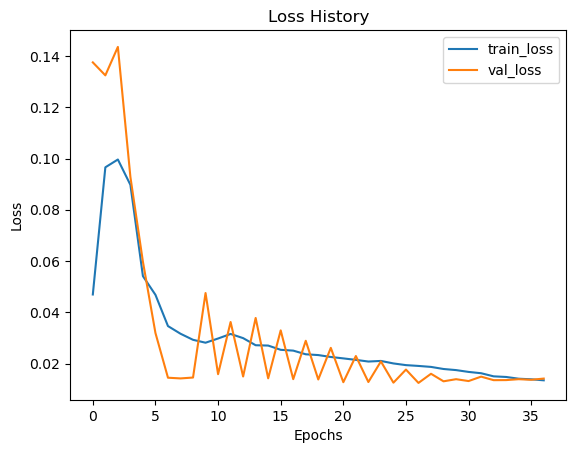

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

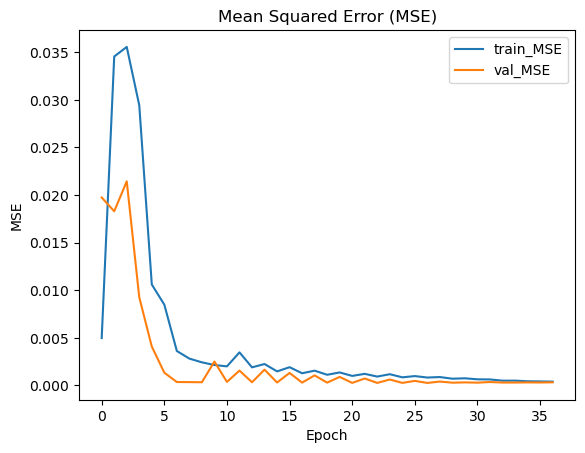

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

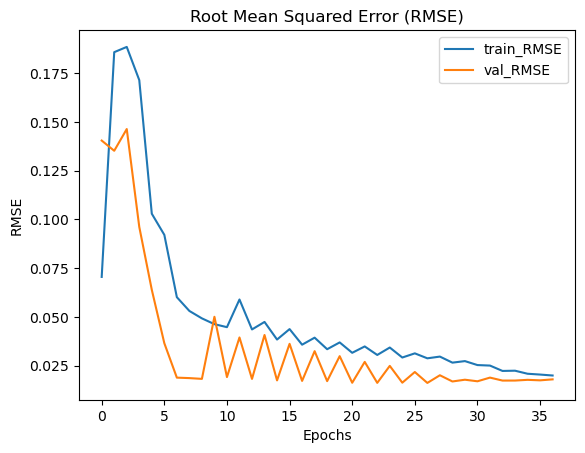

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

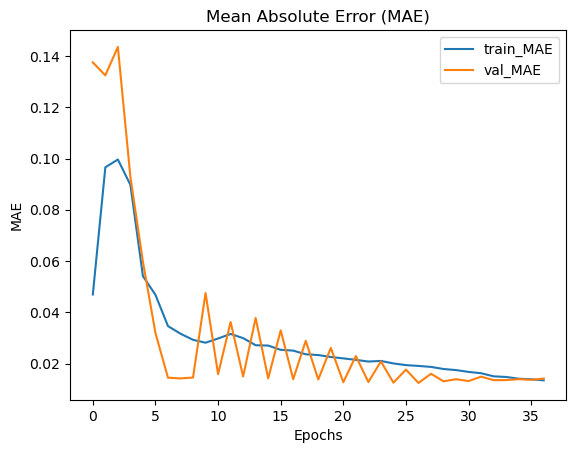

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

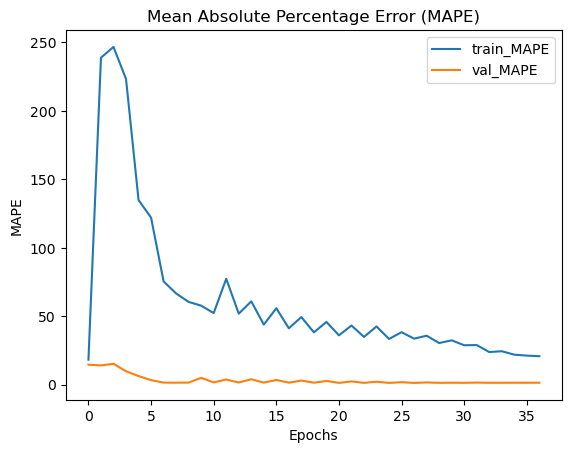

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-15 00:53:20.764079: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7558, 40, 2)
Labels Shape: (7558, 5, 1)
Prediction Shape: (7558, 5, 10)


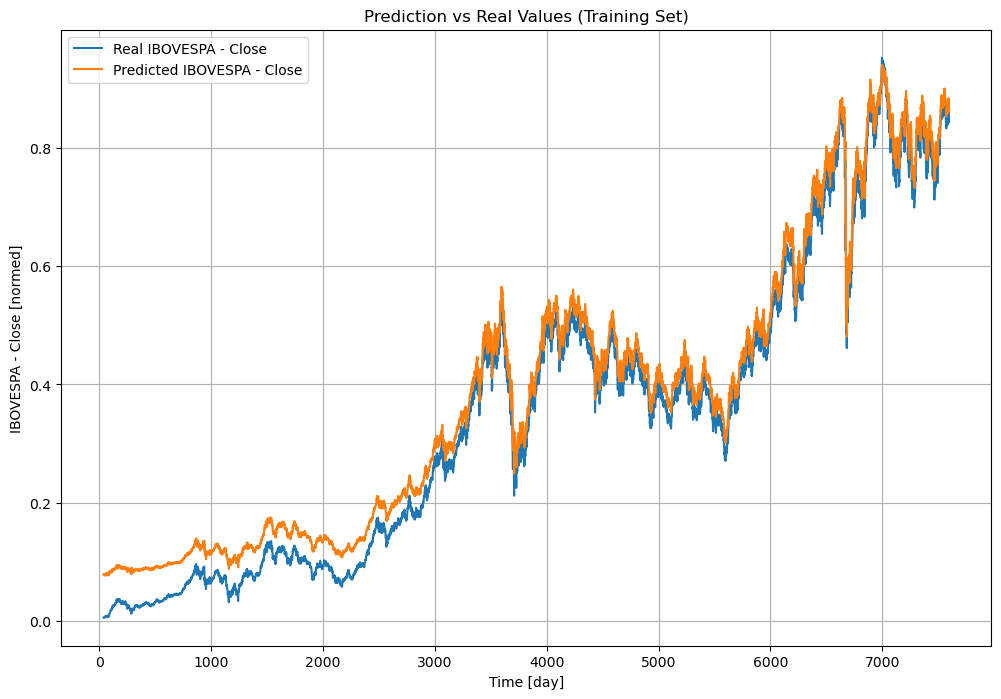

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 2)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


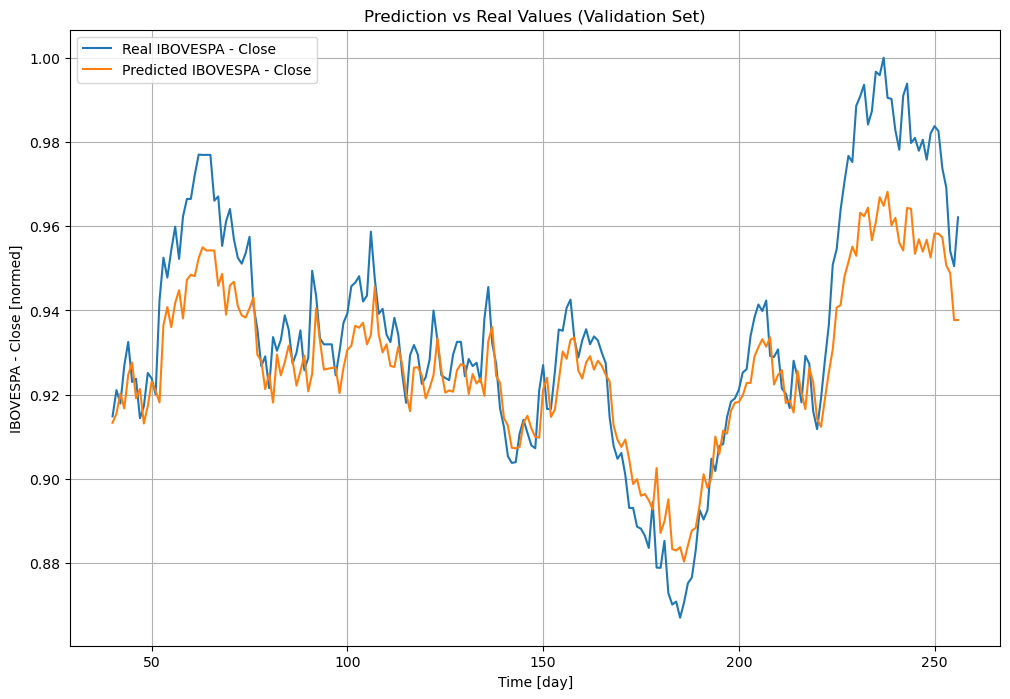

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 2)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


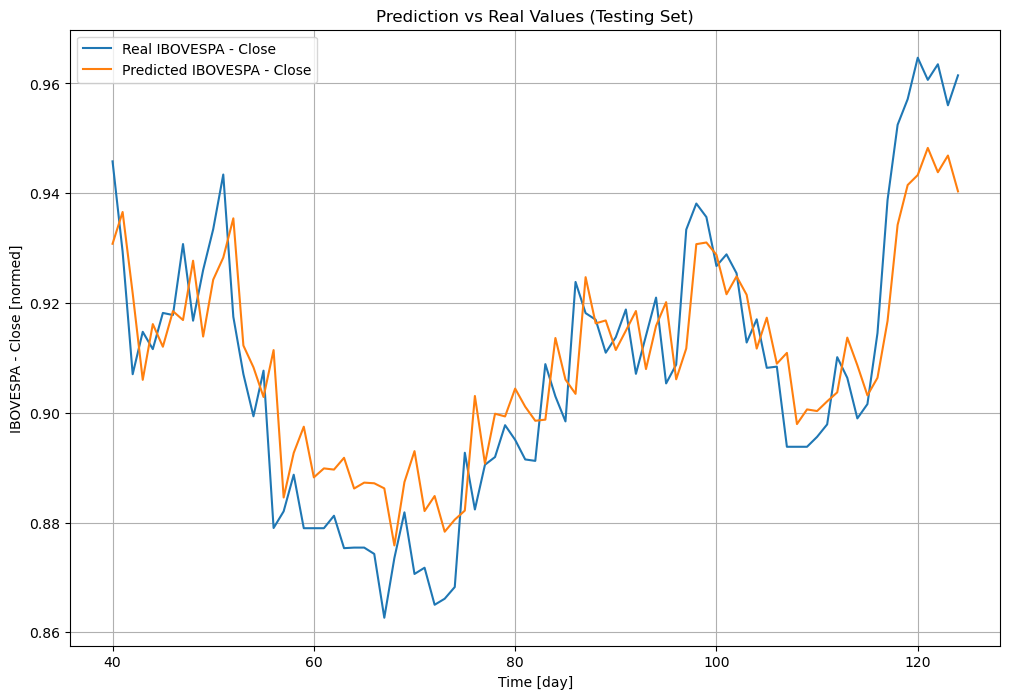

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

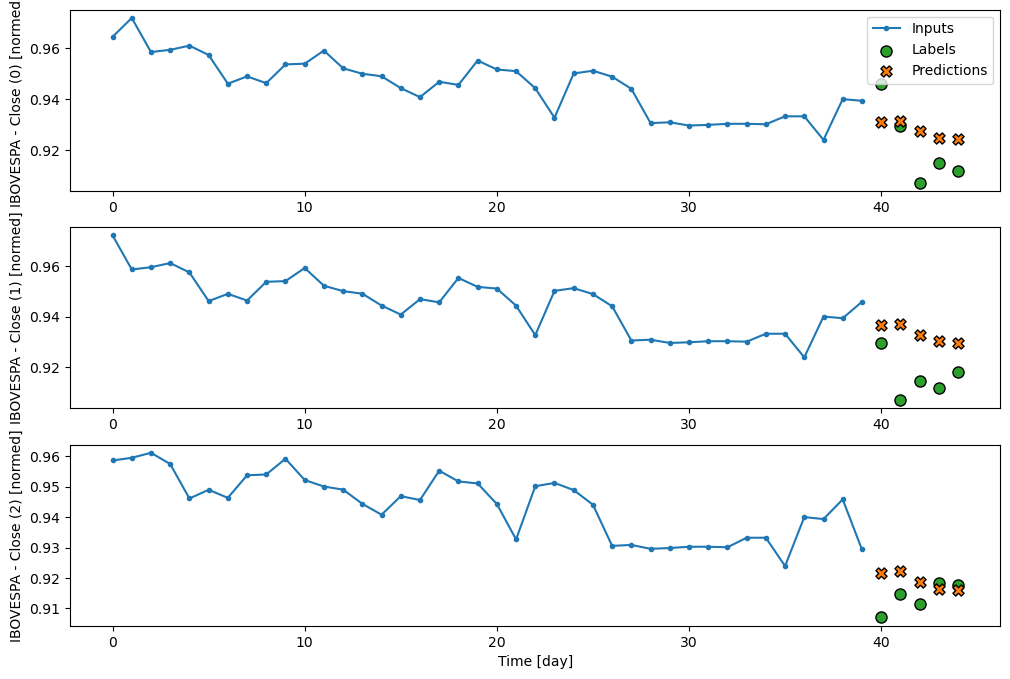

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:5m:4s:209ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step


array([[[0.93079376, 0.93079376, 0.93079376, ..., 0.93079376,
         0.93079376, 0.93079376],
        [0.93141186, 0.93141186, 0.93141186, ..., 0.93141186,
         0.93141186, 0.93141186],
        [0.9272603 , 0.9272603 , 0.9272603 , ..., 0.9272603 ,
         0.9272603 , 0.9272603 ],
        [0.9248191 , 0.9248191 , 0.9248191 , ..., 0.9248191 ,
         0.9248191 , 0.9248191 ],
        [0.92435706, 0.92435706, 0.92435706, ..., 0.92435706,
         0.92461205, 0.92461205]],

       [[0.9365847 , 0.9365847 , 0.9365847 , ..., 0.9365847 ,
         0.9365847 , 0.9365847 ],
        [0.9371933 , 0.9371933 , 0.9371933 , ..., 0.9371933 ,
         0.9371933 , 0.9371933 ],
        [0.93284607, 0.93284607, 0.93284607, ..., 0.93284607,
         0.93284607, 0.93284607],
        [0.9302839 , 0.9302839 , 0.9302839 , ..., 0.9302839 ,
         0.9302839 , 0.9302839 ],
        [0.929751  , 0.929751  , 0.929751  , ..., 0.929751  ,
         0.9300227 , 0.9300227 ]],

       [[0.92177355, 0.92177355, 0.9

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')